In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dftrn=pd.read_csv('term_deposit_train.csv')

In [3]:
#client information to be analyse for the purpose to subscribe term deposit
dftrn

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
#checking for missing value and from the above output it is clear that dataset doesnt have any missig values
dftrn.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [5]:
#checking for duplicate value
dftrn.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
31642    False
31643    False
31644    False
31645    False
31646    False
Length: 31647, dtype: bool

In [6]:
# no duplicated value is present in the dataset
dftrn.duplicated().sum()

0

In [7]:
dftrn.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

In [8]:
dftrn.describe(include='all')

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647,31647,31647,31647,31647.000000,31647,31647,31647,31647.000000,31647,31647.000000,31647.000000,31647.000000,31647.000000,31647,31647
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,6842,19095,16224,31062,NaN,17584,26516,20423,NaN,9669,NaN,NaN,NaN,NaN,25929,27932
mean,22563.972162,40.957247,NaN,NaN,NaN,NaN,1363.890258,NaN,NaN,NaN,15.835466,NaN,258.113534,2.765697,39.576042,0.574272,NaN,NaN
std,13075.936990,10.625134,NaN,NaN,NaN,NaN,3028.304293,NaN,NaN,NaN,8.337097,NaN,257.118973,3.113830,99.317592,2.422529,NaN,NaN
min,2.000000,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,11218.000000,33.000000,NaN,NaN,NaN,NaN,73.000000,NaN,NaN,NaN,8.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,22519.000000,39.000000,NaN,NaN,NaN,NaN,450.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,33879.500000,48.000000,NaN,NaN,NaN,NaN,1431.000000,NaN,NaN,NaN,21.000000,NaN,318.500000,3.000000,-1.000000,0.000000,NaN,NaN


In [9]:
# checking the frquecy of data in each feature 
for i in dftrn.columns:
    print(dftrn[i].value_counts())
        




ID
26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: count, Length: 31647, dtype: int64
age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64
job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64
marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64
education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64
default
no     31062
yes      585
Name: count, dtype: int64
balance
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713 

In [10]:
dftrn['Date']=dftrn['day'].astype(str) + dftrn['month']

In [11]:
dftrn.Date

0        19nov
1        20jul
2        18jul
3        22jun
4         4feb
         ...  
31642    12may
31643     5jun
31644     7aug
31645    15may
31646    11jul
Name: Date, Length: 31647, dtype: object

In [12]:
dftrn

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,Date
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no,19nov
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no,20jul
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no,18jul
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes,22jun
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no,4feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no,12may
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes,5jun
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no,7aug
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no,15may


In [13]:
dftrn.drop('day',axis=1,inplace=True)

In [14]:
dftrn.drop('month',axis=1,inplace=True)


In [15]:
dftrn

,ID,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed,Date
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,44,2,-1,0,unknown,no,19nov
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,91,2,-1,0,unknown,no,20jul
2,15320,27,services,married,secondary,no,891,yes,no,cellular,240,1,-1,0,unknown,no,18jul
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,867,1,84,3,success,yes,22jun
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,380,1,-1,0,unknown,no,4feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,116,2,-1,0,unknown,no,12may
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,438,2,-1,0,unknown,yes,5jun
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,37,3,-1,0,unknown,no,7aug
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,22,7,337,12,failure,no,15may


In [16]:
#converting durtaion column into minutes as it given in sec
dftrn['duration']=dftrn['duration'].apply(lambda x:x/60).round(2)

In [17]:
dftrn


,ID,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed,Date
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,0.73,2,-1,0,unknown,no,19nov
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,1.52,2,-1,0,unknown,no,20jul
2,15320,27,services,married,secondary,no,891,yes,no,cellular,4.00,1,-1,0,unknown,no,18jul
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,14.45,1,84,3,success,yes,22jun
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,6.33,1,-1,0,unknown,no,4feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,1.93,2,-1,0,unknown,no,12may
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,7.30,2,-1,0,unknown,yes,5jun
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,0.62,3,-1,0,unknown,no,7aug
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,0.37,7,337,12,failure,no,15may


In [18]:
dftrn.shape

(31647, 17)

In [19]:
dftrn.dtypes

ID              int64
age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
duration      float64
campaign        int64
pdays           int64
previous        int64
poutcome       object
subscribed     object
Date           object
dtype: object

In [20]:
categorical=[]
numerical=[]
for i in dftrn.columns:
    if (dftrn[i].dtypes)==object:
        categorical.append(i)
    else:
        numerical.append(i)

In [21]:
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'subscribed',
 'Date']

In [22]:
dftrn

,ID,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed,Date
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,0.73,2,-1,0,unknown,no,19nov
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,1.52,2,-1,0,unknown,no,20jul
2,15320,27,services,married,secondary,no,891,yes,no,cellular,4.00,1,-1,0,unknown,no,18jul
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,14.45,1,84,3,success,yes,22jun
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,6.33,1,-1,0,unknown,no,4feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,1.93,2,-1,0,unknown,no,12may
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,7.30,2,-1,0,unknown,yes,5jun
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,0.62,3,-1,0,unknown,no,7aug
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,0.37,7,337,12,failure,no,15may


#Here in the dataset  we observed that pdays feature has value of -1 it means that customer has not been contacted this value should be tranformed in the feature


In [23]:
dftrn['pdays']=dftrn['pdays'].apply(lambda x: 1 if x >0 else 0)

In [109]:
dftrn

,ID,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed,Date
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,0.73,2,0,0,unknown,no,19nov
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,1.52,2,0,0,unknown,no,20jul
2,15320,27,services,married,secondary,no,891,yes,no,cellular,4.00,1,0,0,unknown,no,18jul
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,14.45,1,1,3,success,yes,22jun
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,6.33,1,0,0,unknown,no,4feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,1.93,2,0,0,unknown,no,12may
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,7.30,2,0,0,unknown,yes,5jun
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,0.62,3,0,0,unknown,no,7aug
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,0.37,7,1,12,failure,no,15may


In [24]:
dftrn.groupby(['Date'])['subscribed'].value_counts().sort_values(ascending=True)

Date   subscribed
20mar  no              1
22dec  no              1
30aug  no              1
21jun  yes             1
21feb  no              1
                    ... 
8may   no            560
7may   no            564
13may  no            630
14may  no            650
15may  no            720
Name: count, Length: 599, dtype: int64

In [28]:
dftrn['subscribed'].value_counts()

subscribed
no     27932
yes     3715
Name: count, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

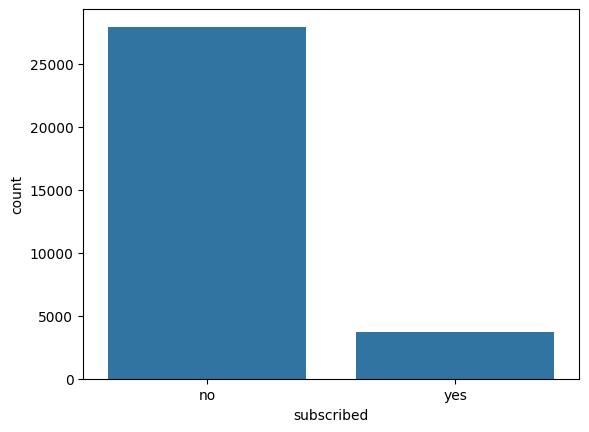

In [29]:
sns.countplot(x='subscribed',data=dftrn)

here from the above countplot it is clear that around 27932 customer not subscribed term deposit and 3715 customer subscribed to term deposit

<Axes: xlabel='subscribed', ylabel='balance'>

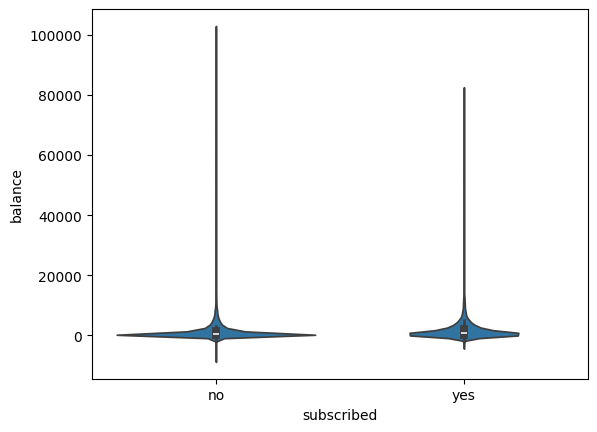

In [30]:
sns.violinplot(x='subscribed',y='balance',data=dftrn)

<Axes: xlabel='poutcome', ylabel='campaign'>

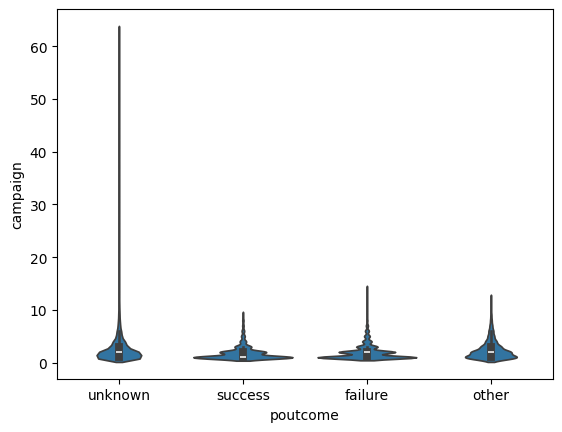

In [31]:
sns.violinplot(x='poutcome',y='campaign',data=dftrn)

#here from the above violinplot it is clear that previous campaign doent work well for the financial instuition as the success rate is very less

<Axes: xlabel='campaign', ylabel='contact'>

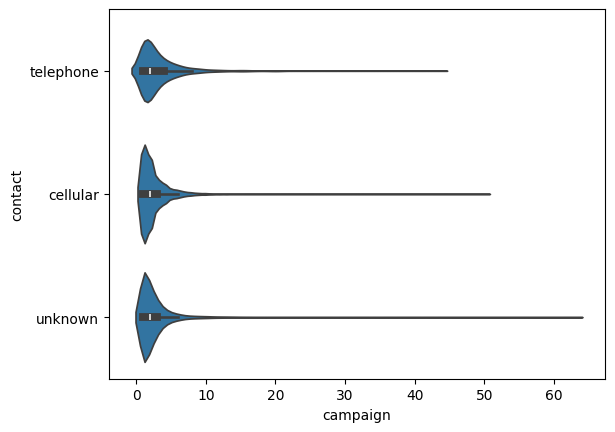

In [115]:
sns.violinplot(x='campaign',y='contact',data=dftrn)

In [116]:
#here from the above violinplot it is showing the way of communication used during campaign cellular mode is widely used 

In [117]:
dftrn.groupby('education')['subscribed'].value_counts()

education  subscribed
primary    no             4381
           yes             427
secondary  no            14527
           yes            1697
tertiary   no             7886
           yes            1415
unknown    no             1138
           yes             176
Name: count, dtype: int64

# here from the above output is clearly observed that largest no of customer said yes to term deposit and have education level type are secondary and teritory

<Axes: xlabel='age', ylabel='count'>

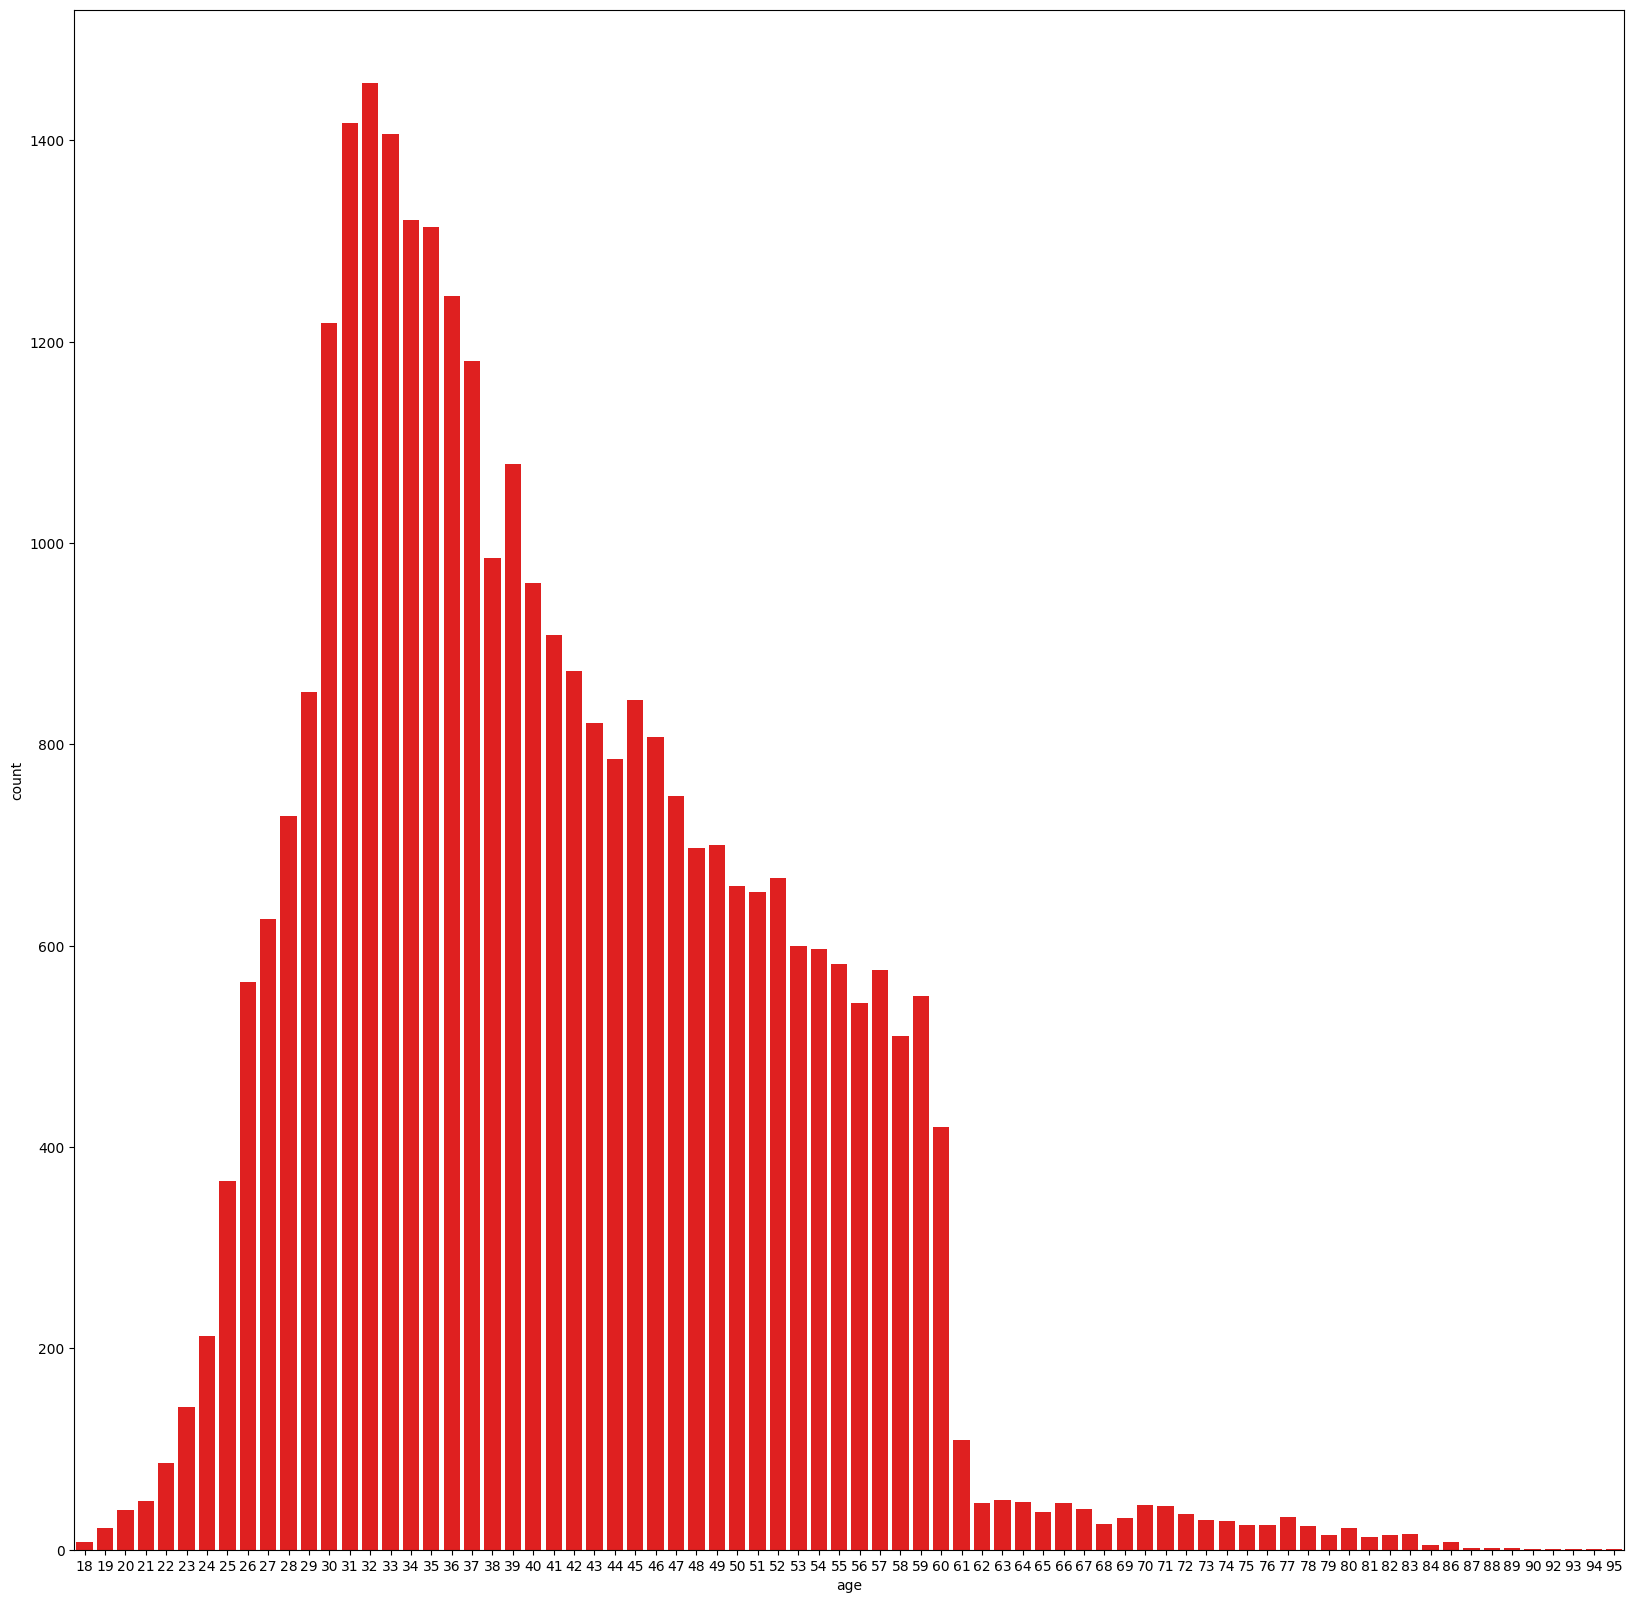

In [118]:
ax,fig=plt.subplots(figsize=(20,20))
#for i in range(1,len(numerical)):
sns.barplot(dftrn['age'].value_counts(),color='red')
    

In [ ]:
# here from the above barplot it is clear that the customer in the dataset below age 25 and above age 60 are very less and customer having age 30 to 40 are more in number

<Axes: xlabel='job', ylabel='count'>

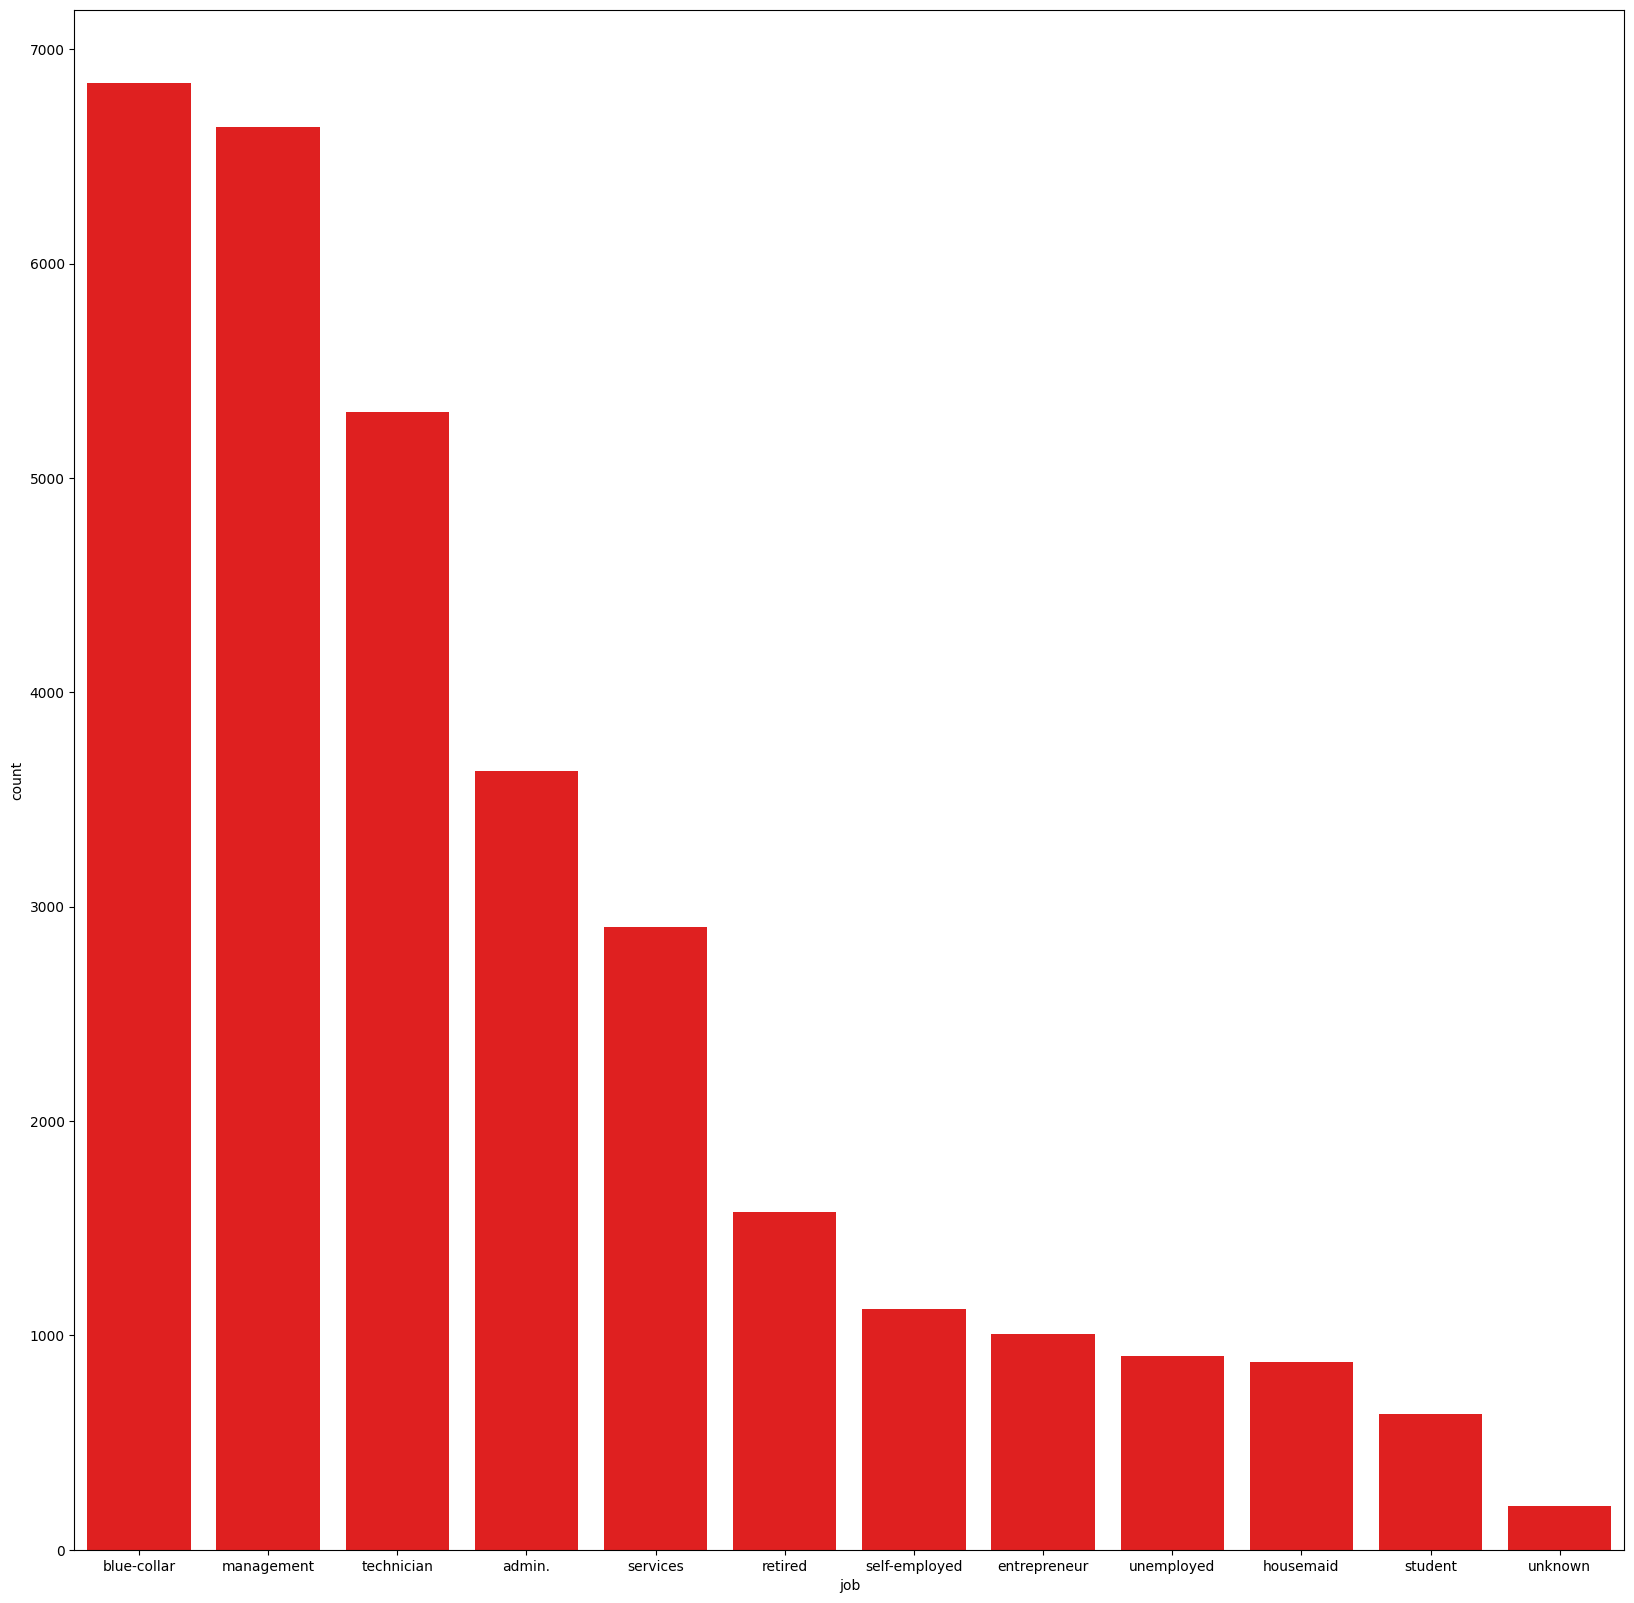

In [37]:
ax,fig=plt.subplots(figsize=(20,20))
#for i in range(1,len(numerical)):
sns.barplot(dftrn['job'].value_counts(),color='red')
    

#here from the above graph it is clear that customer with job  blue-collar ,management and technician job are more as compared to other job

<Axes: xlabel='education', ylabel='count'>

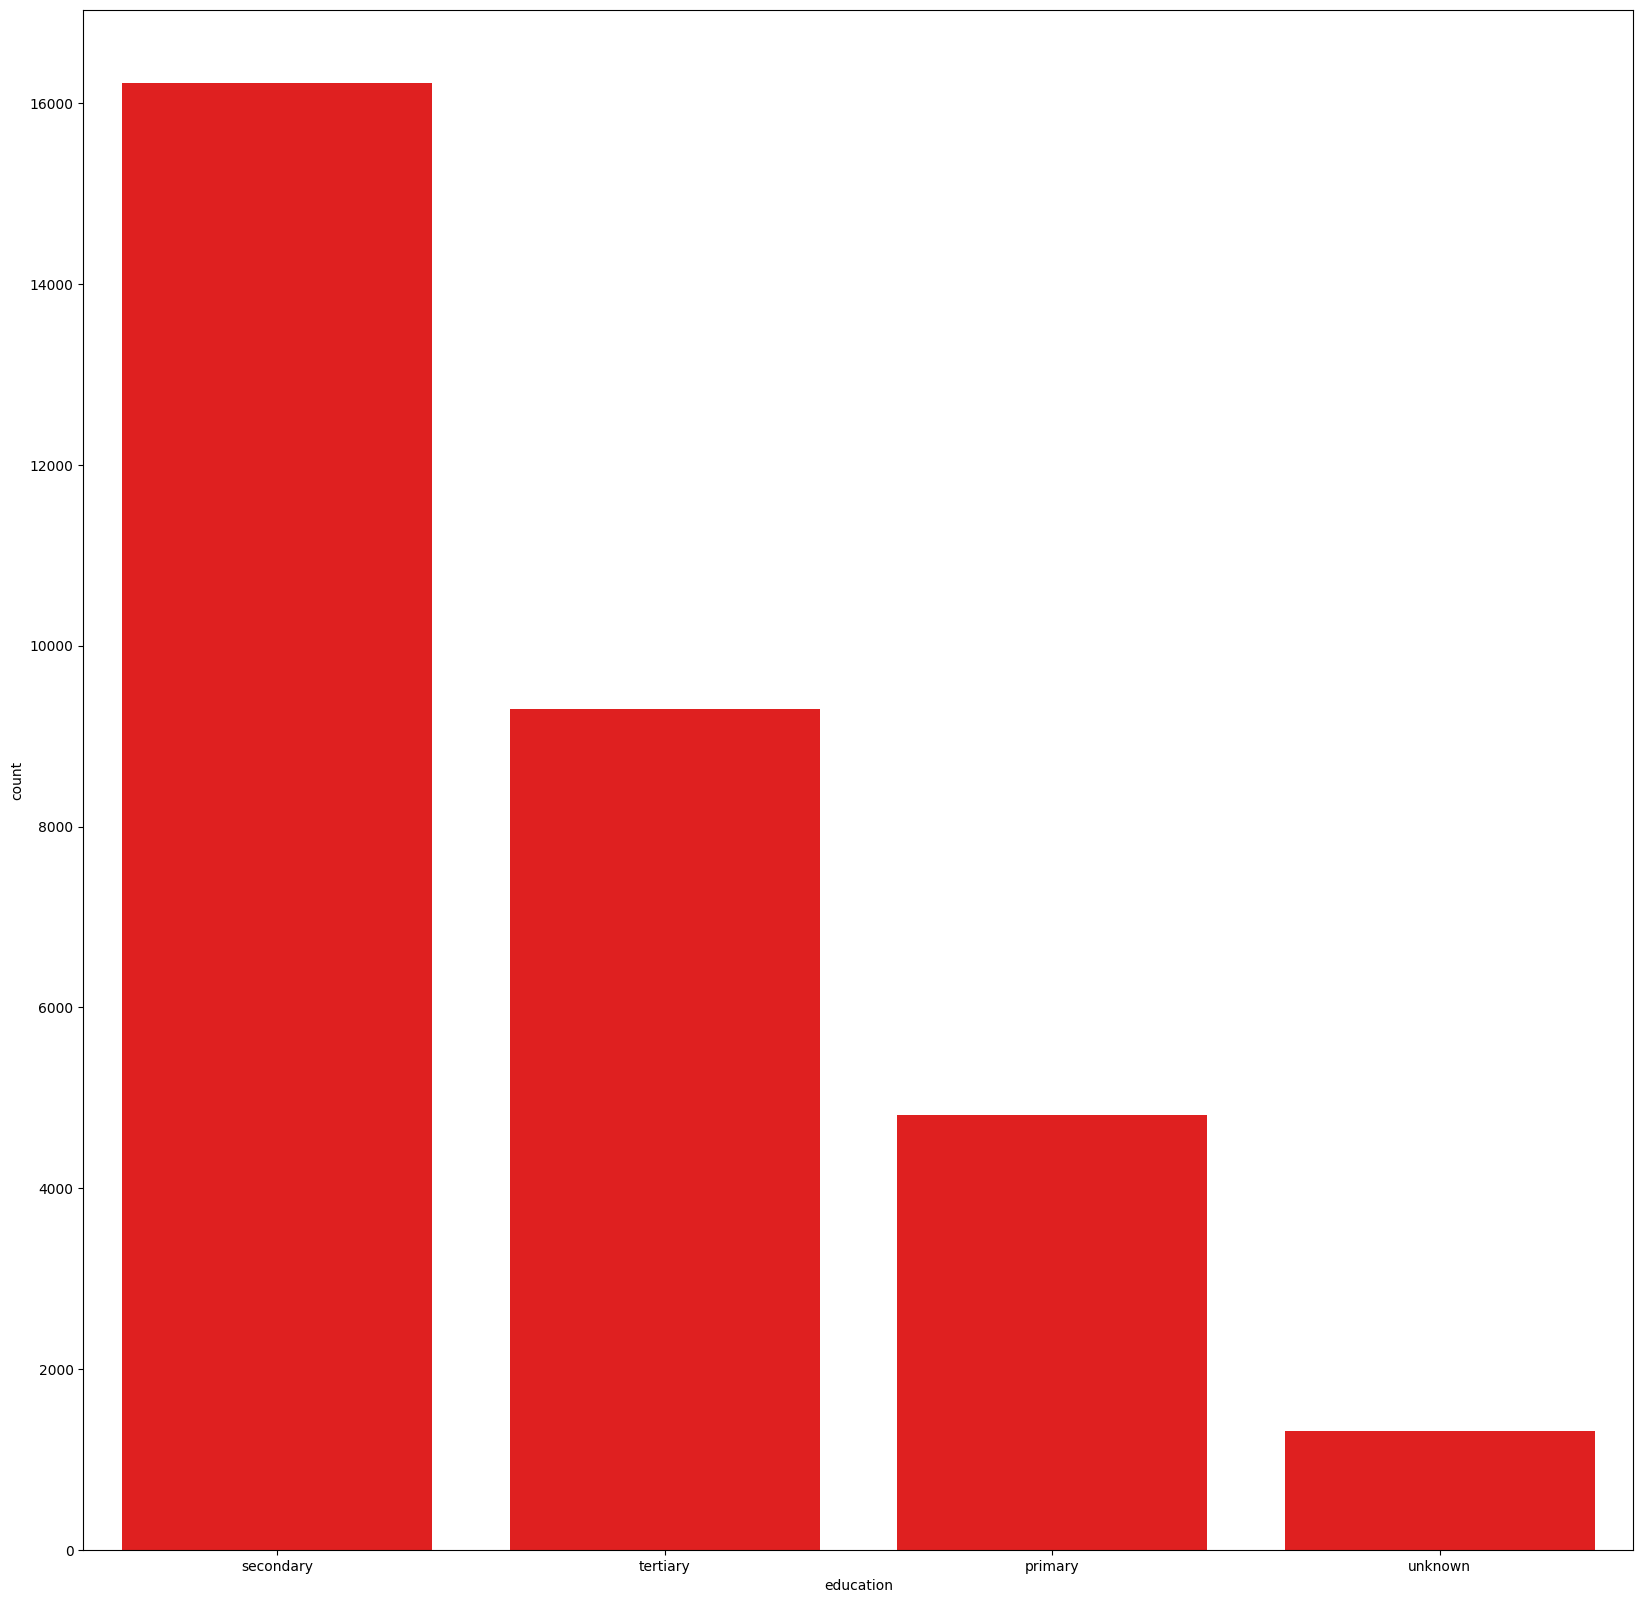

In [38]:
ax,fig=plt.subplots(figsize=(20,20))
#for i in range(1,len(numerical)):
sns.barplot(dftrn['education'].value_counts(),color='red')
    

#here from the above barplot it is clear that qualification of  most of the customer have secondaryand tertiary type education level and customer with priamry level education is very less

<Axes: xlabel='default', ylabel='count'>

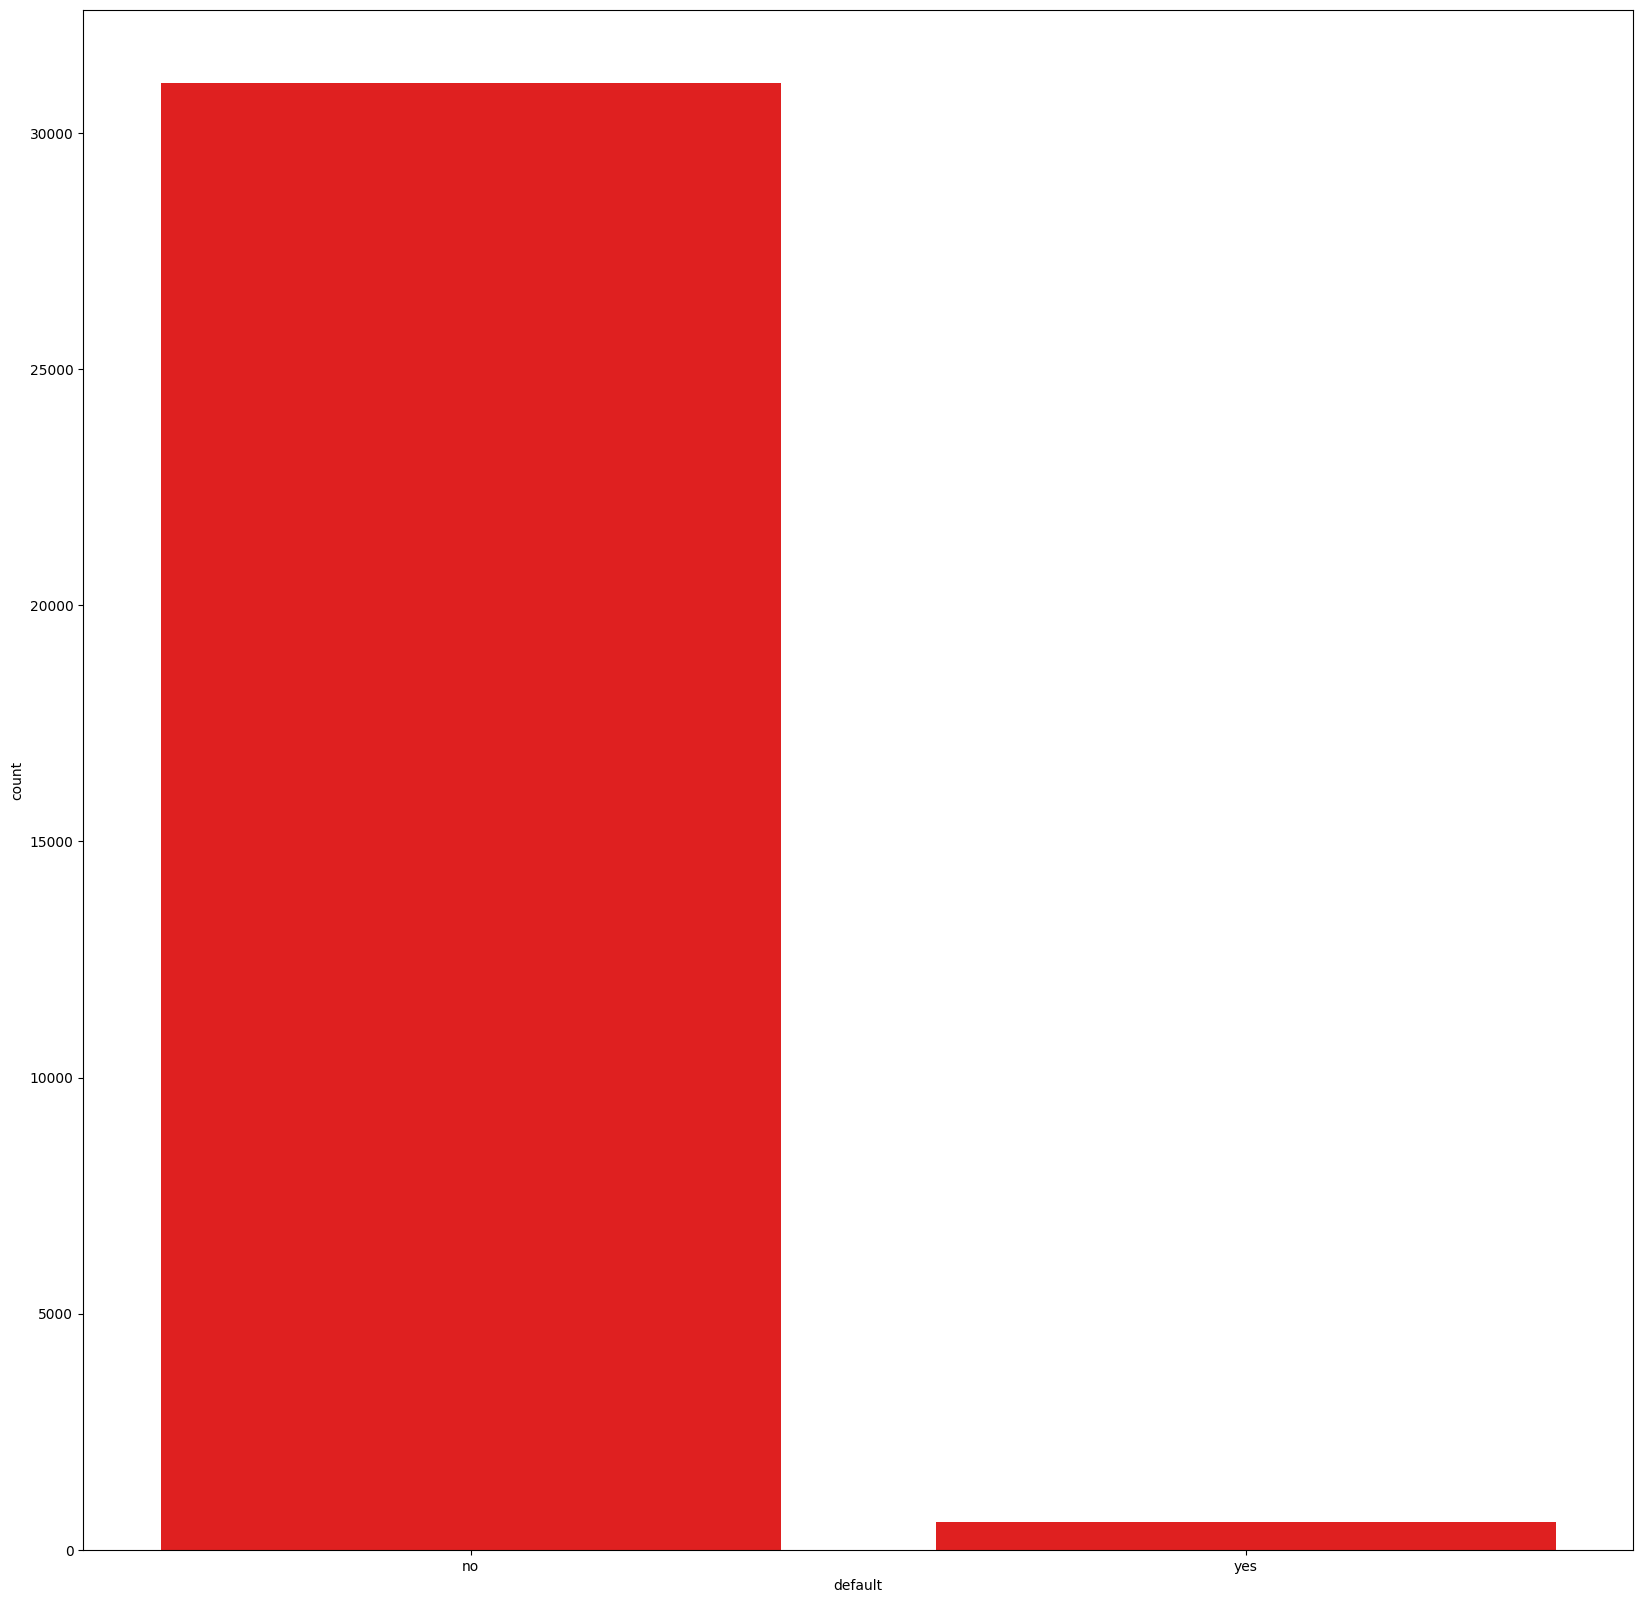

In [39]:
ax,fig=plt.subplots(figsize=(20,20))
#for i in range(1,len(numerical)):
sns.barplot(dftrn['default'].value_counts(),color='red')
    

# here from the above barplot it is clear that no of non   credit defalt customer are more and customer with credit defaulter is very few only and this customers are more like to convert 

<Axes: xlabel='housing', ylabel='count'>

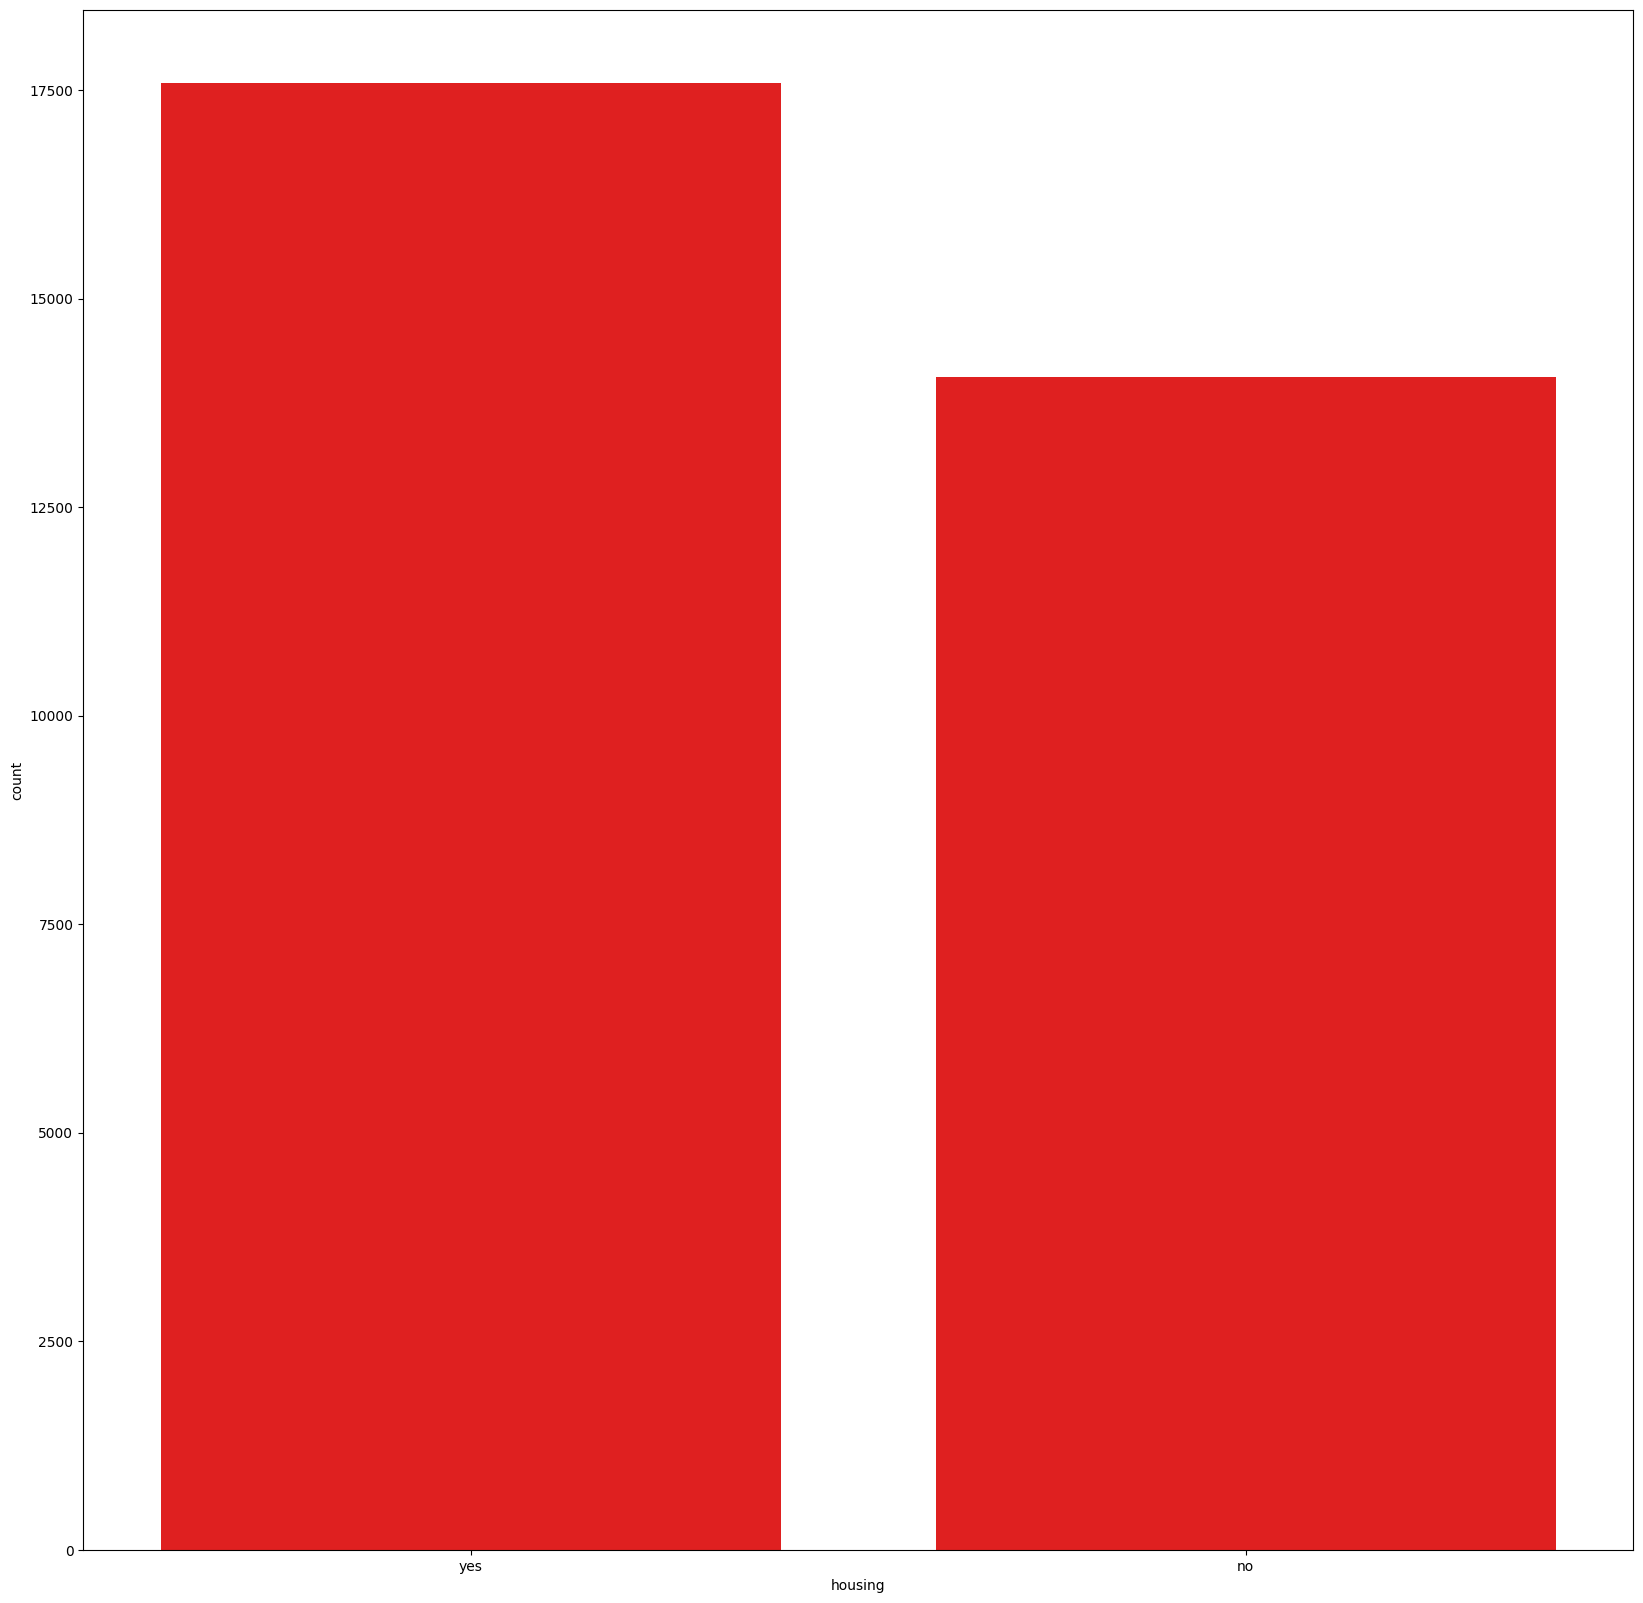

In [40]:
ax,fig=plt.subplots(figsize=(20,20))
#for i in range(1,len(numerical)):
sns.barplot(dftrn['housing'].value_counts(),color='red')
    

#here from the above graph it is clear that most of customer have taken Housing loan from the bank as compared to the person who didnt take any housing loan

<Axes: xlabel='loan', ylabel='count'>

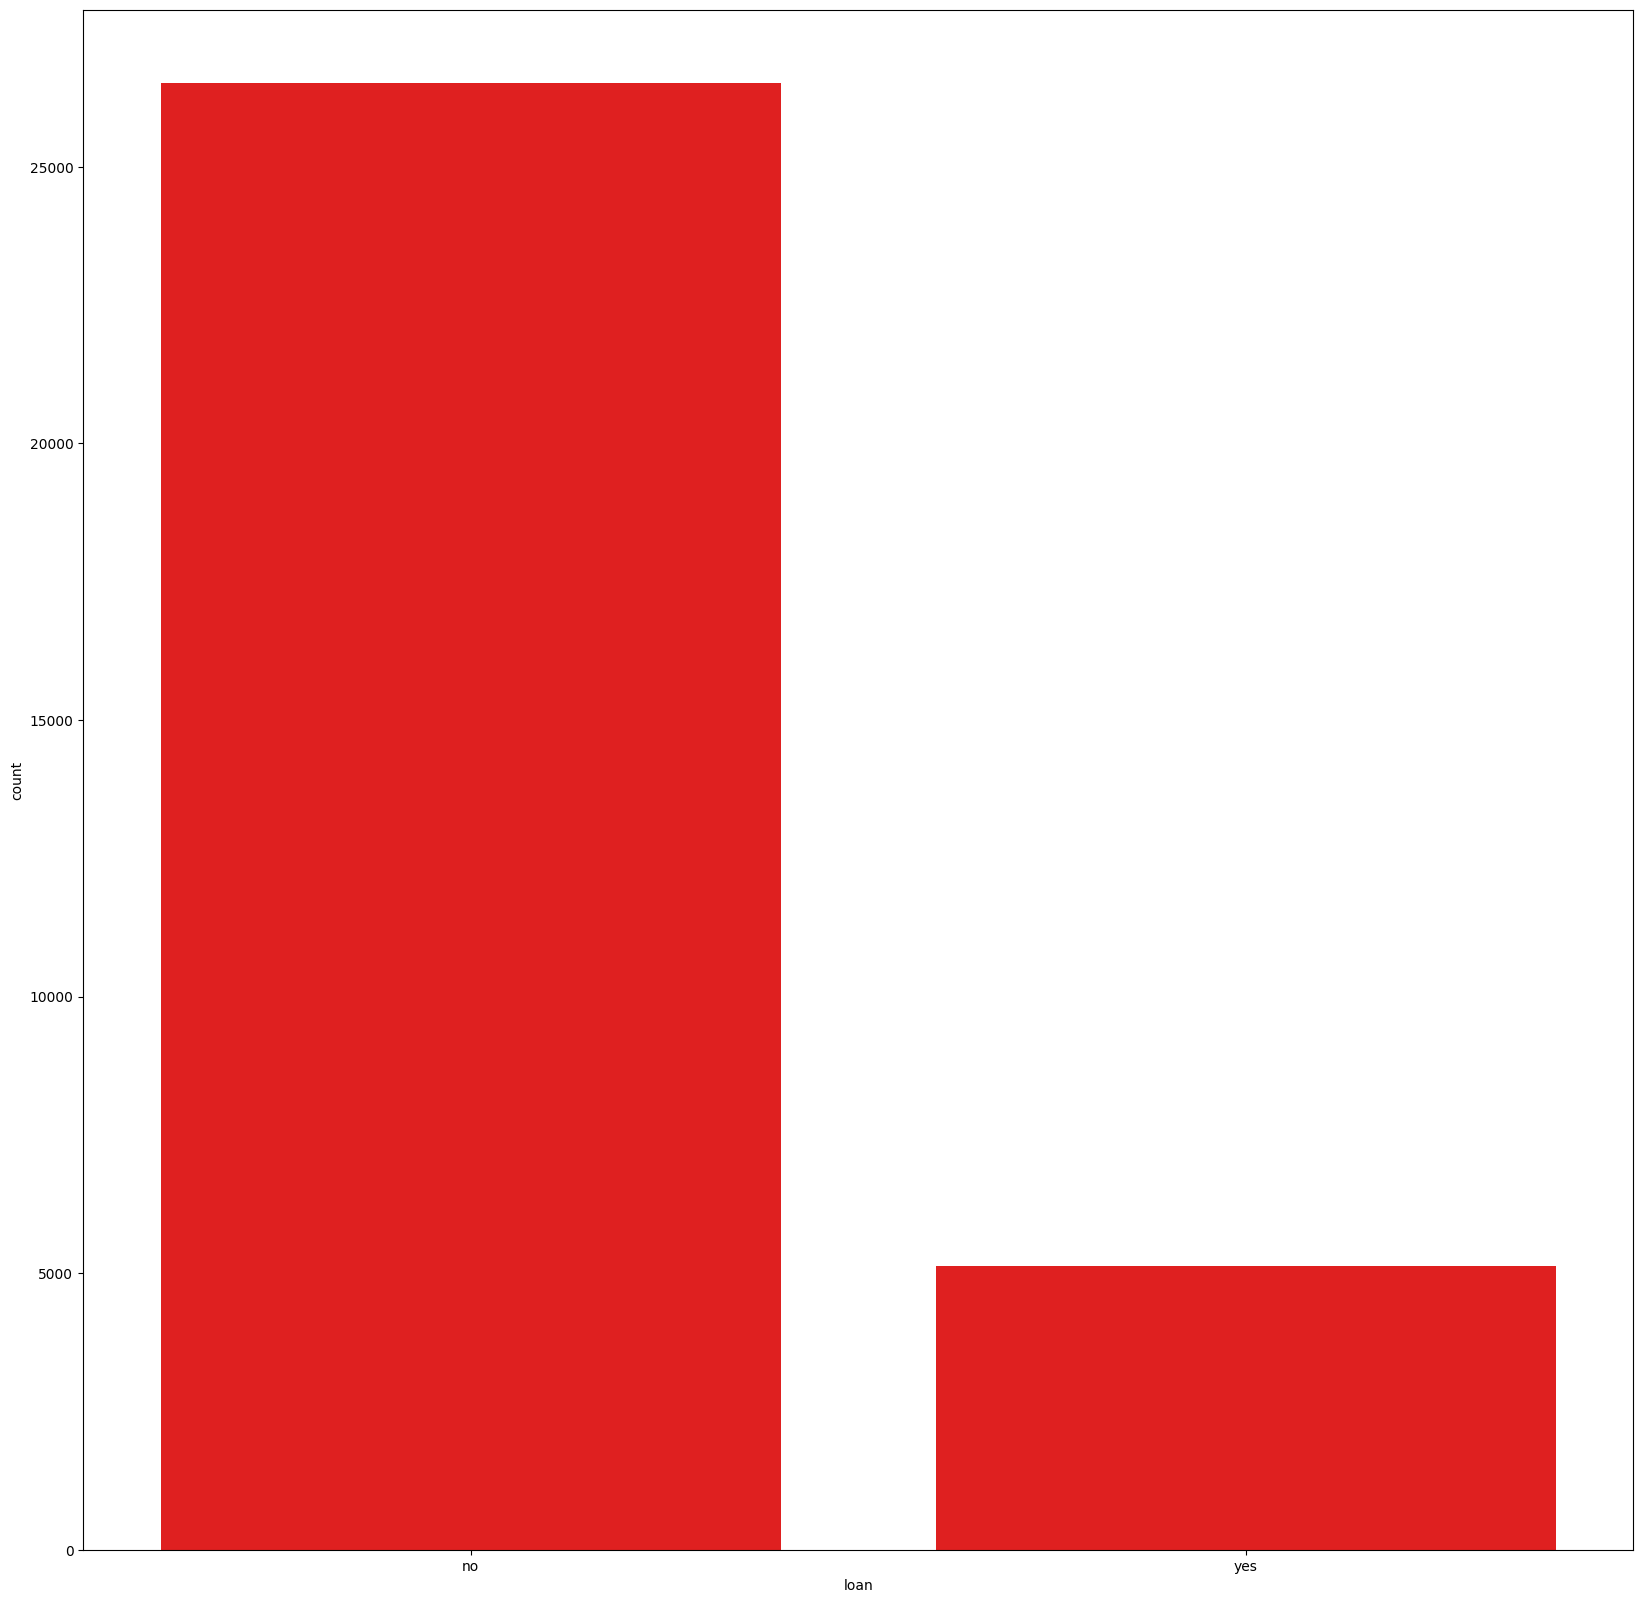

In [41]:
ax,fig=plt.subplots(figsize=(20,20))
#for i in range(1,len(numerical)):
sns.barplot(dftrn['loan'].value_counts(),color='red')
    

#here from the above plot it is clear that the count of customer who didnt borrowed any person loan  from  bank are more as compared to the person who borrowed personal loan

<Axes: xlabel='subscribed', ylabel='count'>

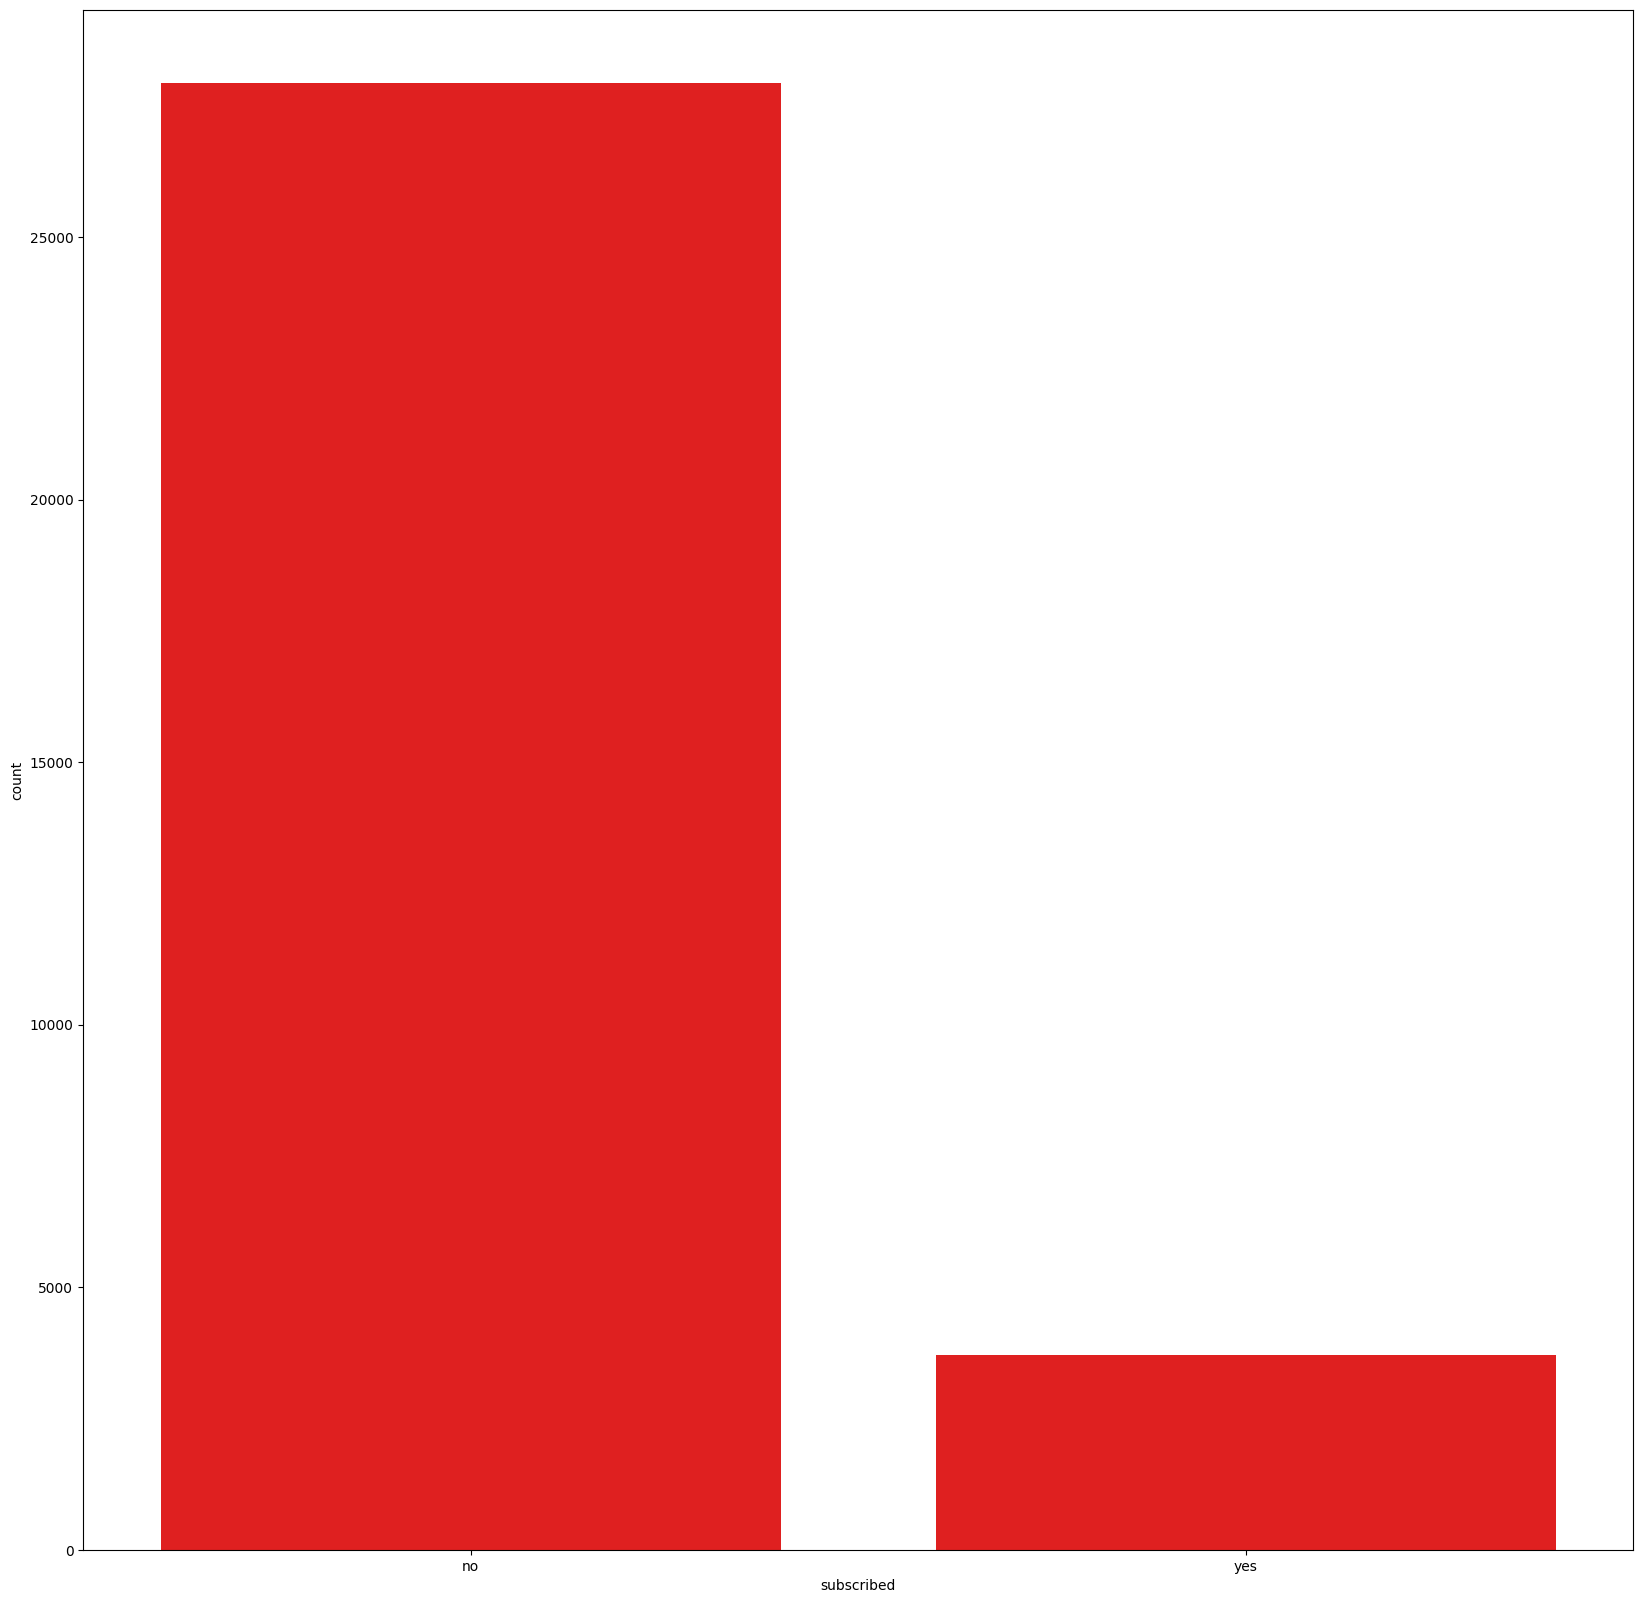

In [42]:
ax,fig=plt.subplots(figsize=(20,20))
#for i in range(1,len(numerical)):
sns.barplot(dftrn['subscribed'].value_counts(),color='red')
    

#here from the above bar plot it is clear that maximum count of the customer have not subscribed term deposit and customer who have borrowed term deposit from the financial instituion are very less

<Axes: xlabel='campaign', ylabel='count'>

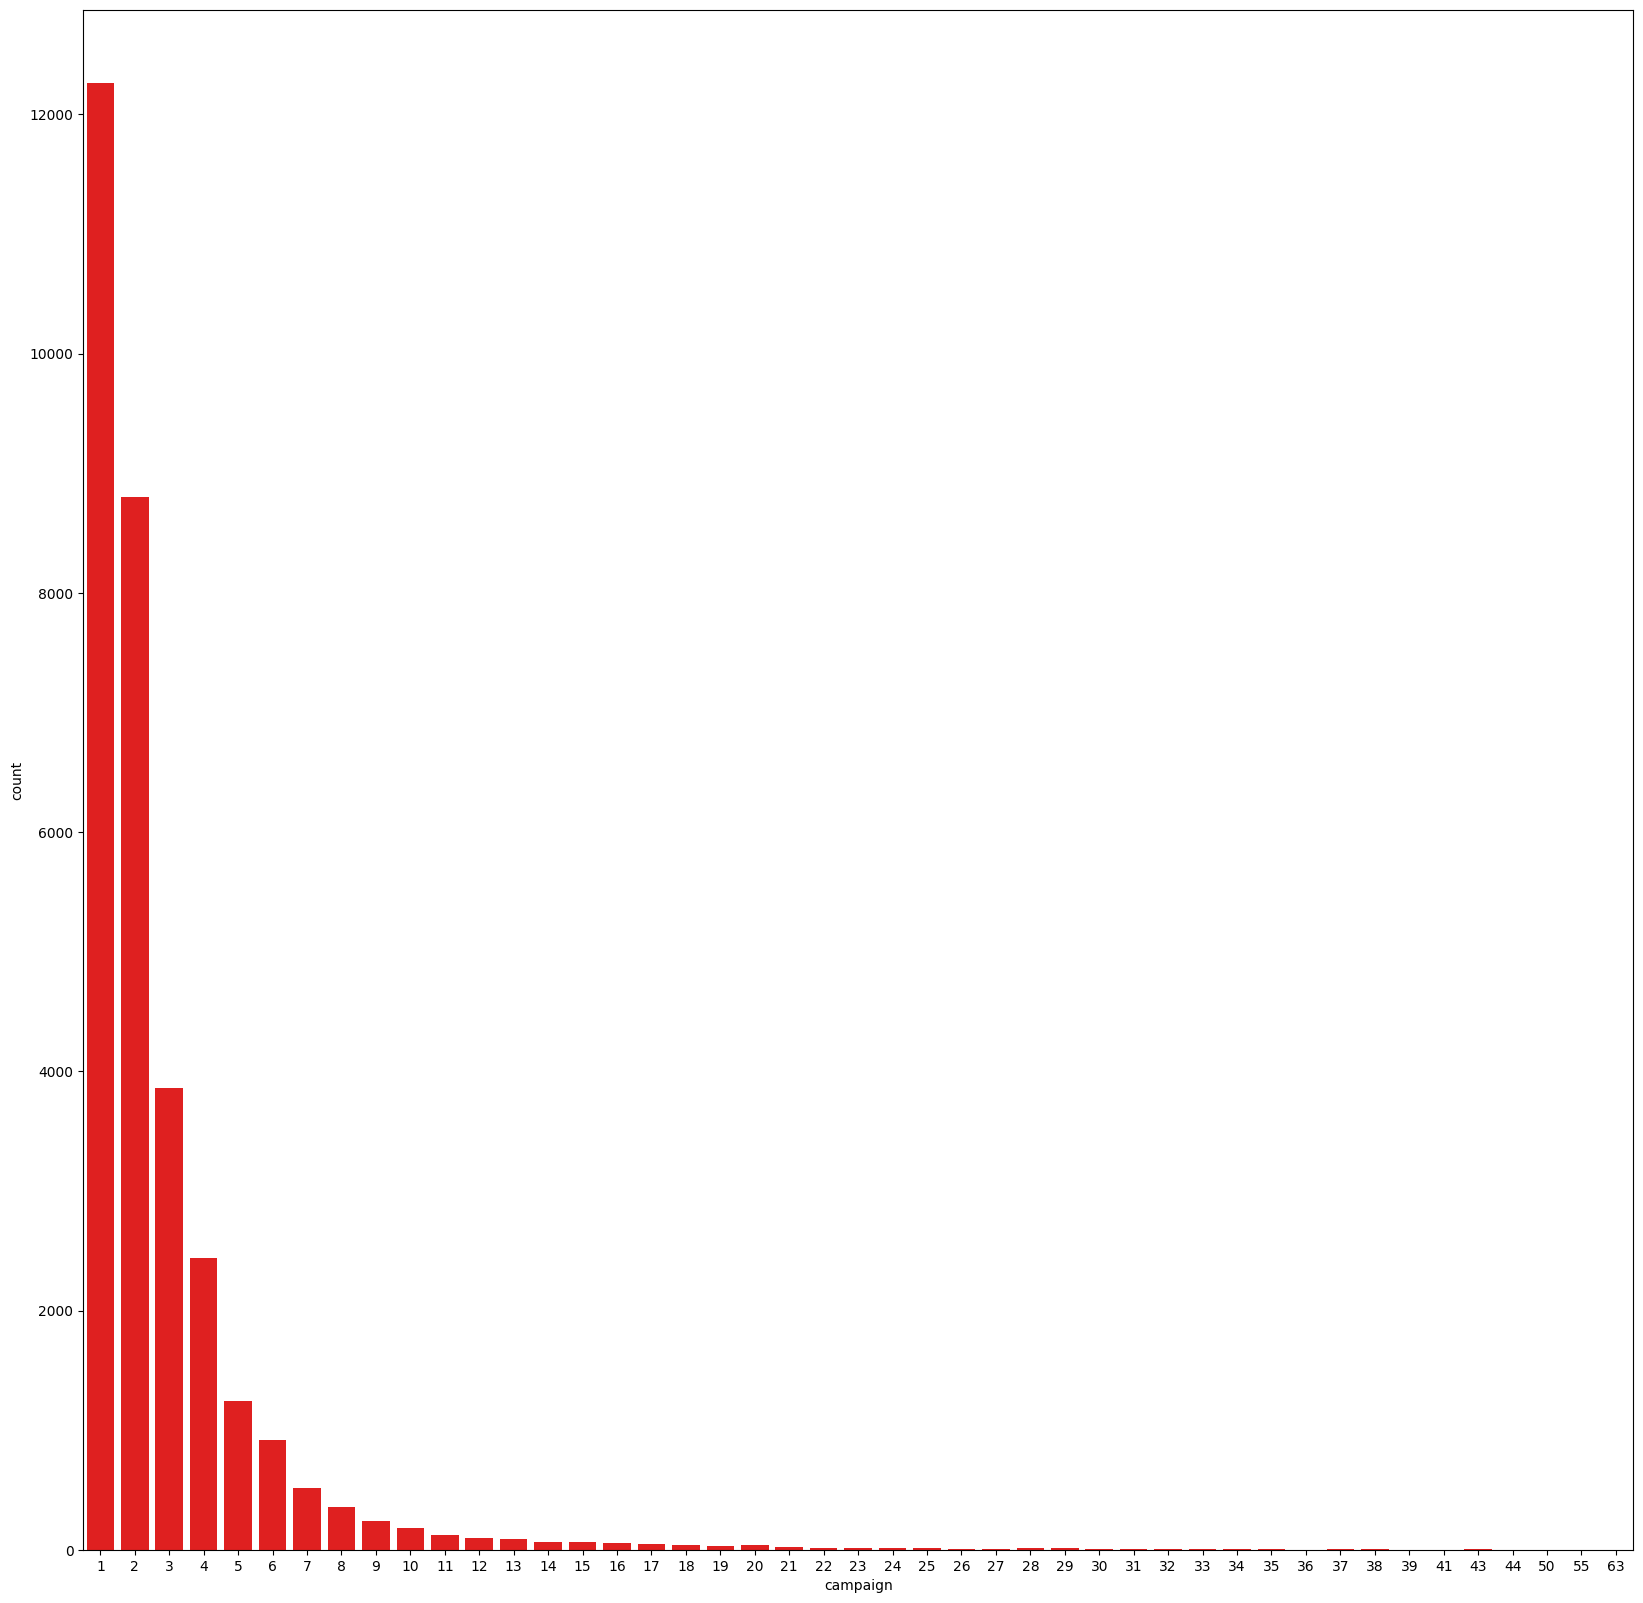

In [44]:
ax,fig=plt.subplots(figsize=(20,20))
#for i in range(1,len(numerical)):
sns.barplot(dftrn['campaign'].value_counts(),color='red')
    

#here from the above plot  it is clear that during campaign very less no of time customer has been contacted .mostly customer has been contacted 1 ,2 or times.customer should be contacted more no time for the awareness 

<Axes: xlabel='duration', ylabel='count'>

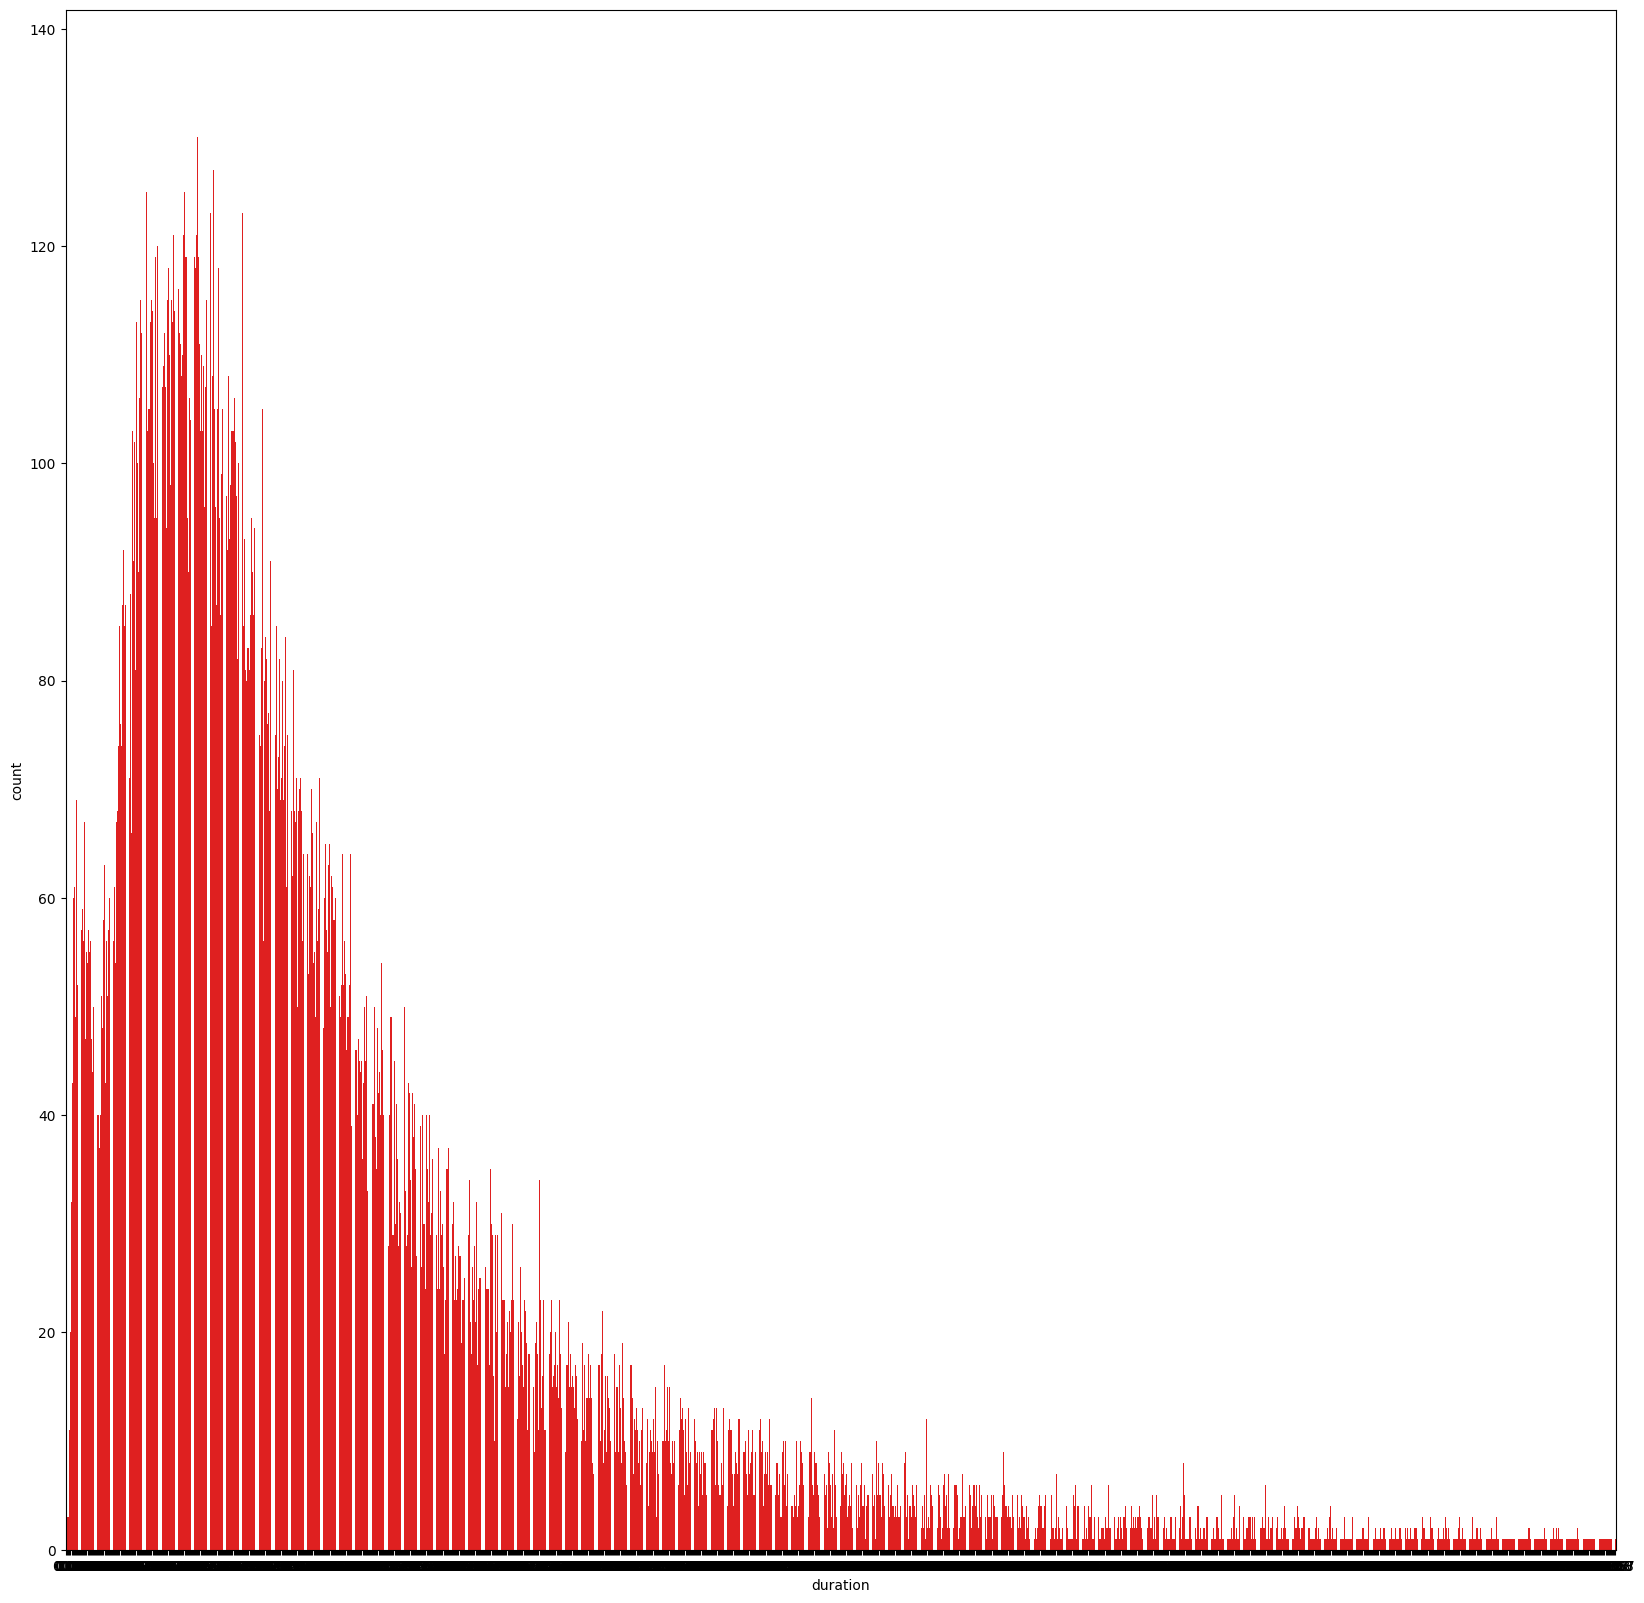

In [46]:
ax,fig=plt.subplots(figsize=(20,20))
#for i in range(1,len(numerical)):
sns.barplot(dftrn['duration'].value_counts(),color='red')
    

<Axes: xlabel='previous', ylabel='count'>

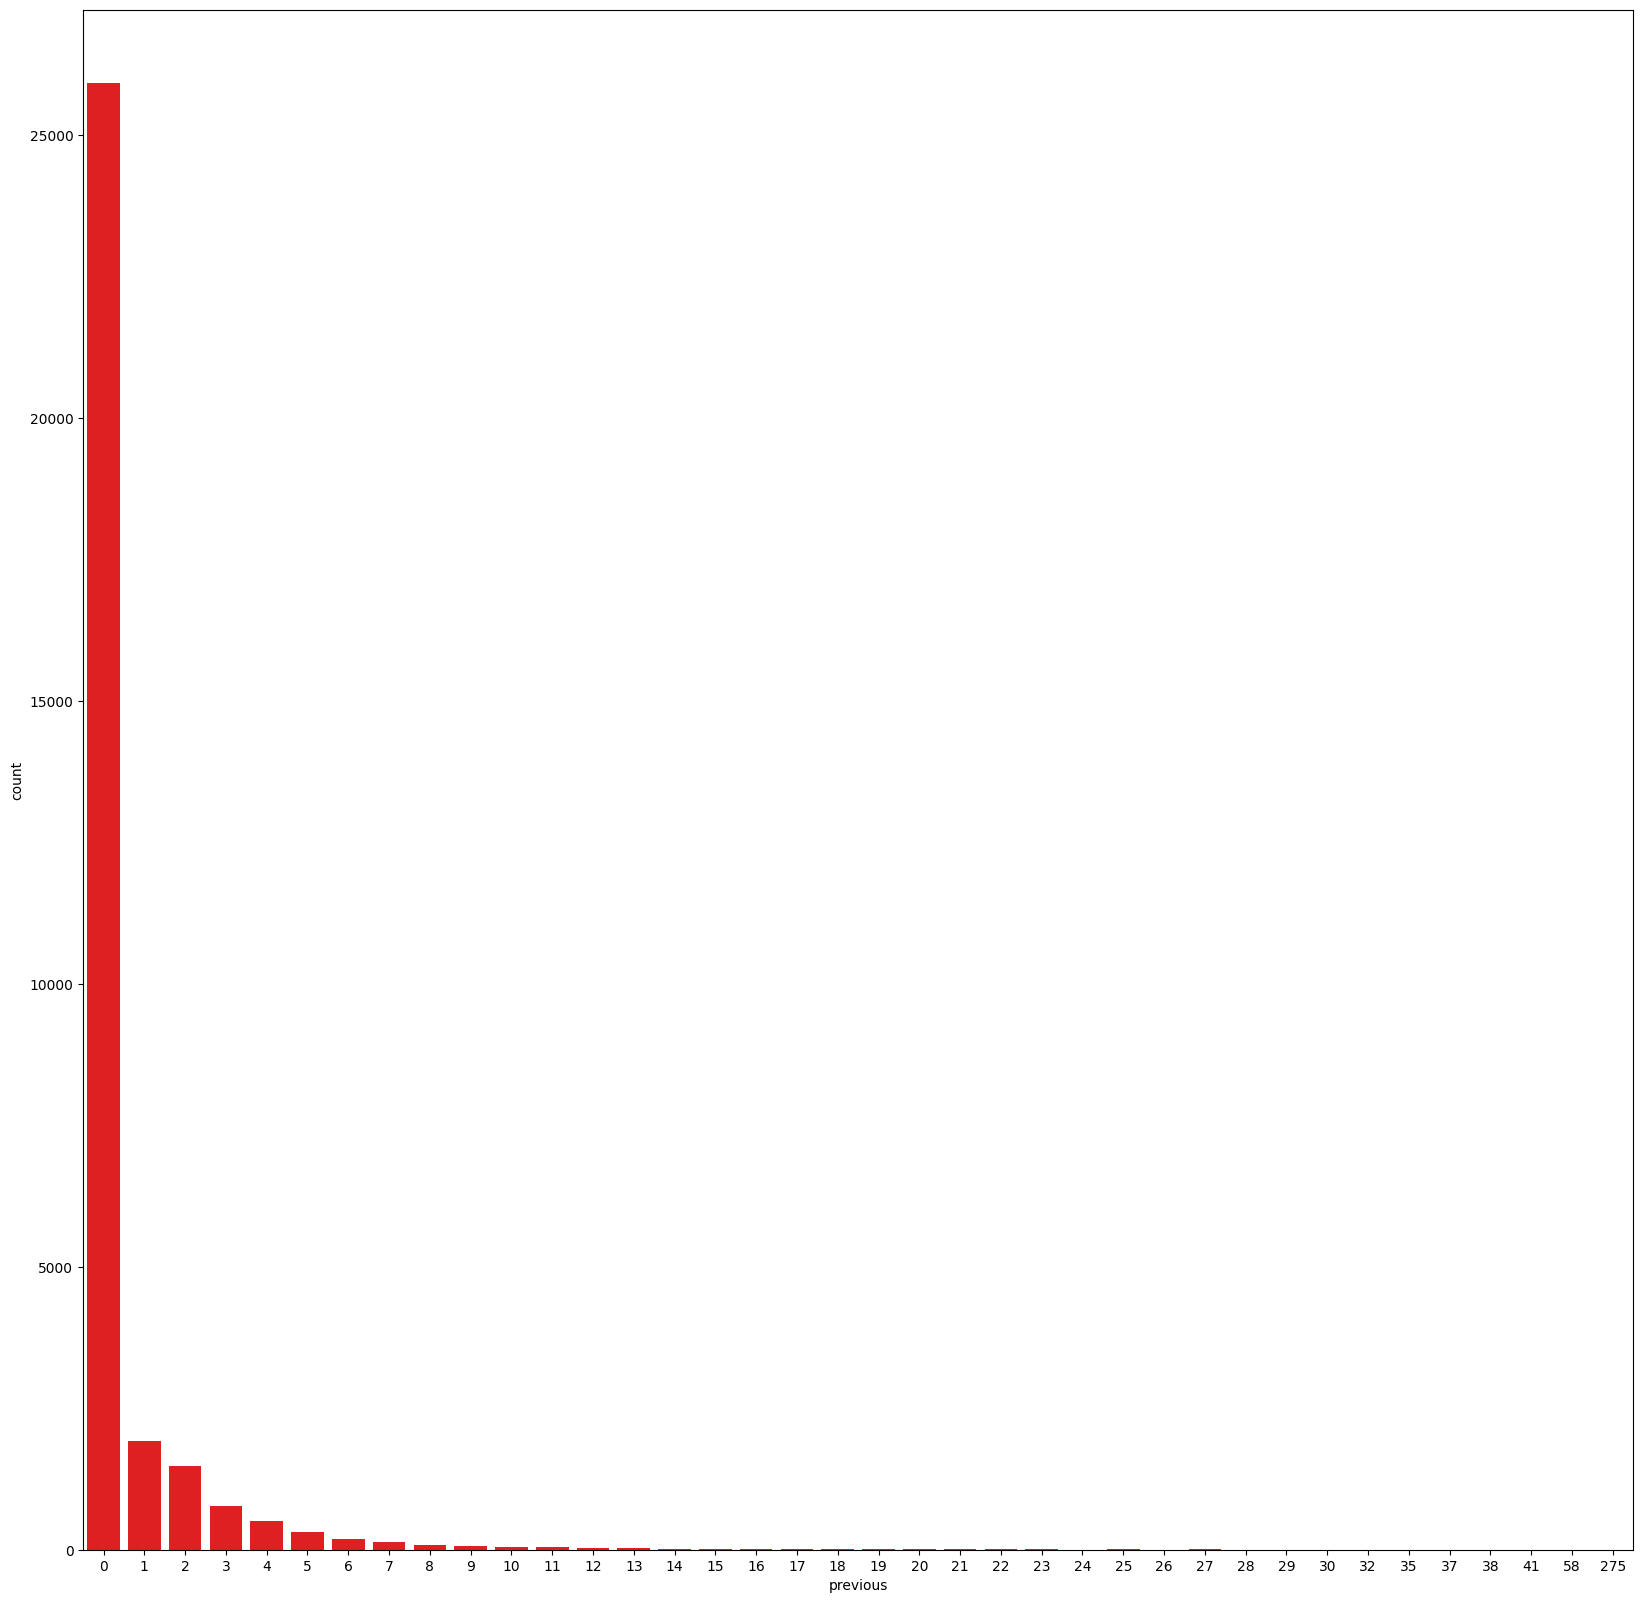

In [47]:
ax,fig=plt.subplots(figsize=(20,20))
#for i in range(1,len(numerical)):
sns.barplot(dftrn['previous'].value_counts(),color='red')
    

here from the above barplot it is clear that before campaign maximum number of customer has not been contacted from the financial instition brforr the campaign and it might be the reason that customer has not subscribed any term deposit from the bank

In [25]:
dftrn

,ID,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed,Date
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,0.73,2,0,0,unknown,no,19nov
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,1.52,2,0,0,unknown,no,20jul
2,15320,27,services,married,secondary,no,891,yes,no,cellular,4.00,1,0,0,unknown,no,18jul
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,14.45,1,1,3,success,yes,22jun
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,6.33,1,0,0,unknown,no,4feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,1.93,2,0,0,unknown,no,12may
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,7.30,2,0,0,unknown,yes,5jun
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,0.62,3,0,0,unknown,no,7aug
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,0.37,7,1,12,failure,no,15may


<Axes: xlabel='age', ylabel='Density'>

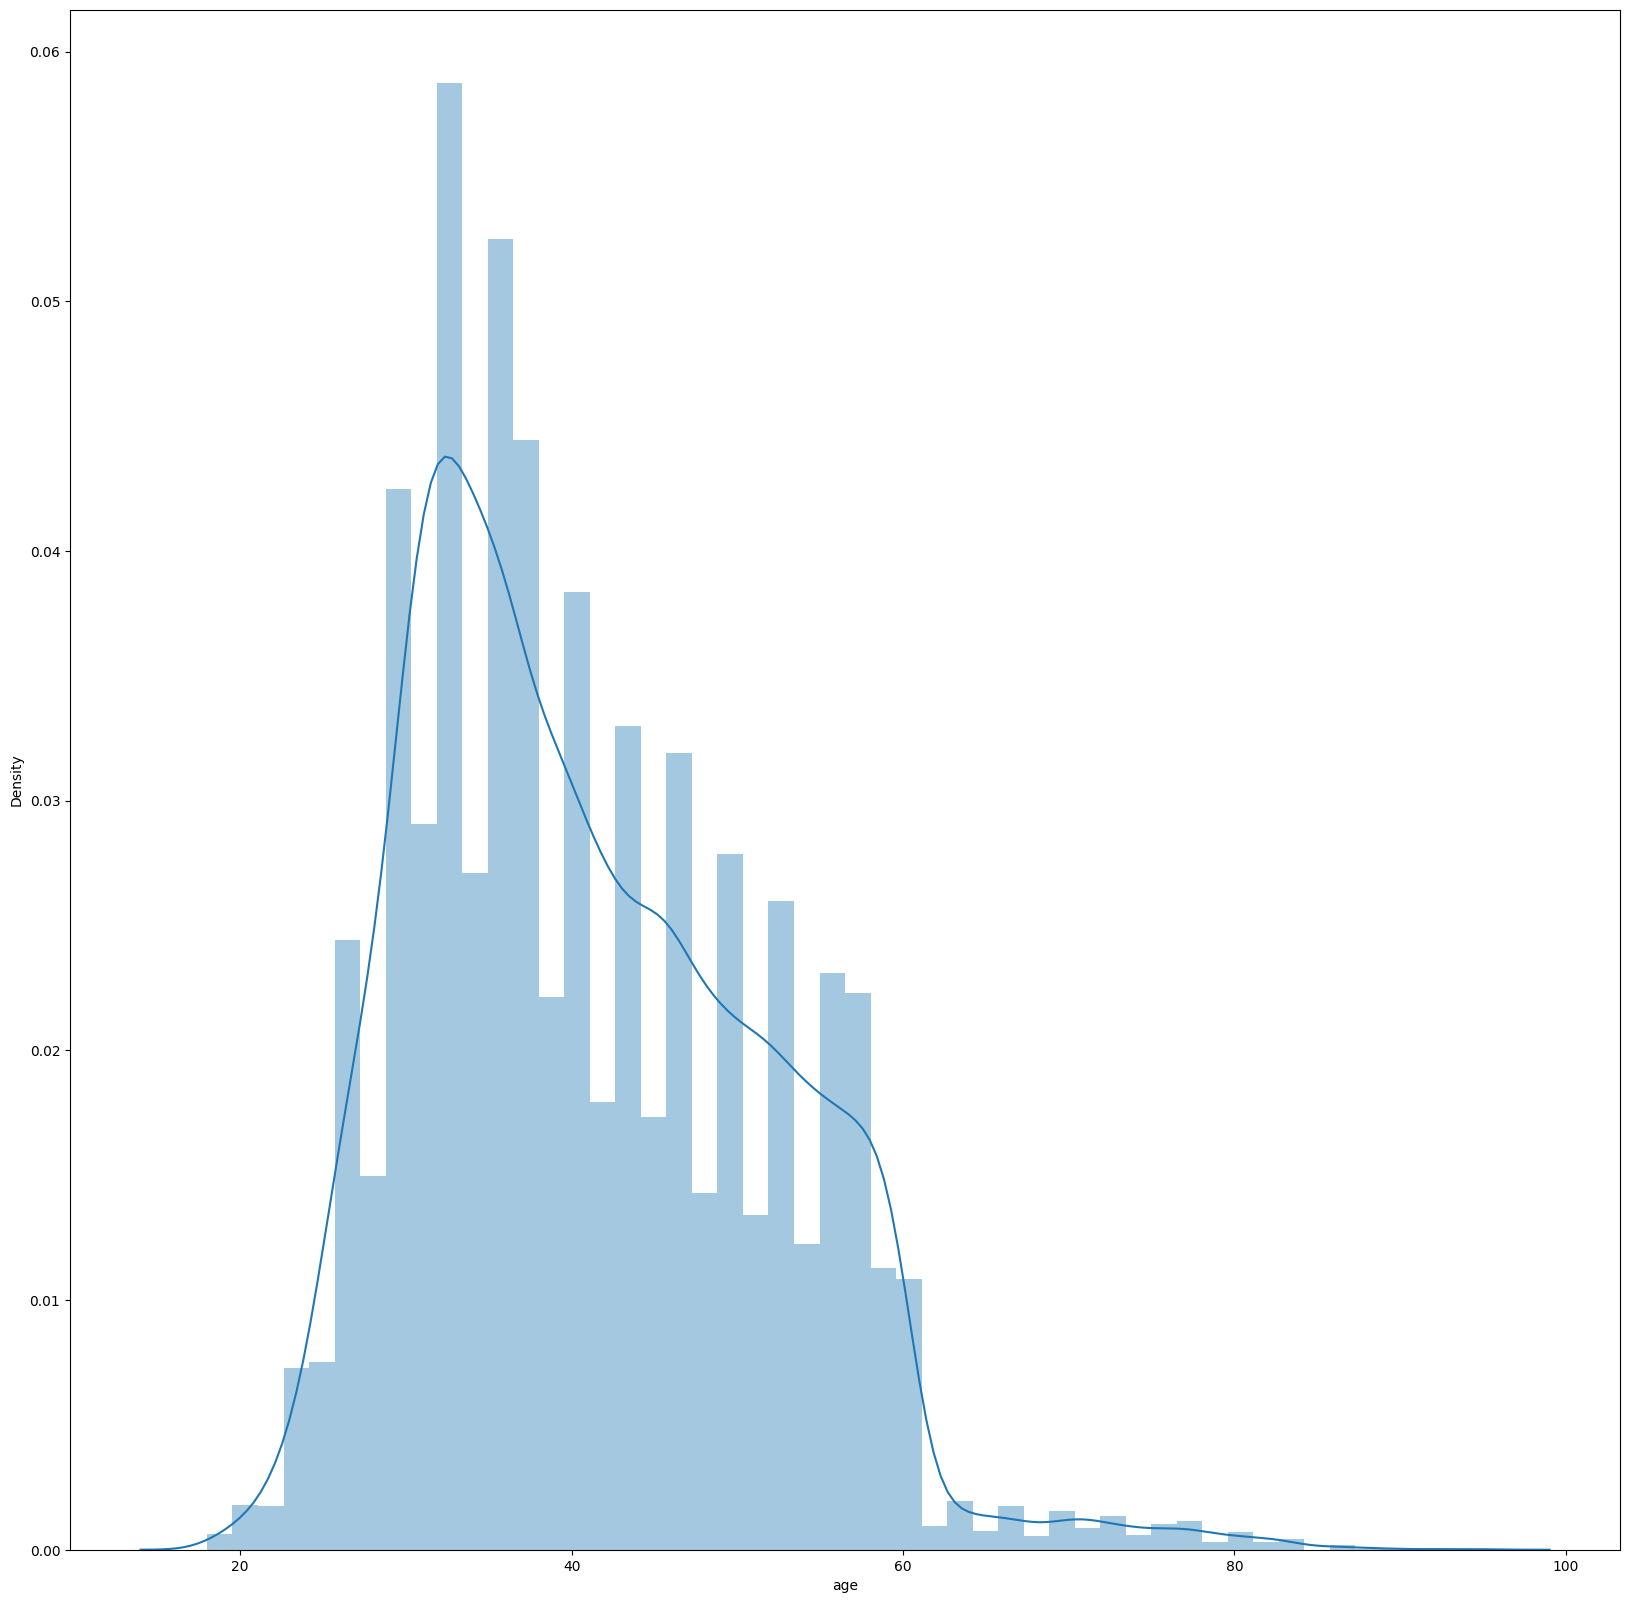

In [26]:
ax,fig=plt.subplots(figsize=(20,20))
sns.distplot(dftrn['age'])

In [ ]:
Here in age feature positive skewness is present as the long tail is towards right direction

<Axes: xlabel='balance', ylabel='Density'>

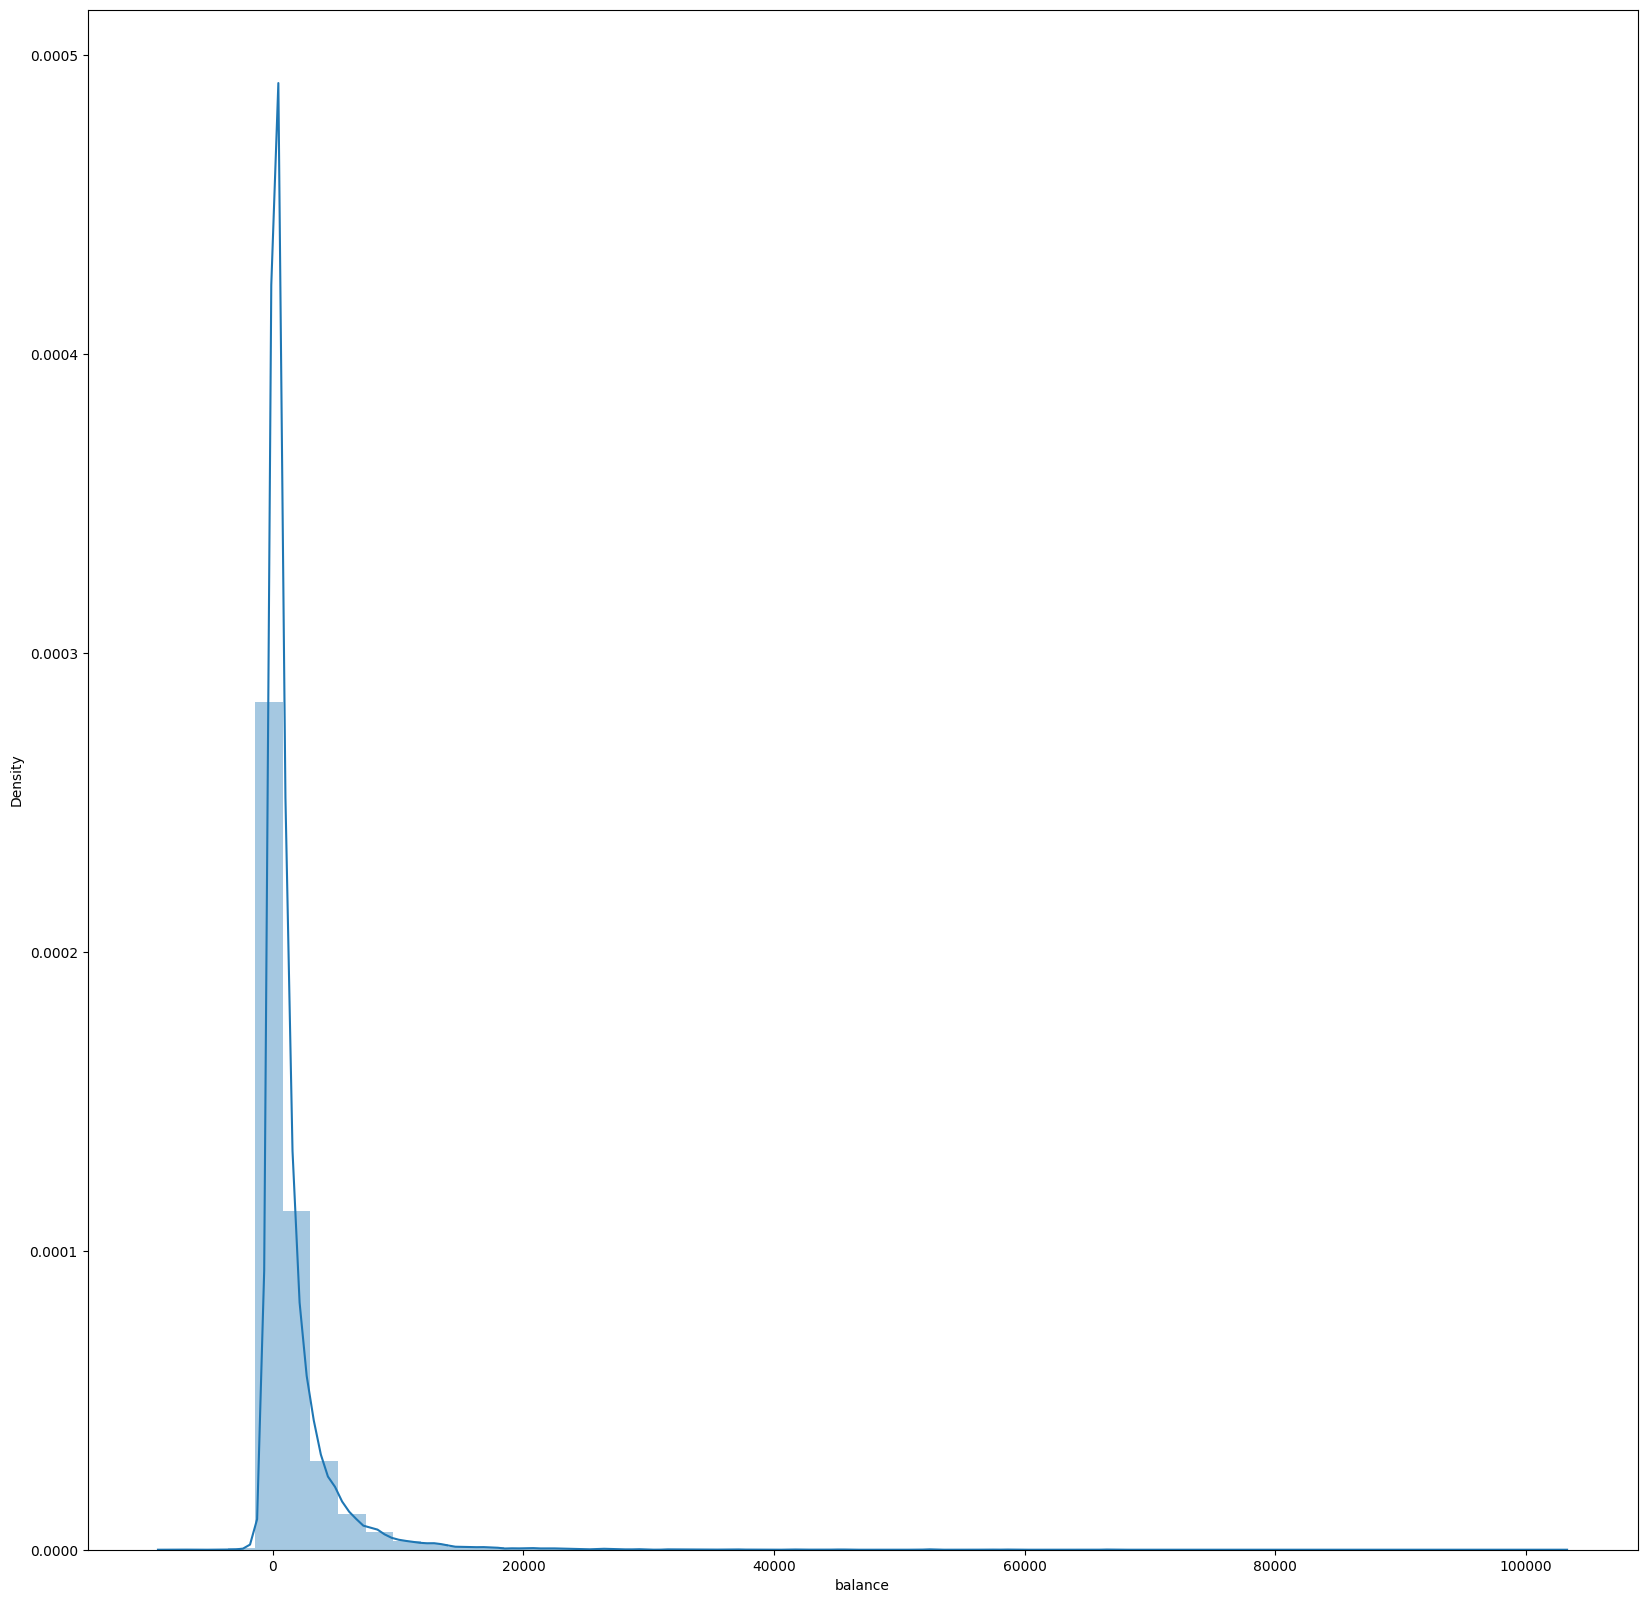

In [44]:
ax,fig=plt.subplots(figsize=(20,20))
sns.distplot(dftrn['balance'])

In [ ]:
here also positive skewness is there in balance feature 

<Axes: xlabel='duration', ylabel='Density'>

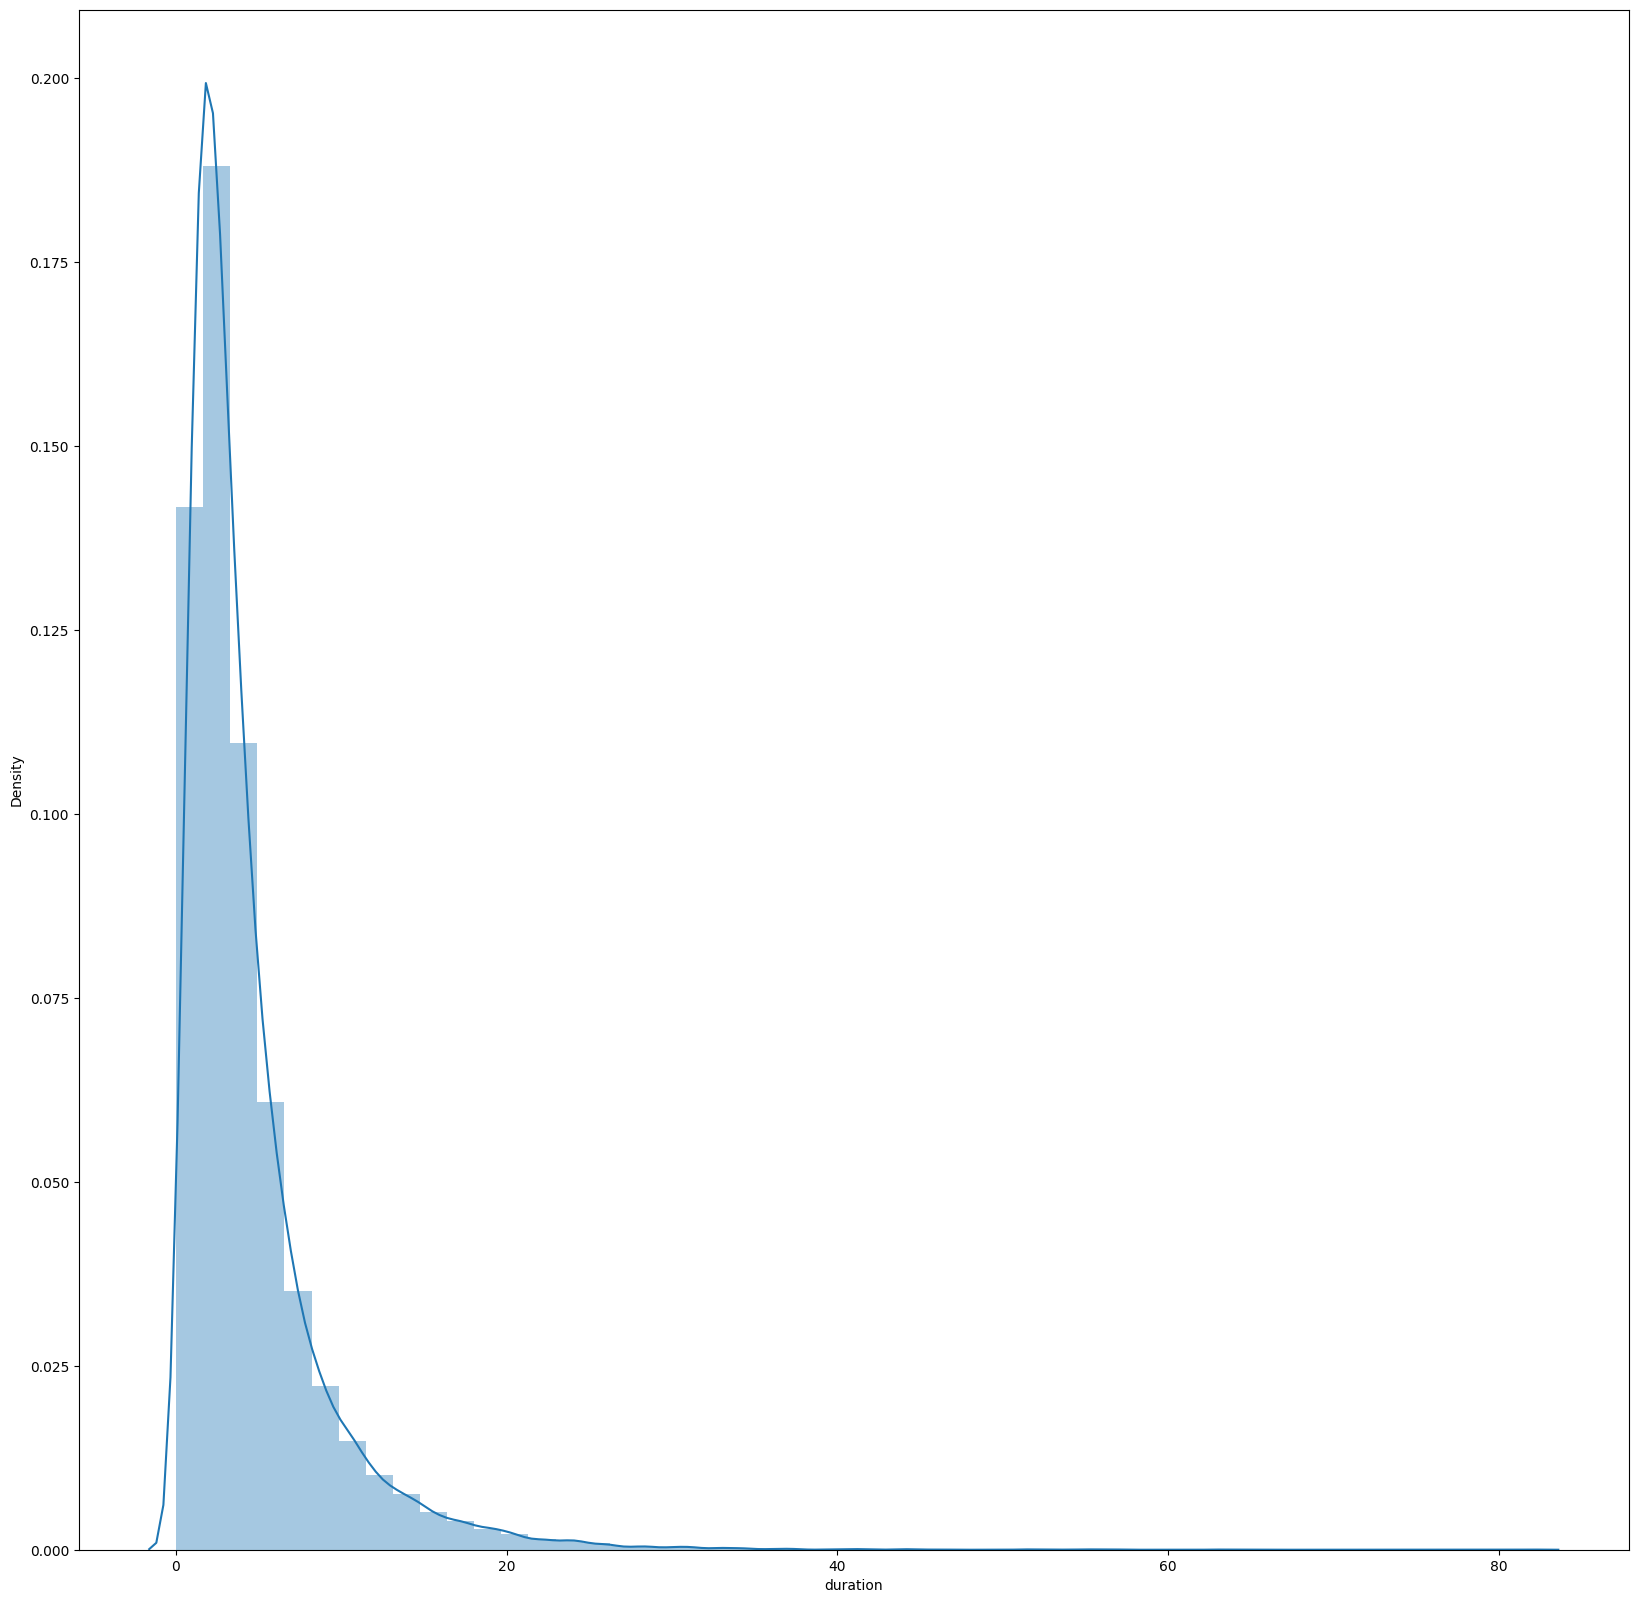

In [45]:
ax,fig=plt.subplots(figsize=(20,20))
sns.distplot(dftrn['duration'])

In [ ]:
#here in duration also we observed positive skewness is present 

In [30]:
from sklearn.preprocessing import LabelEncoder


In [31]:
dftrn=dftrn.apply(LabelEncoder().fit_transform)

In [32]:
dftrn


,ID,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed,Date
0,18299,38,0,1,3,0,2719,0,0,1,43,1,0,0,3,0,104
1,28379,13,11,1,1,0,822,0,0,0,90,1,0,0,3,0,116
2,10766,9,7,1,1,0,1709,1,0,0,239,0,0,0,3,0,90
3,30772,39,4,0,2,0,3815,0,0,0,864,0,1,3,2,1,139
4,20922,13,9,1,1,0,938,1,0,0,379,0,0,0,3,0,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,25522,11,4,2,2,0,819,1,0,0,115,1,0,0,3,0,28
31643,28103,35,4,0,2,0,1199,0,1,0,437,1,0,0,3,1,264
31644,13887,14,4,2,2,0,1131,0,0,0,36,2,0,0,3,0,281
31645,26950,39,9,1,1,0,1044,1,0,1,21,6,1,12,0,0,60


<Axes: >

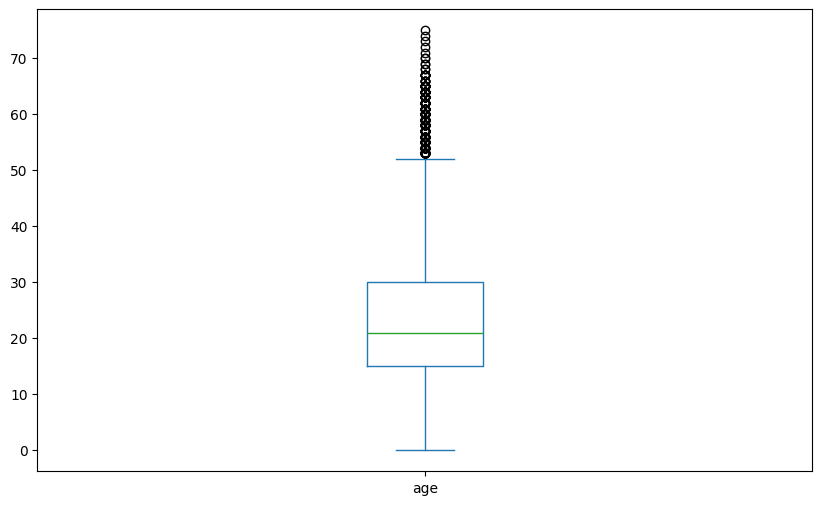

In [122]:
plt.figure(figsize=(10,6) )
dftrn['age'].plot(kind='box')

<Axes: >

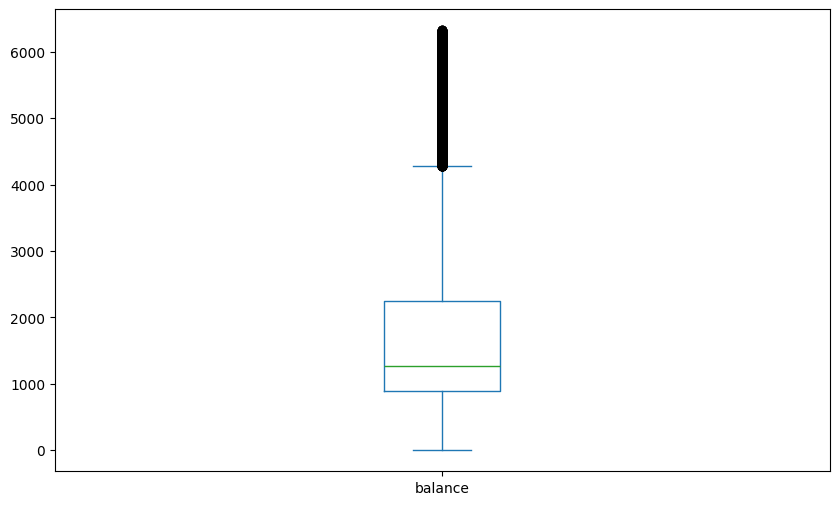

In [123]:
plt.figure(figsize=(10,6) )
dftrn['balance'].plot(kind='box')

<Axes: >

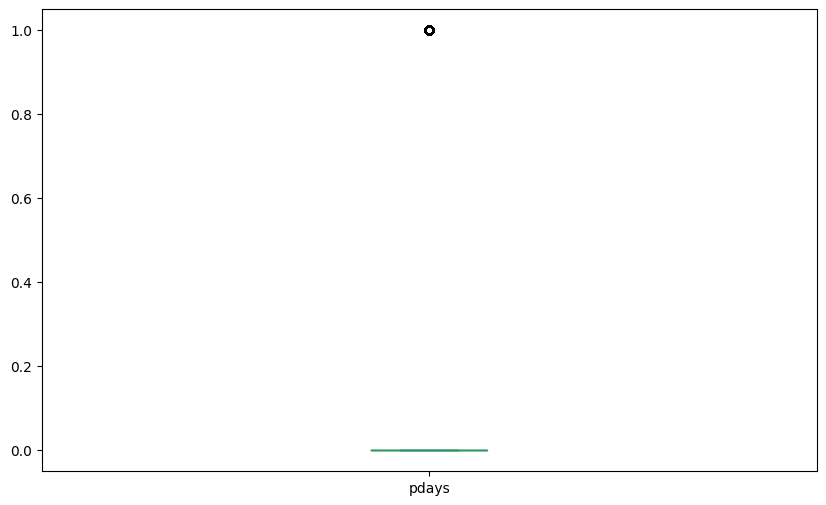

In [124]:
plt.figure(figsize=(10,6) )
dftrn['pdays'].plot(kind='box')

#Here from the above boxplot it is clear that in the feature age and balance outliers are present so in real scenario it is common to have outliers will be be present so now i am not removing outliers and first i will perform hit and trial then when need i will remove outliers

In [33]:
dftrn.skew()

ID            0.000000
age           0.678287
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance       1.540853
housing      -0.223918
loan          1.833474
contact       0.758602
duration      2.120862
campaign      4.658975
pdays         1.658558
previous      6.739237
poutcome     -1.996421
subscribed    2.377445
Date          0.036789
dtype: float64

In [34]:
for i in dftrn.columns:
    dftrn[i]=np.cbrt(dftrn[i])

In [35]:
dftrn.skew()

ID           -0.861183
age          -0.145599
job          -1.004264
marital      -1.944243
education    -1.518097
default       7.149903
balance       0.696310
housing      -0.223918
loan          1.833474
contact       0.637383
duration      0.497569
campaign      0.216728
pdays         1.658558
previous      2.043992
poutcome     -2.386125
subscribed    2.377445
Date         -0.737027
dtype: float64

In [36]:
dftrn['default']=np.cbrt(dftrn['default'])

In [37]:
dftrn.skew()

ID           -0.861183
age          -0.145599
job          -1.004264
marital      -1.944243
education    -1.518097
default       7.149903
balance       0.696310
housing      -0.223918
loan          1.833474
contact       0.637383
duration      0.497569
campaign      0.216728
pdays         1.658558
previous      2.043992
poutcome     -2.386125
subscribed    2.377445
Date         -0.737027
dtype: float64

In [38]:
correlation=dftrn.corr()

<Axes: >

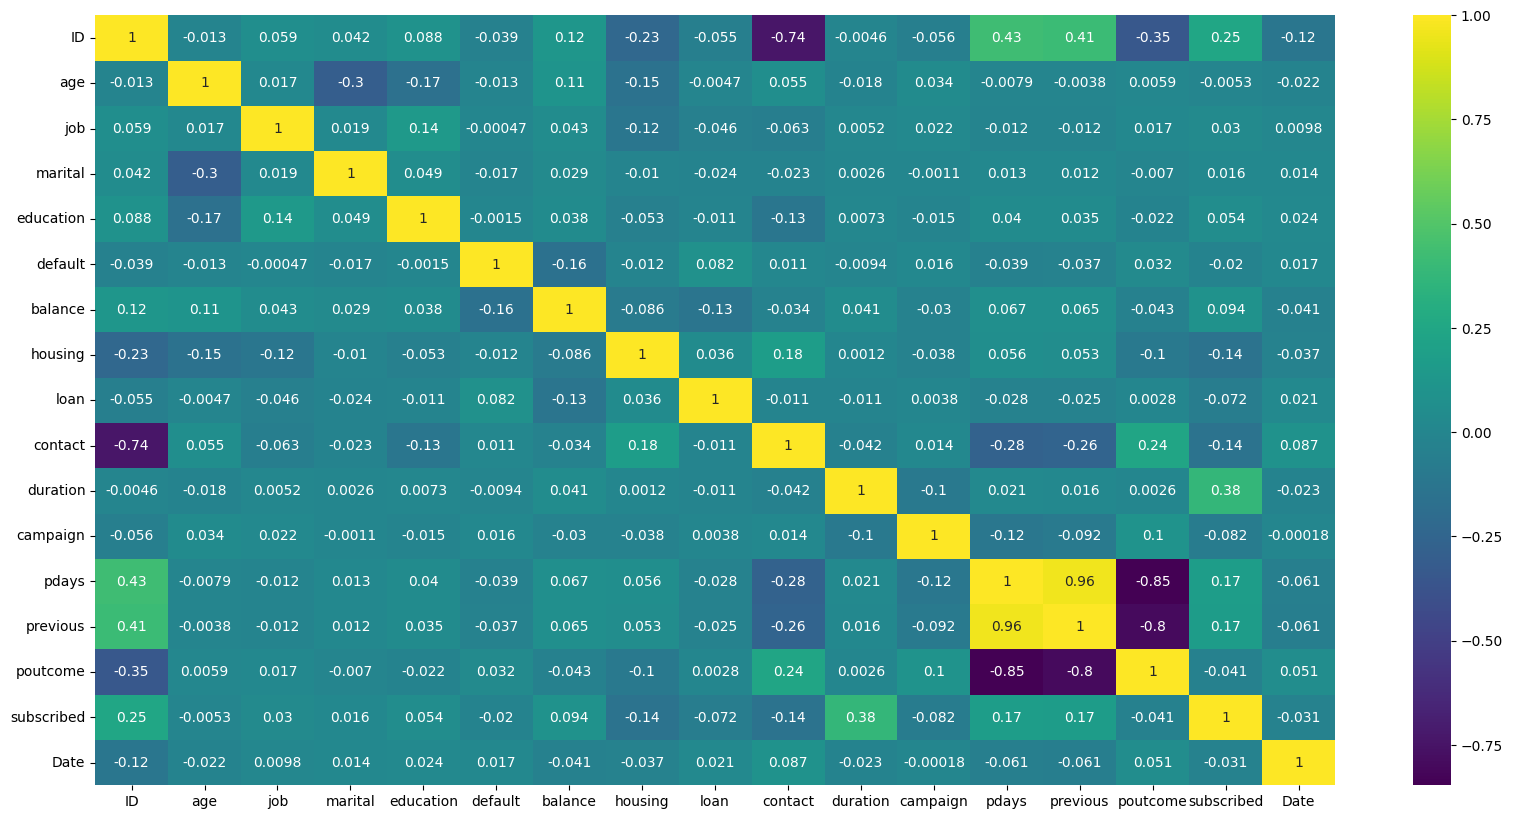

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation,cmap='viridis',annot=True)

#Here from the above correlation we observed that poutcome is highly negatively correlated with pdays
#previous feature is highly positive correlatedwith pdays also moderately positive correlated with output variable that is subscribed

In [40]:
dftrn.drop('ID',axis=1,inplace=True)

In [41]:
x=dftrn.drop('subscribed',axis=1)

In [42]:
x

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,Date
0,3.361975,0.000000,1.000000,1.442250,0.0,13.957353,0.0,0.0,1.0,3.503398,1.000000,0.0,0.000000,1.442250,4.702669
1,2.351335,2.223980,1.000000,1.000000,0.0,9.367505,0.0,0.0,0.0,4.481405,1.000000,0.0,0.000000,1.442250,4.876999
2,2.080084,1.912931,1.000000,1.000000,0.0,11.955856,1.0,0.0,0.0,6.205822,0.000000,0.0,0.000000,1.442250,4.481405
3,3.391211,1.587401,0.000000,1.259921,0.0,15.625413,0.0,0.0,0.0,9.524406,0.000000,1.0,1.442250,1.259921,5.180101
4,2.351335,2.080084,1.000000,1.000000,0.0,9.788909,1.0,0.0,0.0,7.236797,0.000000,0.0,0.000000,1.442250,6.307994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,2.223980,1.587401,1.259921,1.259921,0.0,9.356095,1.0,0.0,0.0,4.862944,1.000000,0.0,0.000000,1.442250,3.036589
31643,3.271066,1.587401,0.000000,1.259921,0.0,10.623633,0.0,1.0,0.0,7.588579,1.000000,0.0,0.000000,1.442250,6.415069
31644,2.410142,1.587401,1.259921,1.259921,0.0,10.418876,0.0,0.0,0.0,3.301927,1.259921,0.0,0.000000,1.442250,6.549912
31645,3.391211,2.080084,1.000000,1.000000,0.0,10.144567,1.0,0.0,1.0,2.758924,1.817121,1.0,2.289428,0.000000,3.914868


In [43]:
y=dftrn.iloc[:,-2]

In [44]:
y.value_counts()

subscribed
0.0    27932
1.0     3715
Name: count, dtype: int64

In [45]:
from sklearn.preprocessing import StandardScaler
scale_data_x=StandardScaler()
x=pd.DataFrame(scale_data_x.fit_transform(x),columns=x.columns)
x

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,Date
0,1.314304,-2.222638,0.114005,1.188316,-0.137234,0.882898,-1.118201,-0.439893,0.977386,-1.347366,0.287242,-0.469852,-0.449733,0.398005,-0.352023
1,-0.935861,1.260372,0.114005,0.136037,-0.137234,-0.836149,-1.118201,-0.439893,-0.737430,-0.781881,0.287242,-0.469852,-0.449733,0.398005,-0.212688
2,-1.539794,0.773233,0.114005,0.136037,-0.137234,0.133272,0.894294,-0.439893,-0.737430,0.215181,-1.137147,-0.469852,-0.449733,0.398005,-0.528871
3,1.379397,0.263416,-2.638059,0.754487,-0.137234,1.507640,-1.118201,-0.439893,-0.737430,2.133993,-1.137147,2.128331,2.194264,-0.011130,0.029569
4,-0.935861,1.035014,0.114005,0.136037,-0.137234,-0.678320,0.894294,-0.439893,-0.737430,0.811293,-1.137147,-0.469852,-0.449733,0.398005,0.931048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-1.219412,0.263416,0.829324,0.754487,-0.137234,-0.840422,0.894294,-0.439893,-0.737430,-0.561274,0.287242,-0.469852,-0.449733,0.398005,-1.683654
31643,1.111898,0.263416,-2.638059,0.754487,-0.137234,-0.365688,-1.118201,2.273280,-0.737430,1.014694,0.287242,-0.469852,-0.449733,0.398005,1.016629
31644,-0.804927,0.263416,0.829324,0.754487,-0.137234,-0.442376,-1.118201,-0.439893,-0.737430,-1.463857,0.657470,-0.469852,-0.449733,0.398005,1.124403
31645,1.379397,1.035014,0.114005,0.136037,-0.137234,-0.545114,0.894294,-0.439893,0.977386,-1.777822,1.451139,2.128331,3.747351,-2.838320,-0.981681


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,1.189092,age
1,1.040181,job
2,1.109125,marital
3,1.070736,education
4,1.031316,default
5,1.072886,balance
6,1.114488,housing
7,1.026897,loan
8,1.161600,contact
9,1.016293,duration


In [47]:
x=x.drop('pdays',axis=1)

In [48]:
x

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,Date
0,1.314304,-2.222638,0.114005,1.188316,-0.137234,0.882898,-1.118201,-0.439893,0.977386,-1.347366,0.287242,-0.449733,0.398005,-0.352023
1,-0.935861,1.260372,0.114005,0.136037,-0.137234,-0.836149,-1.118201,-0.439893,-0.737430,-0.781881,0.287242,-0.449733,0.398005,-0.212688
2,-1.539794,0.773233,0.114005,0.136037,-0.137234,0.133272,0.894294,-0.439893,-0.737430,0.215181,-1.137147,-0.449733,0.398005,-0.528871
3,1.379397,0.263416,-2.638059,0.754487,-0.137234,1.507640,-1.118201,-0.439893,-0.737430,2.133993,-1.137147,2.194264,-0.011130,0.029569
4,-0.935861,1.035014,0.114005,0.136037,-0.137234,-0.678320,0.894294,-0.439893,-0.737430,0.811293,-1.137147,-0.449733,0.398005,0.931048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-1.219412,0.263416,0.829324,0.754487,-0.137234,-0.840422,0.894294,-0.439893,-0.737430,-0.561274,0.287242,-0.449733,0.398005,-1.683654
31643,1.111898,0.263416,-2.638059,0.754487,-0.137234,-0.365688,-1.118201,2.273280,-0.737430,1.014694,0.287242,-0.449733,0.398005,1.016629
31644,-0.804927,0.263416,0.829324,0.754487,-0.137234,-0.442376,-1.118201,-0.439893,-0.737430,-1.463857,0.657470,-0.449733,0.398005,1.124403
31645,1.379397,1.035014,0.114005,0.136037,-0.137234,-0.545114,0.894294,-0.439893,0.977386,-1.777822,1.451139,3.747351,-2.838320,-0.981681


In [49]:
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,1.189011,age
1,1.040141,job
2,1.109121,marital
3,1.070475,education
4,1.031228,default
5,1.072621,balance
6,1.114054,housing
7,1.026168,loan
8,1.155749,contact
9,1.015841,duration


In [50]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x1,y1=smt.fit_resample(x,y)


In [51]:
y1.value_counts()

subscribed
0.0    27932
1.0    27932
Name: count, dtype: int64

In [ ]:
# Here now its a balanced data for each category 

In [52]:
x1.shape

(55864, 14)

In [53]:
y1.shape

(55864,)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
maxac=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxac:
        maxac=acc
        maxRS=i
print('best accuracy',maxac,"at random state",maxRS)


In [55]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=42)


In [ ]:
RFC=RandomForestClassifier()
classification_model(RFC)

In [66]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94      8422
         1.0       0.92      0.95      0.94      8338

    accuracy                           0.94     16760
   macro avg       0.94      0.94      0.94     16760
weighted avg       0.94      0.94      0.94     16760



In [67]:
c_matrix=confusion_matrix(y_test,pred)
print(c_matrix)

[[7763  659]
 [ 410 7928]]


In [58]:
def classification_models(model,x,y,x_test,y_test):
     
    model.fit(x,y)
    pred=model.predict(x_test)
    print(accuracy_score(y_test,pred))
    c_matrix=confusion_matrix(y_test,pred)
    print(c_matrix)
    print(classification_report(y_test,pred))
    x_labels=['0','1']
    y_labels=['0','1']
    plt.figure(figsize=(6,6))
    sns.heatmap(c_matrix,annot=True,linewidth=0.2,linecolor='red',fmt='.2f')
    plt.xlabel('predicted value')
    plt.ylabel('actual value')
    



0.9384248210023867
[[7785  637]
 [ 395 7943]]
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94      8422
         1.0       0.93      0.95      0.94      8338

    accuracy                           0.94     16760
   macro avg       0.94      0.94      0.94     16760
weighted avg       0.94      0.94      0.94     16760



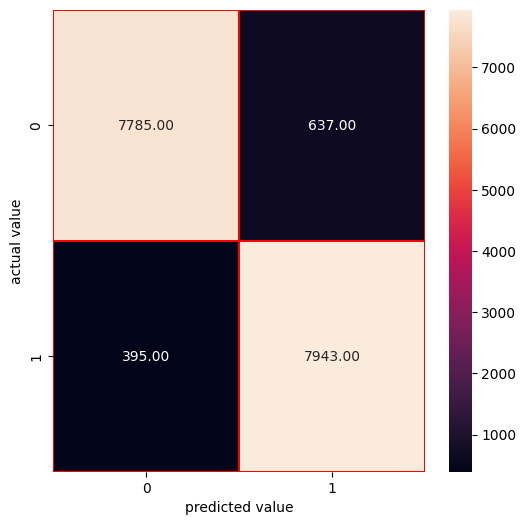

In [59]:
RFC=RandomForestClassifier()
classification_models(RFC,x_train,y_train,x_test,y_test)

0.8139618138424821
[[6765 1657]
 [1461 6877]]
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      8422
         1.0       0.81      0.82      0.82      8338

    accuracy                           0.81     16760
   macro avg       0.81      0.81      0.81     16760
weighted avg       0.81      0.81      0.81     16760



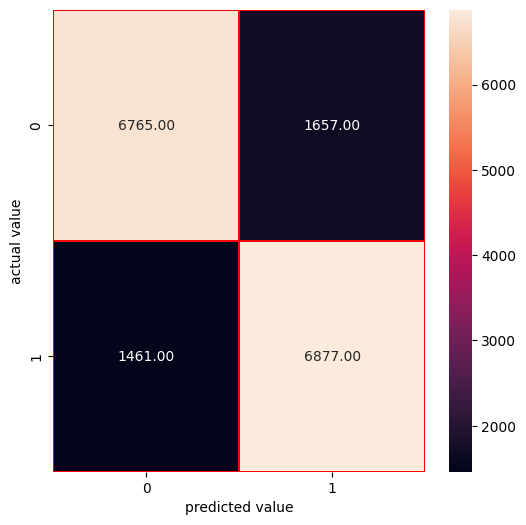

In [75]:
LR=LogisticRegression()
classification_models(LR,x_train,y_train,x_test,y_test)

0.8526252983293556
[[6716 1706]
 [ 764 7574]]
              precision    recall  f1-score   support

         0.0       0.90      0.80      0.84      8422
         1.0       0.82      0.91      0.86      8338

    accuracy                           0.85     16760
   macro avg       0.86      0.85      0.85     16760
weighted avg       0.86      0.85      0.85     16760



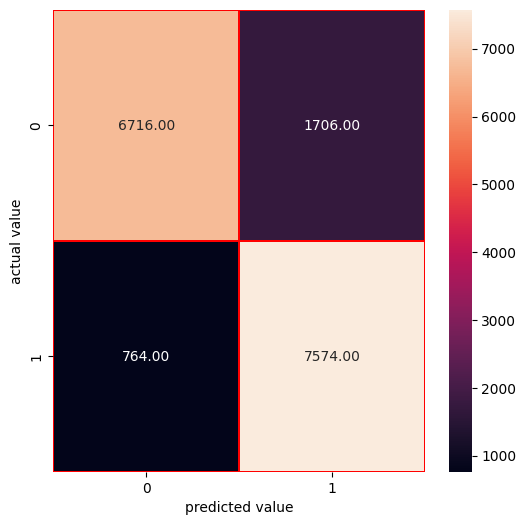

In [76]:
svc=SVC()
classification_models(svc,x_train,y_train,x_test ,y_test)

0.9502386634844868
[[7759  663]
 [ 171 8167]]
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      8422
         1.0       0.92      0.98      0.95      8338

    accuracy                           0.95     16760
   macro avg       0.95      0.95      0.95     16760
weighted avg       0.95      0.95      0.95     16760



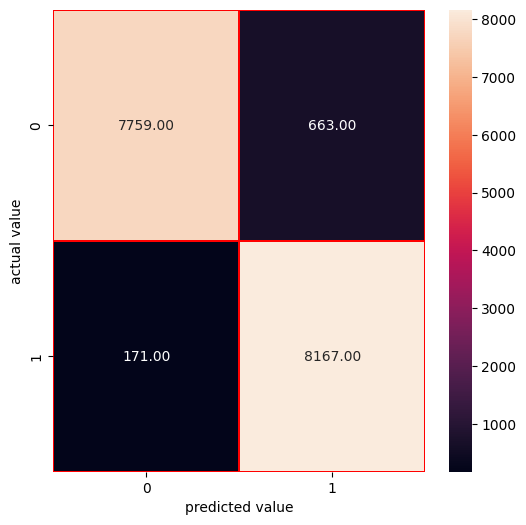

In [66]:
etc=ExtraTreesClassifier()
classification_models(etc,x_train,y_train,x_test,y_test)

0.9036396181384249
[[7439  983]
 [ 632 7706]]
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90      8422
         1.0       0.89      0.92      0.91      8338

    accuracy                           0.90     16760
   macro avg       0.90      0.90      0.90     16760
weighted avg       0.90      0.90      0.90     16760



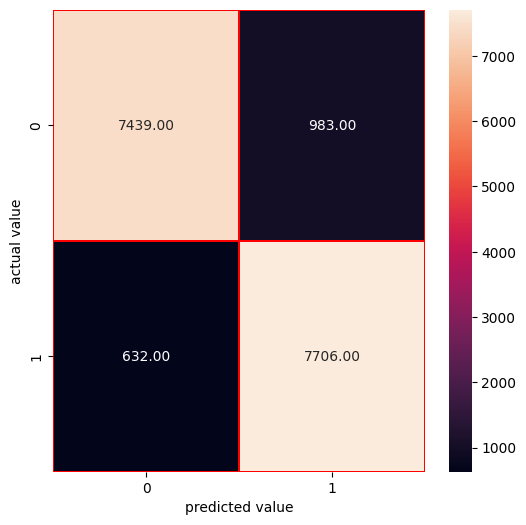

In [78]:
gbc=GradientBoostingClassifier()
classification_models(gbc,x_train,y_train,x_test,y_test)

0.9196300715990453
[[7715  707]
 [ 640 7698]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      8422
         1.0       0.92      0.92      0.92      8338

    accuracy                           0.92     16760
   macro avg       0.92      0.92      0.92     16760
weighted avg       0.92      0.92      0.92     16760



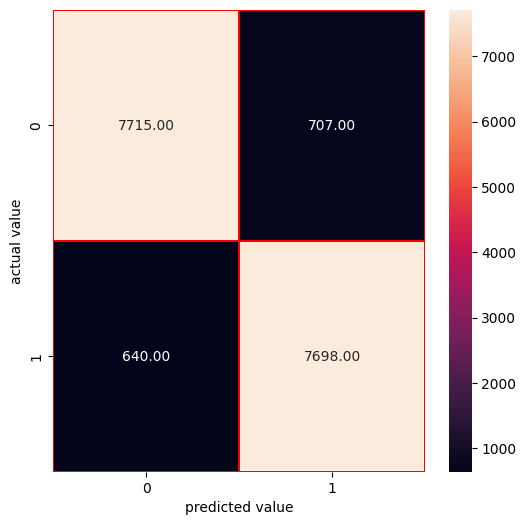

In [79]:
bgc=BaggingClassifier()
classification_models(bgc,x_train,y_train,x_test,y_test)

0.8883651551312649
[[7429  993]
 [ 878 7460]]
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89      8422
         1.0       0.88      0.89      0.89      8338

    accuracy                           0.89     16760
   macro avg       0.89      0.89      0.89     16760
weighted avg       0.89      0.89      0.89     16760



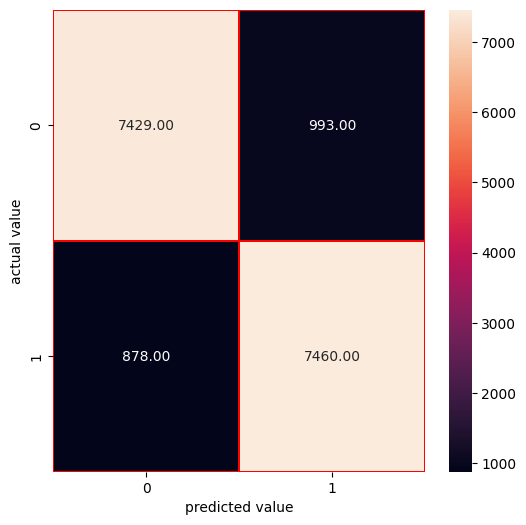

In [80]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
classification_models(dtc,x_train,y_train,x_test,y_test)

In [90]:
def cross_validation(model,x1,y1):
    
    pred=model.predict(x_test)
    score=cross_val_score(model,x1,y1)
    print(score)
    print(score.mean())
    print('differnce between accuracy score and cross validation is',accuracy_score(y_test,pred)-score.mean())
    

In [91]:
# checking cross_val score for Logistic Regression
cross_validation(LR,x1,y1)

[0.80819834 0.81741699 0.81714848 0.81875951 0.81820623]
0.8159459089990131
differnce between accuracy score and cross validation is -0.001984095156530974


In [84]:
# checking cross_validation score for Random Forest Classifer
cross_validation(RFC,x1,y1)


[0.87174438 0.95560727 0.95059518 0.95399624 0.95345507]
0.9370796286595585
differnce between accuracy score and cross validation is -0.0012801059865275022


In [85]:
#checking cross validation for ExtraTreesClassifier
cross_validation(etc,x1,y1)


[0.94370357 0.96196187 0.95891882 0.96044035 0.96142141]
0.9572892047151289
differnce between accuracy score and cross validation is -0.007408536457372383


In [86]:
#checking cross validation for GradientBoostingClassifier
cross_validation(gbc,x1,y1)


[0.82233957 0.91577911 0.91210955 0.91926967 0.91595059]
0.8970896974955833
differnce between accuracy score and cross validation is 0.006549920642841545


In [87]:
# checking cross validaton for decision tree classifer
cross_validation(dtc,x1,y1)


[0.8182225  0.90029535 0.90620245 0.90718697 0.90762621]
0.8879066969696299
differnce between accuracy score and cross validation is 0.0004584581616350336


# From the Above observation of accuracy score and cross validation score I am selecting best model for my project is ExtraTreeClassifier
[0.94370357 0.96196187 0.95891882 0.96044035 0.96142141]
0.9572892047151289
differnce between accuracy score and cross validation is -0.007408536457372383
Here cross validation score is high as compared to other classification algorithm and also differnce between the accuracy score and cross validation score is very less

In [ ]:
# Now i am performing HyperParameter Tuning for my selected model using Grid Serach Cvy

In [69]:
from sklearn.model_selection import GridSearchCV

In [61]:
parameter_grid={'n_estimators':[100,200,300],'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}

In [67]:
grid_search=GridSearchCV(estimator=etc,param_grid=parameter_grid,cv=5,n_jobs=-1)

In [70]:
final_model=etc.fit(x_train,y_train)
pred=final_model.predict(x_test)
score=cross_val_score(etc,x_train,y_train)
print(score.mean())

0.9429470168681539


In [71]:
accuracy=final_model.score(x_test,y_test)
print (accuracy)


0.9507159904534607


In [72]:
import joblib
joblib.dump(final_model,'Bank_Marketing.pkl')

['Bank_Marketing.pkl']

In [ ]:
                            EXPLORATORY DATA ANALYSIS , PREPROCESSING AND FEATURE SCALING FOR TEST.CSV

In [73]:
dftst=pd.read_csv('term_deposit_test.csv')

In [74]:
dftst

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [75]:
dftst.shape

(13564, 17)

In [76]:
dftst.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [77]:
dftst.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [78]:
dftst.nunique()

ID           13564
age             75
job             12
marital          3
education        4
default          2
balance       4292
housing          2
loan             2
contact          3
day             31
month           12
duration      1201
campaign        40
pdays          422
previous        33
poutcome         4
dtype: int64

In [81]:
dftst.duplicated().sum()

0

In [82]:
for i in dftst.columns:
    print(dftst[i].value_counts())

ID
38441    1
23664    1
23378    1
18945    1
32574    1
        ..
4606     1
23686    1
35672    1
8550     1
34839    1
Name: count, Length: 13564, dtype: int64
age
32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: count, Length: 75, dtype: int64
job
blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: count, dtype: int64
marital
married     8119
single      3868
divorced    1577
Name: count, dtype: int64
education
secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: count, dtype: int64
default
no     13334
yes      230
Name: count, dtype: int64
balance
 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
-140        1
 6495       1
 8180       1
 3

In [85]:
dftst['Date']=dftst['day'].astype(str) + dftst['month']

In [86]:
dftst

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Date
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown,15may
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown,1jul
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown,16may
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown,13may
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown,3jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown,28aug
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown,20jun
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,29jan
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,9nov


In [87]:
dftst.drop('day',axis=1,inplace=True)

In [88]:
dftst.drop('month',axis=1,inplace=True)

In [90]:
dftst

,ID,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,Date
0,38441,32,services,married,secondary,no,118,yes,no,cellular,20,6,-1,0,unknown,15may
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,372,1,-1,0,unknown,1jul
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,676,1,-1,0,unknown,16may
3,37422,57,services,single,primary,no,3777,yes,no,telephone,65,2,-1,0,unknown,13may
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,111,1,-1,0,unknown,3jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,148,4,-1,0,unknown,28aug
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,158,1,-1,0,unknown,20jun
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,136,1,-1,0,unknown,29jan
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,208,2,91,3,success,9nov


In [91]:
categorical=[]
numerical=[]
for i in dftst.columns:
    if (dftst[i].dtypes)==object:
        categorical.append(i)
    else:
        numerical.append(i)

In [92]:
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'Date']

In [93]:
numerical

['ID', 'age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [94]:
dftst['pdays']=dftst['pdays'].apply(lambda x: 1 if x >0 else 0)

In [97]:
dftst.groupby(['Date'])['campaign'].value_counts().sort_values(ascending=True)

Date   campaign
24may  2             1
24aug  3             1
24dec  3             1
24feb  2             1
       3             1
                  ... 
14may  1           130
18nov  1           131
7may   1           138
15may  1           141
13may  1           153
Name: count, Length: 1576, dtype: int64

<Axes: xlabel='poutcome', ylabel='campaign'>

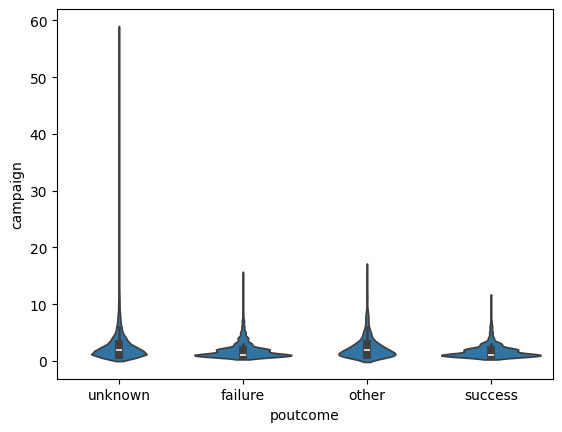

In [99]:

sns.violinplot(x='poutcome',y='campaign',data=dftst)

<Axes: xlabel='campaign', ylabel='contact'>

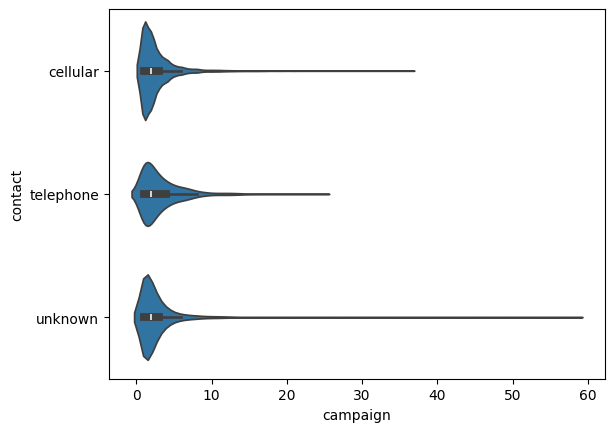

In [100]:
sns.violinplot(x='campaign',y='contact',data=dftst)

<Axes: xlabel='age', ylabel='count'>

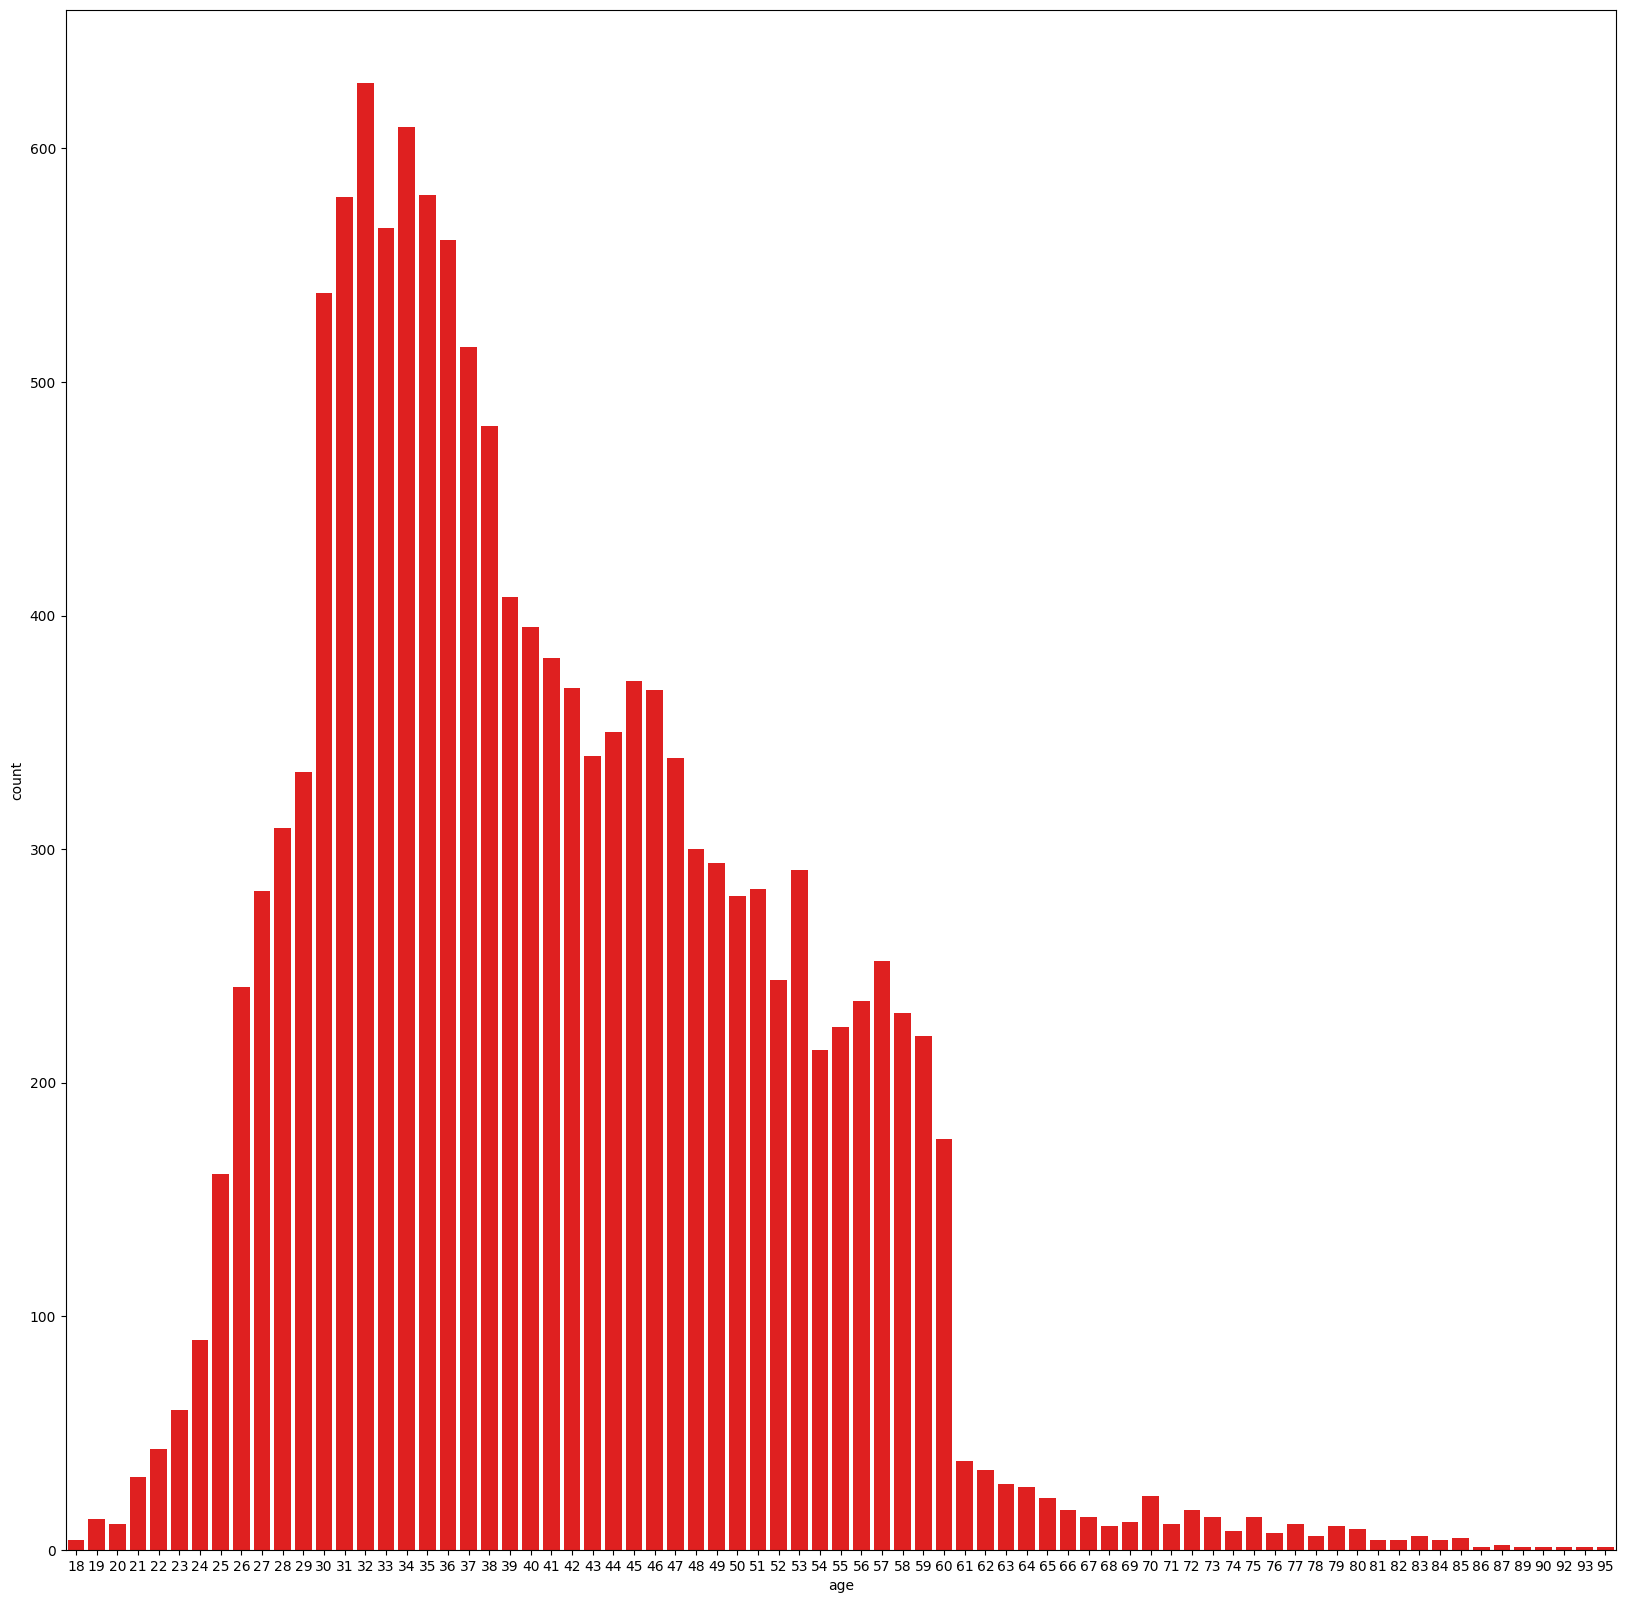

In [102]:
ax,fig=plt.subplots(figsize=(20,20))
#for i in range(1,len(numerical)):
sns.barplot(dftst['age'].value_counts(),color='red')
    

<Axes: xlabel='job', ylabel='count'>

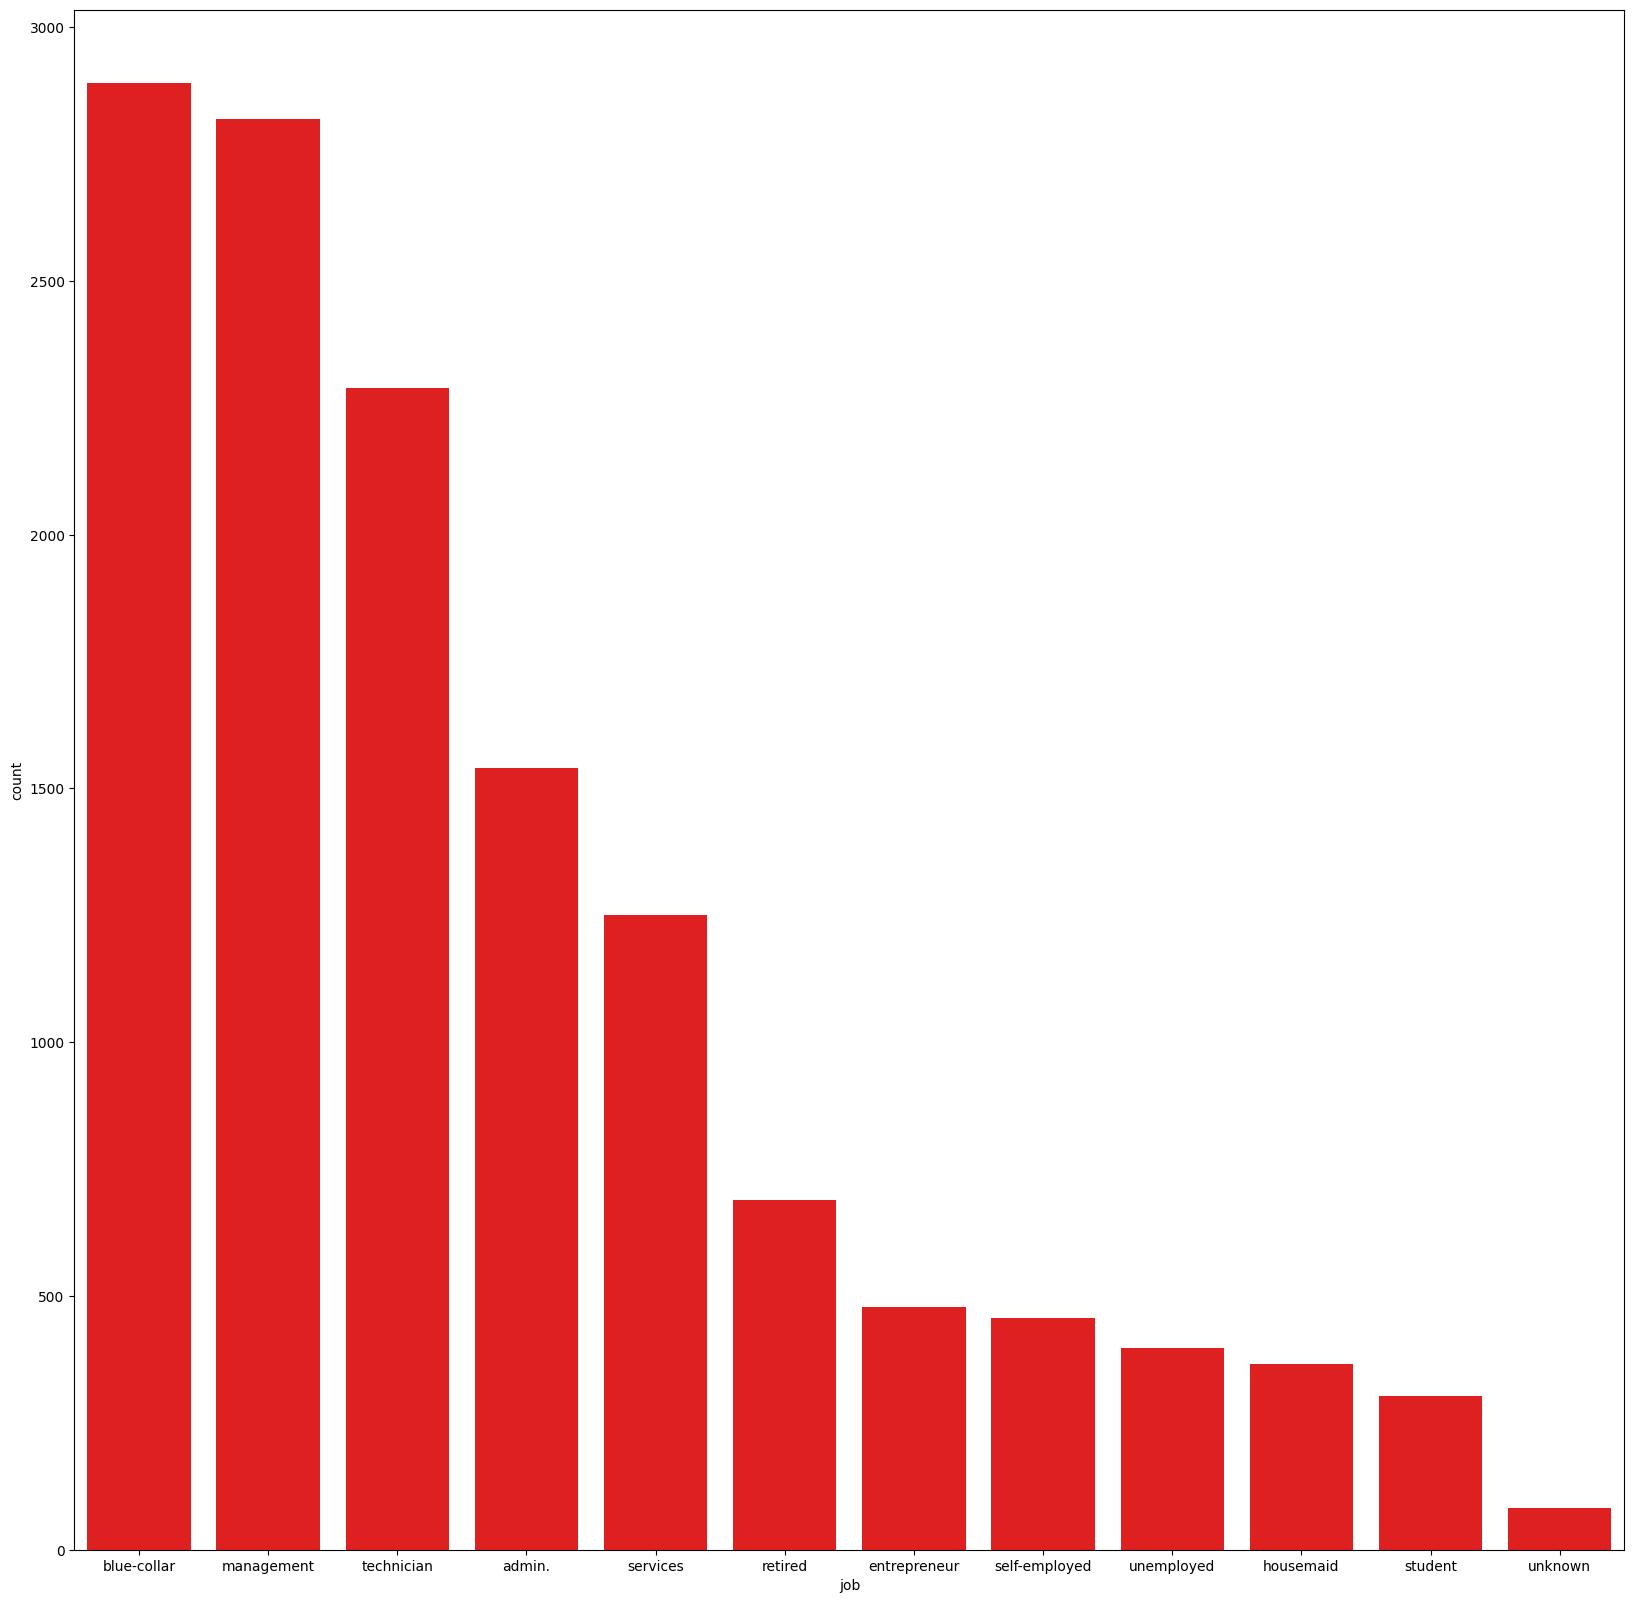

In [104]:
ax,fig=plt.subplots(figsize=(20,20))
#for i in range(1,len(numerical)):
sns.barplot(dftst['job'].value_counts(),color='red')


<Axes: xlabel='education', ylabel='count'>

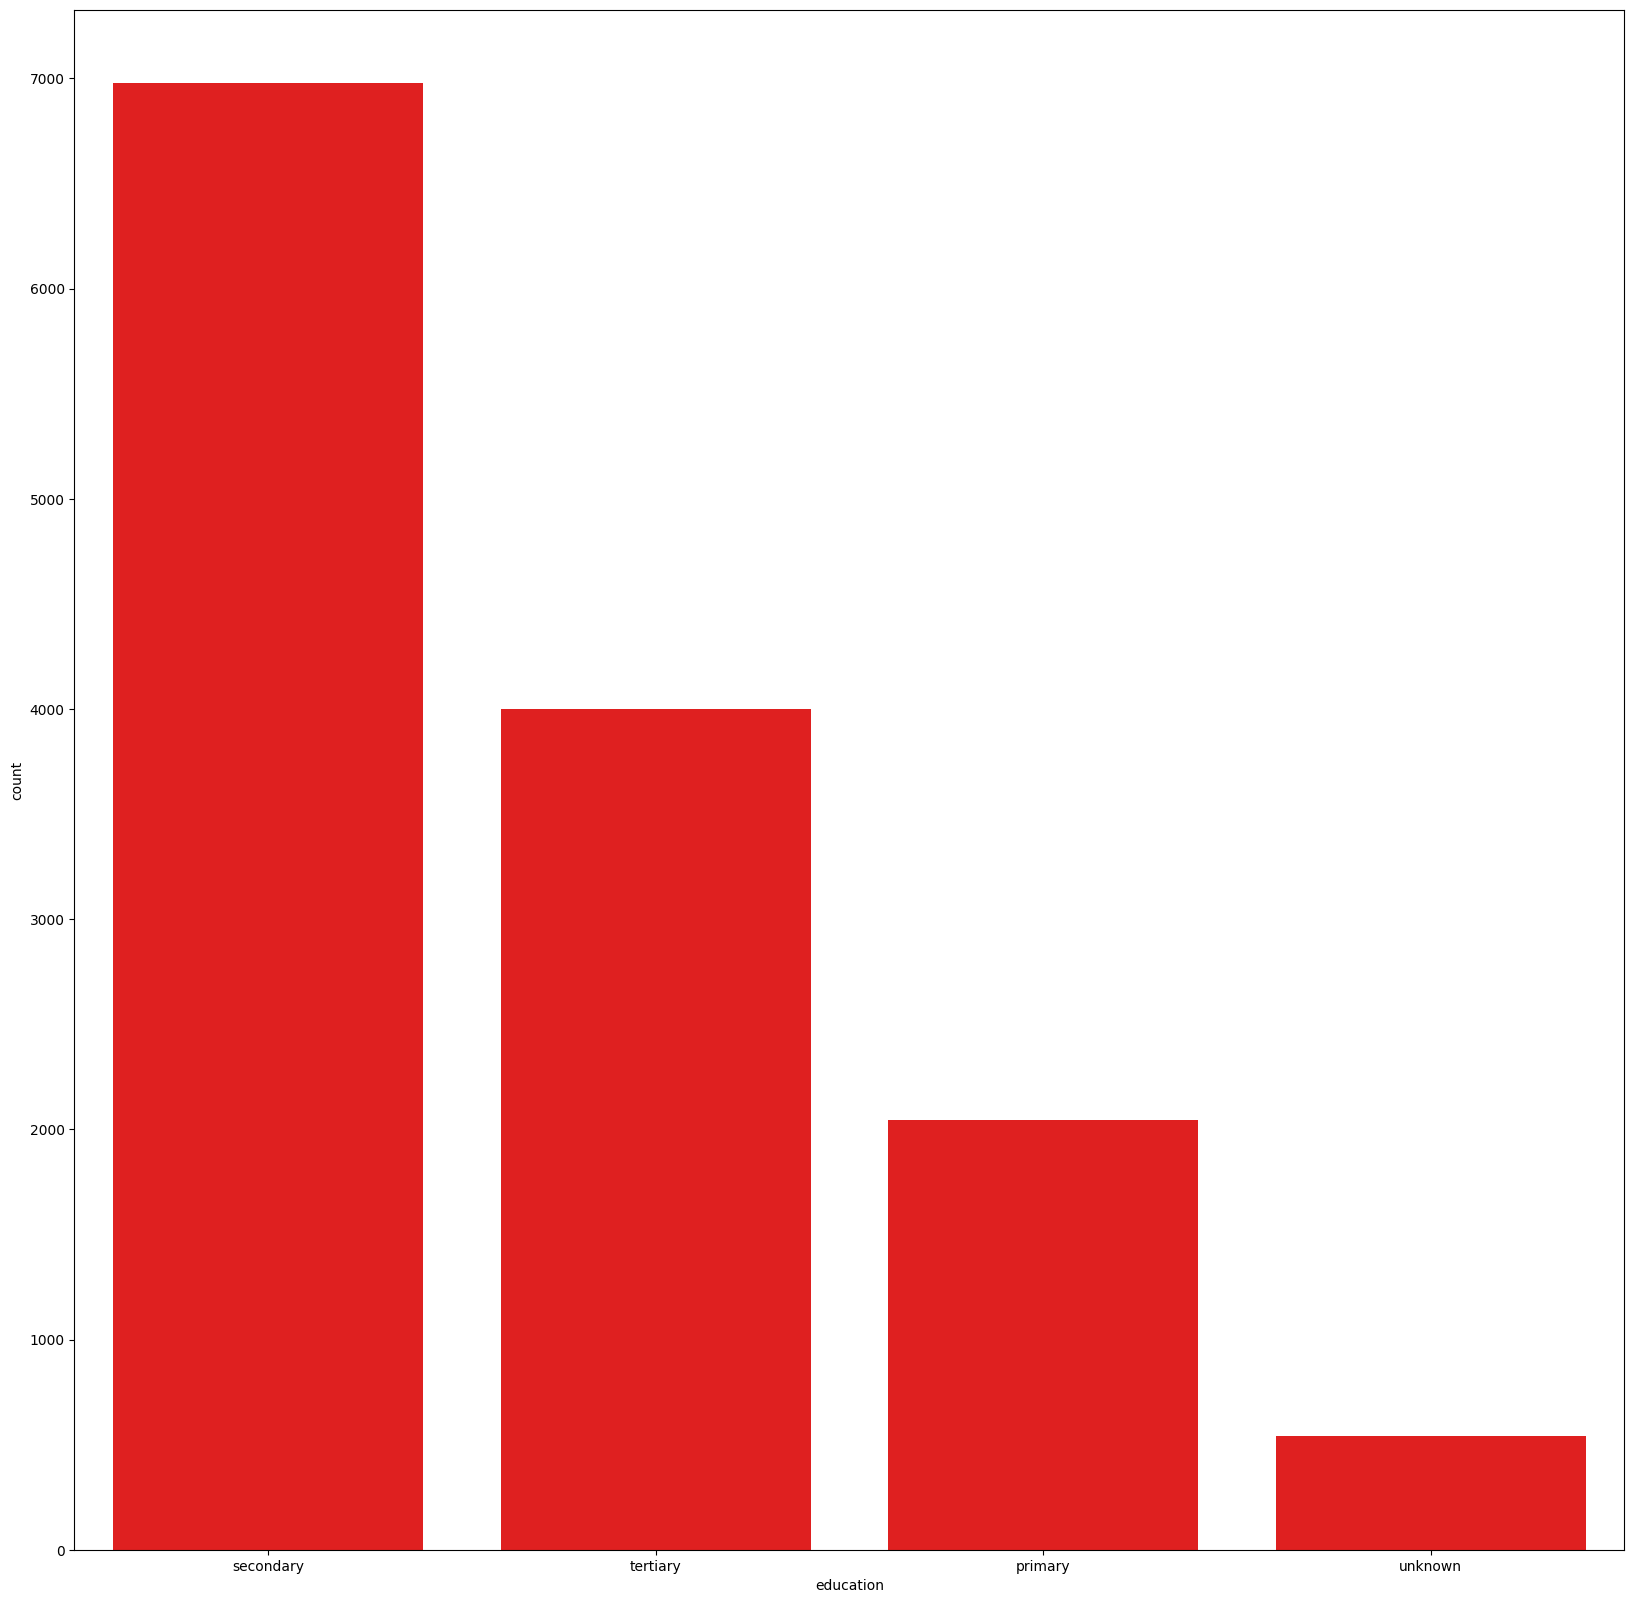

In [105]:
ax,fig=plt.subplots(figsize=(20,20))
#for i in range(1,len(numerical)):
sns.barplot(dftst['education'].value_counts(),color='red')


<Axes: xlabel='default', ylabel='count'>

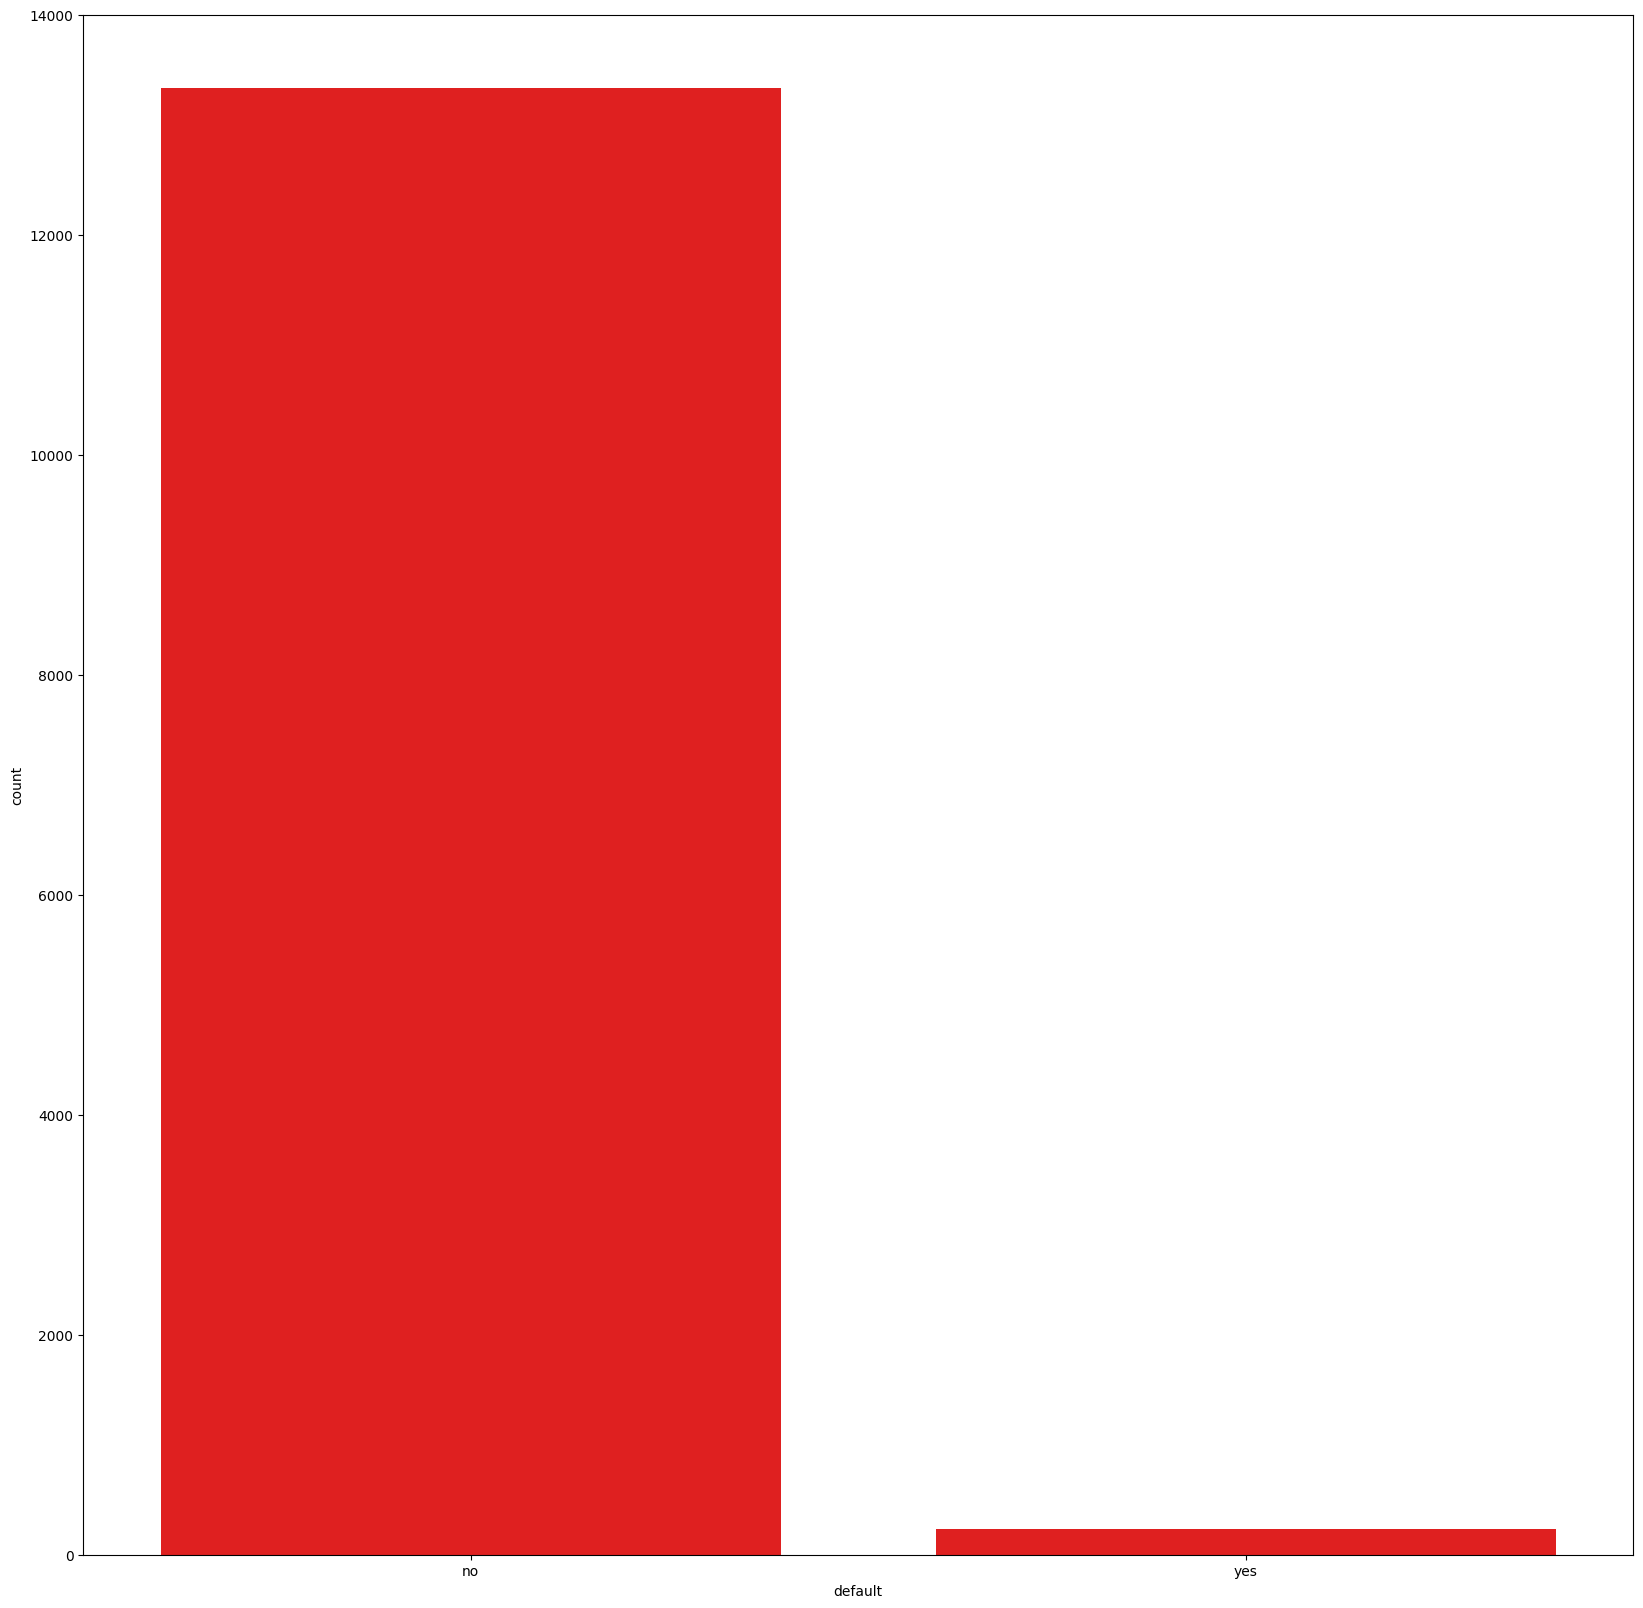

In [106]:
 ax,fig=plt.subplots(figsize=(20,20))
#for i in range(1,len(numerical)):
sns.barplot(dftst['default'].value_counts(),color='red')
   

<Axes: xlabel='loan', ylabel='count'>

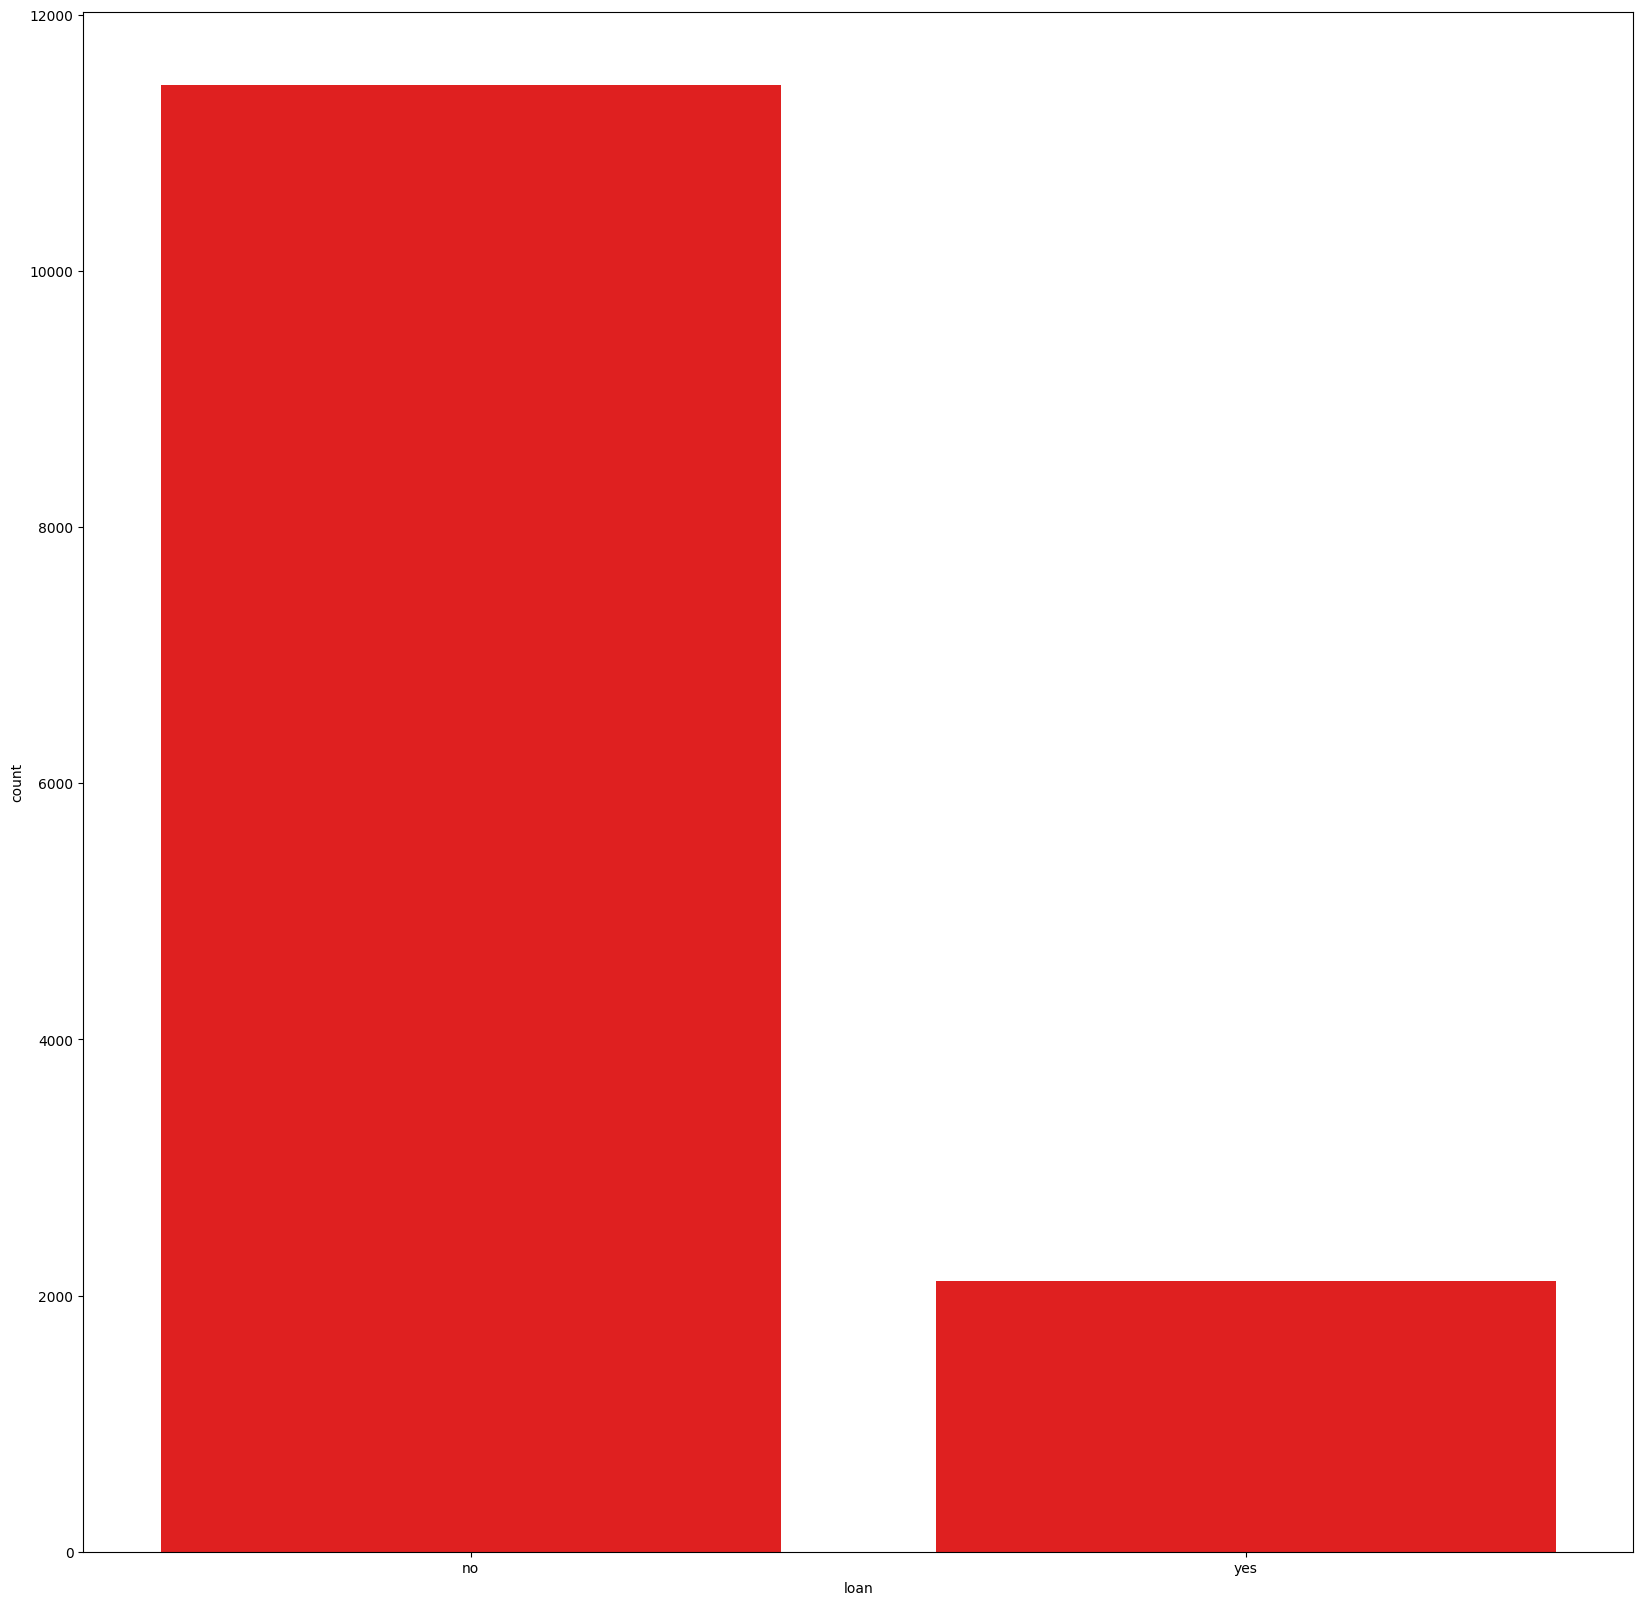

In [107]:
ax,fig=plt.subplots(figsize=(20,20))
#for i in range(1,len(numerical)):
sns.barplot(dftst['loan'].value_counts(),color='red')
    

<Axes: xlabel='campaign', ylabel='count'>

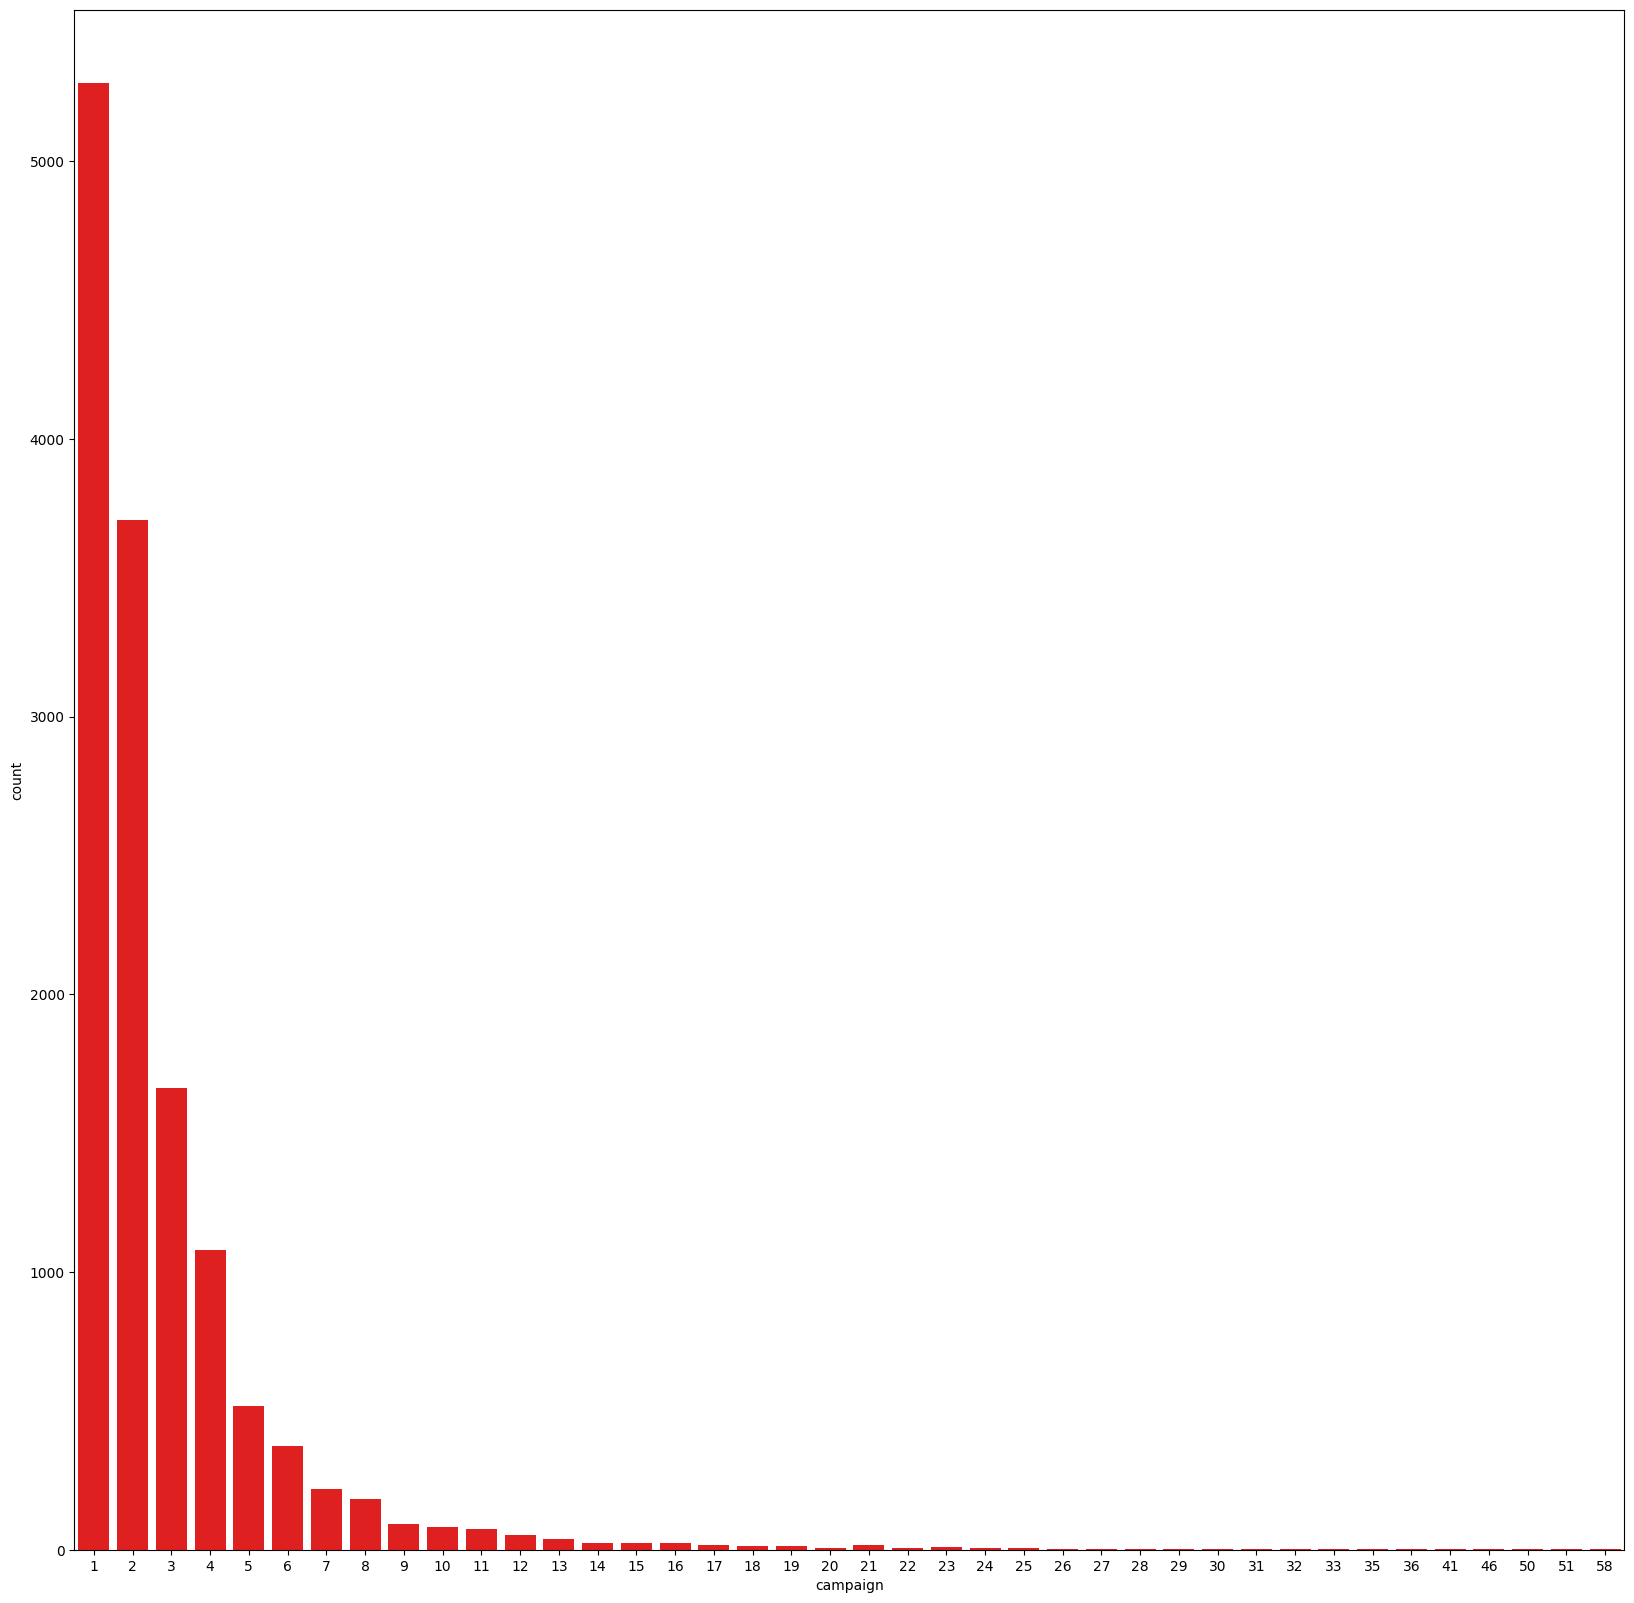

In [108]:
ax,fig=plt.subplots(figsize=(20,20))
#for i in range(1,len(numerical)):
sns.barplot(dftst['campaign'].value_counts(),color='red')


<Axes: xlabel='duration', ylabel='count'>

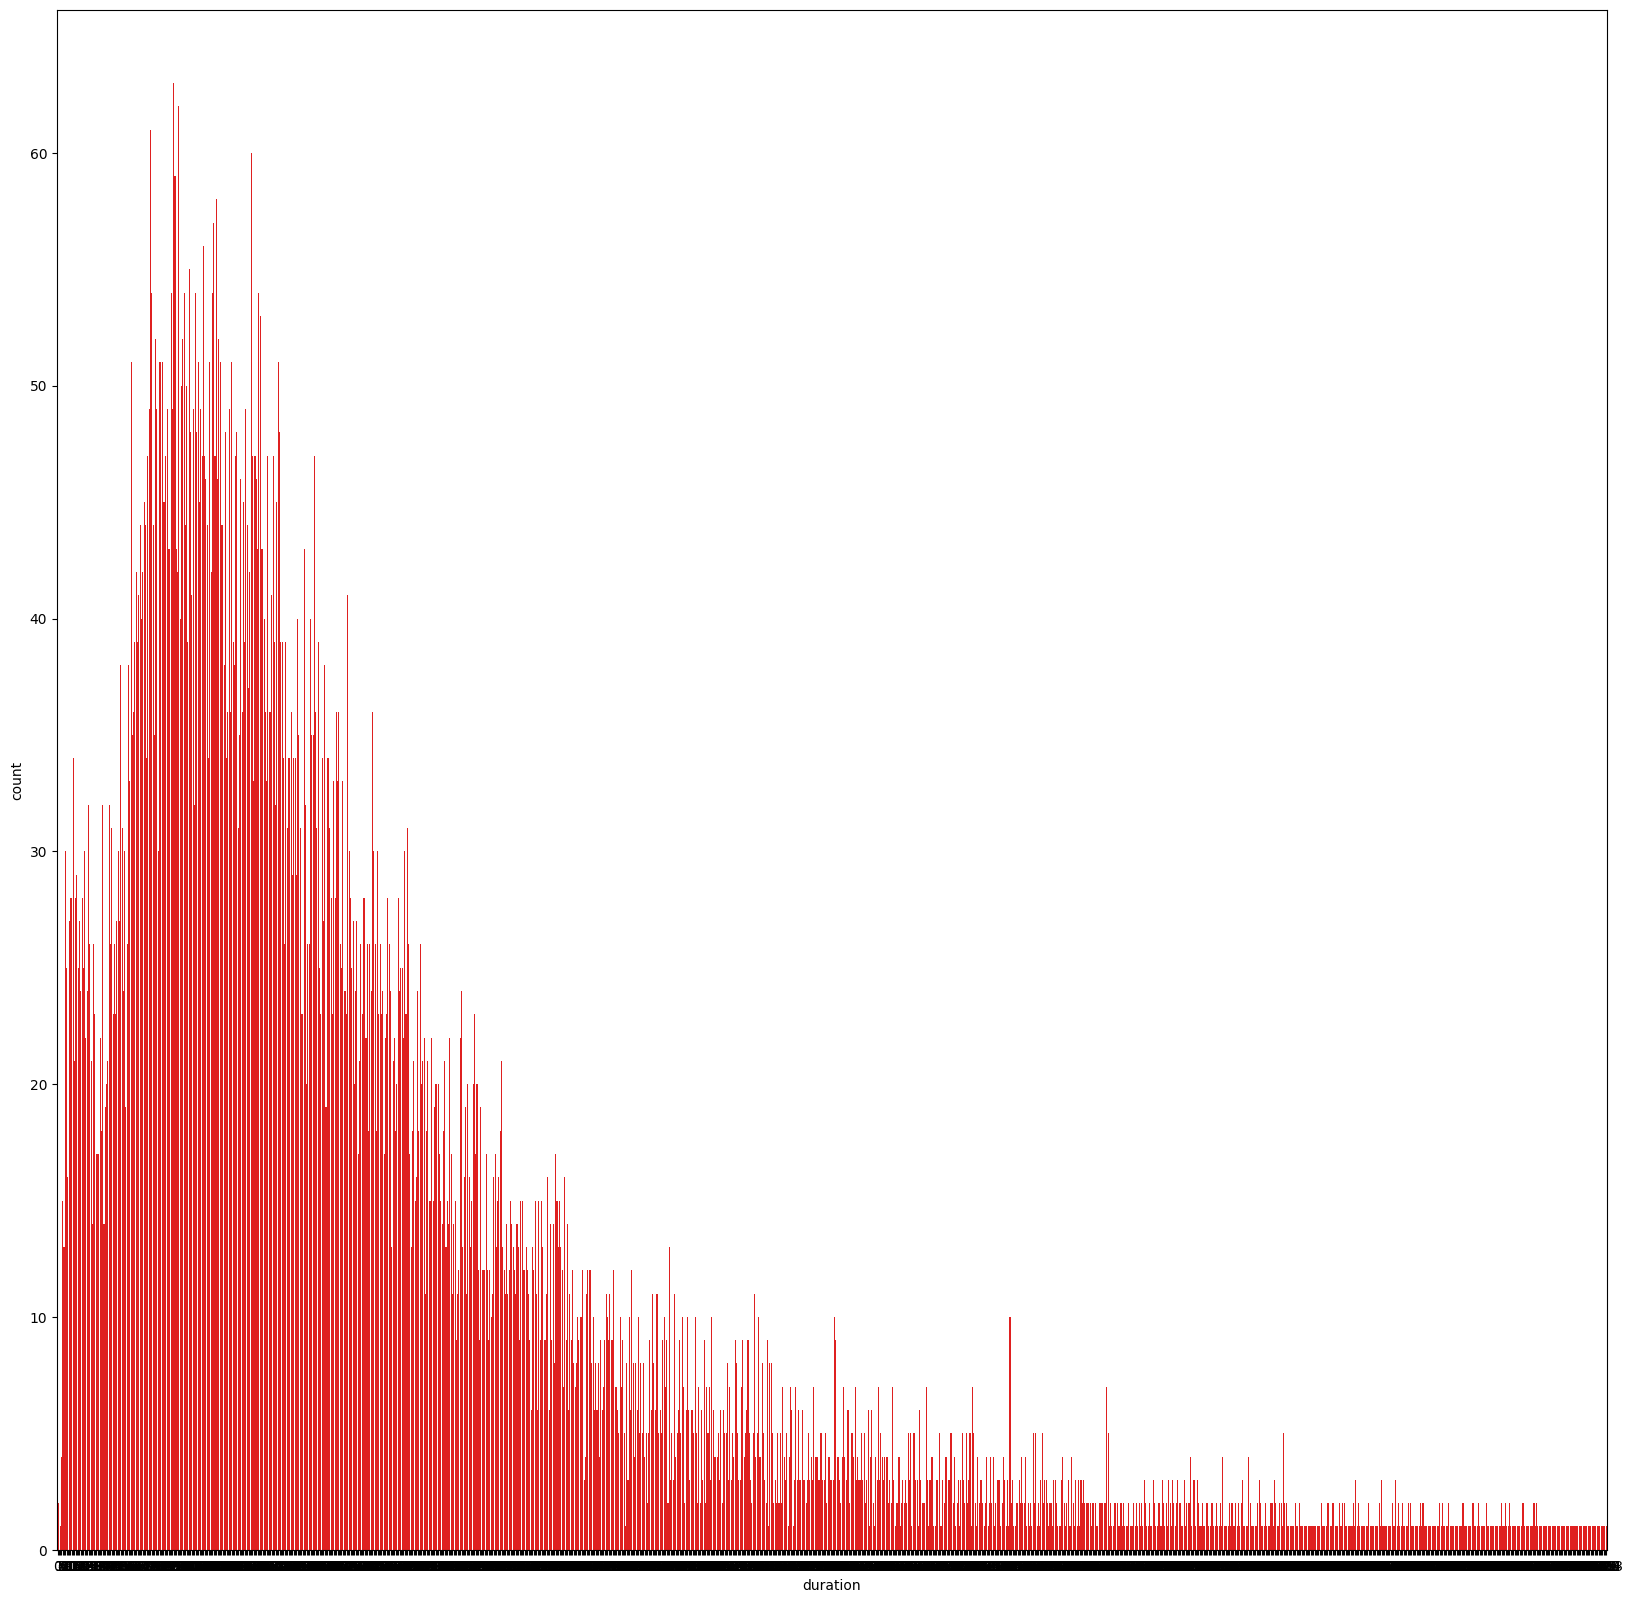

In [109]:
ax,fig=plt.subplots(figsize=(20,20))
#for i in range(1,len(numerical)):
sns.barplot(dftst['duration'].value_counts(),color='red')
    


<Axes: xlabel='previous', ylabel='count'>

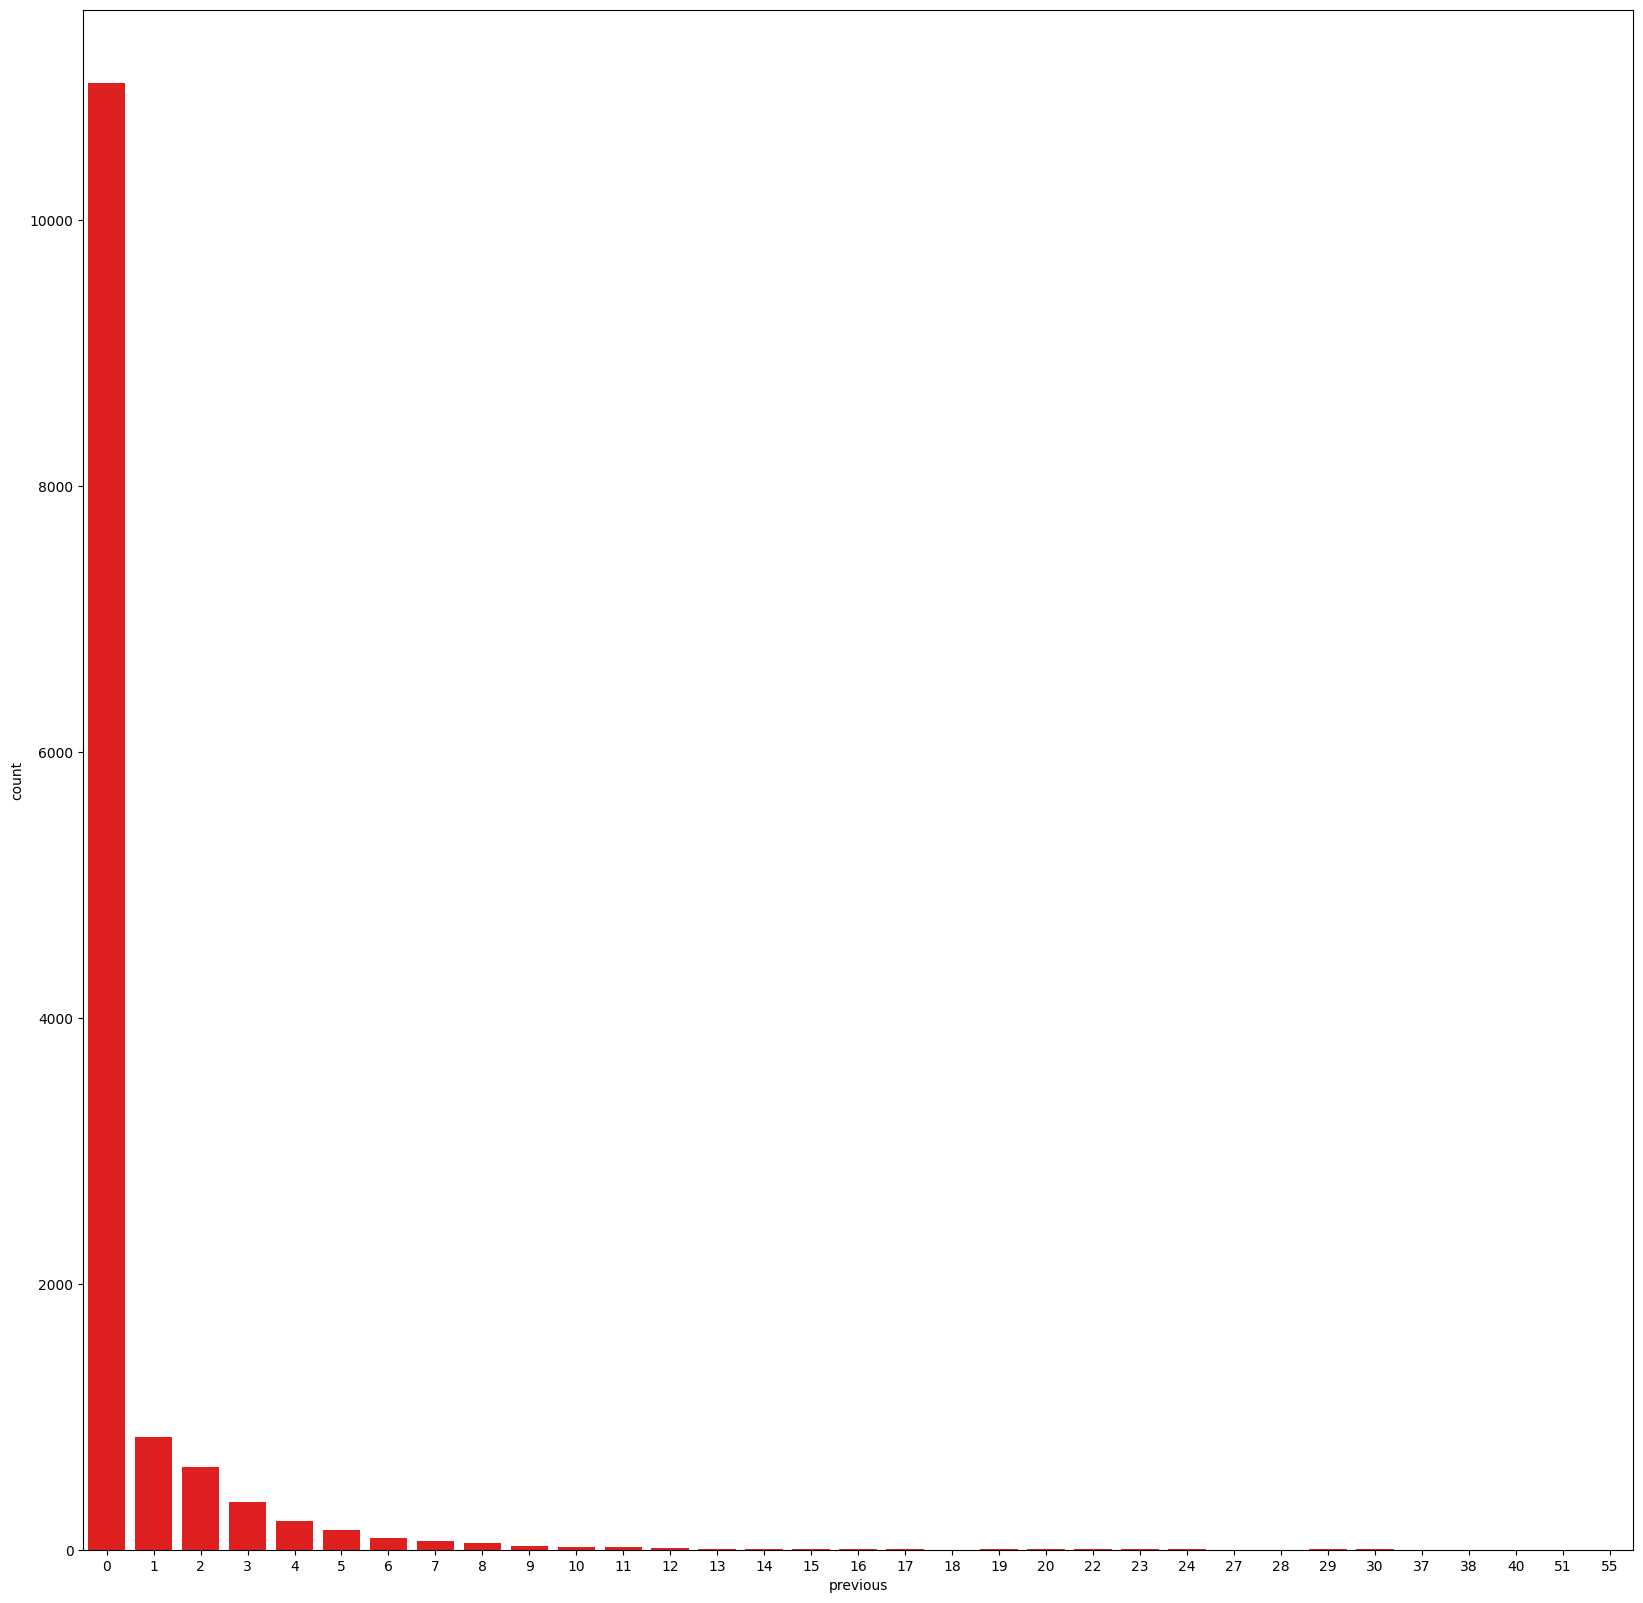

In [110]:
ax,fig=plt.subplots(figsize=(20,20))
#for i in range(1,len(numerical)):
sns.barplot(dftst['previous'].value_counts(),color='red')
    


<Axes: xlabel='age', ylabel='Density'>

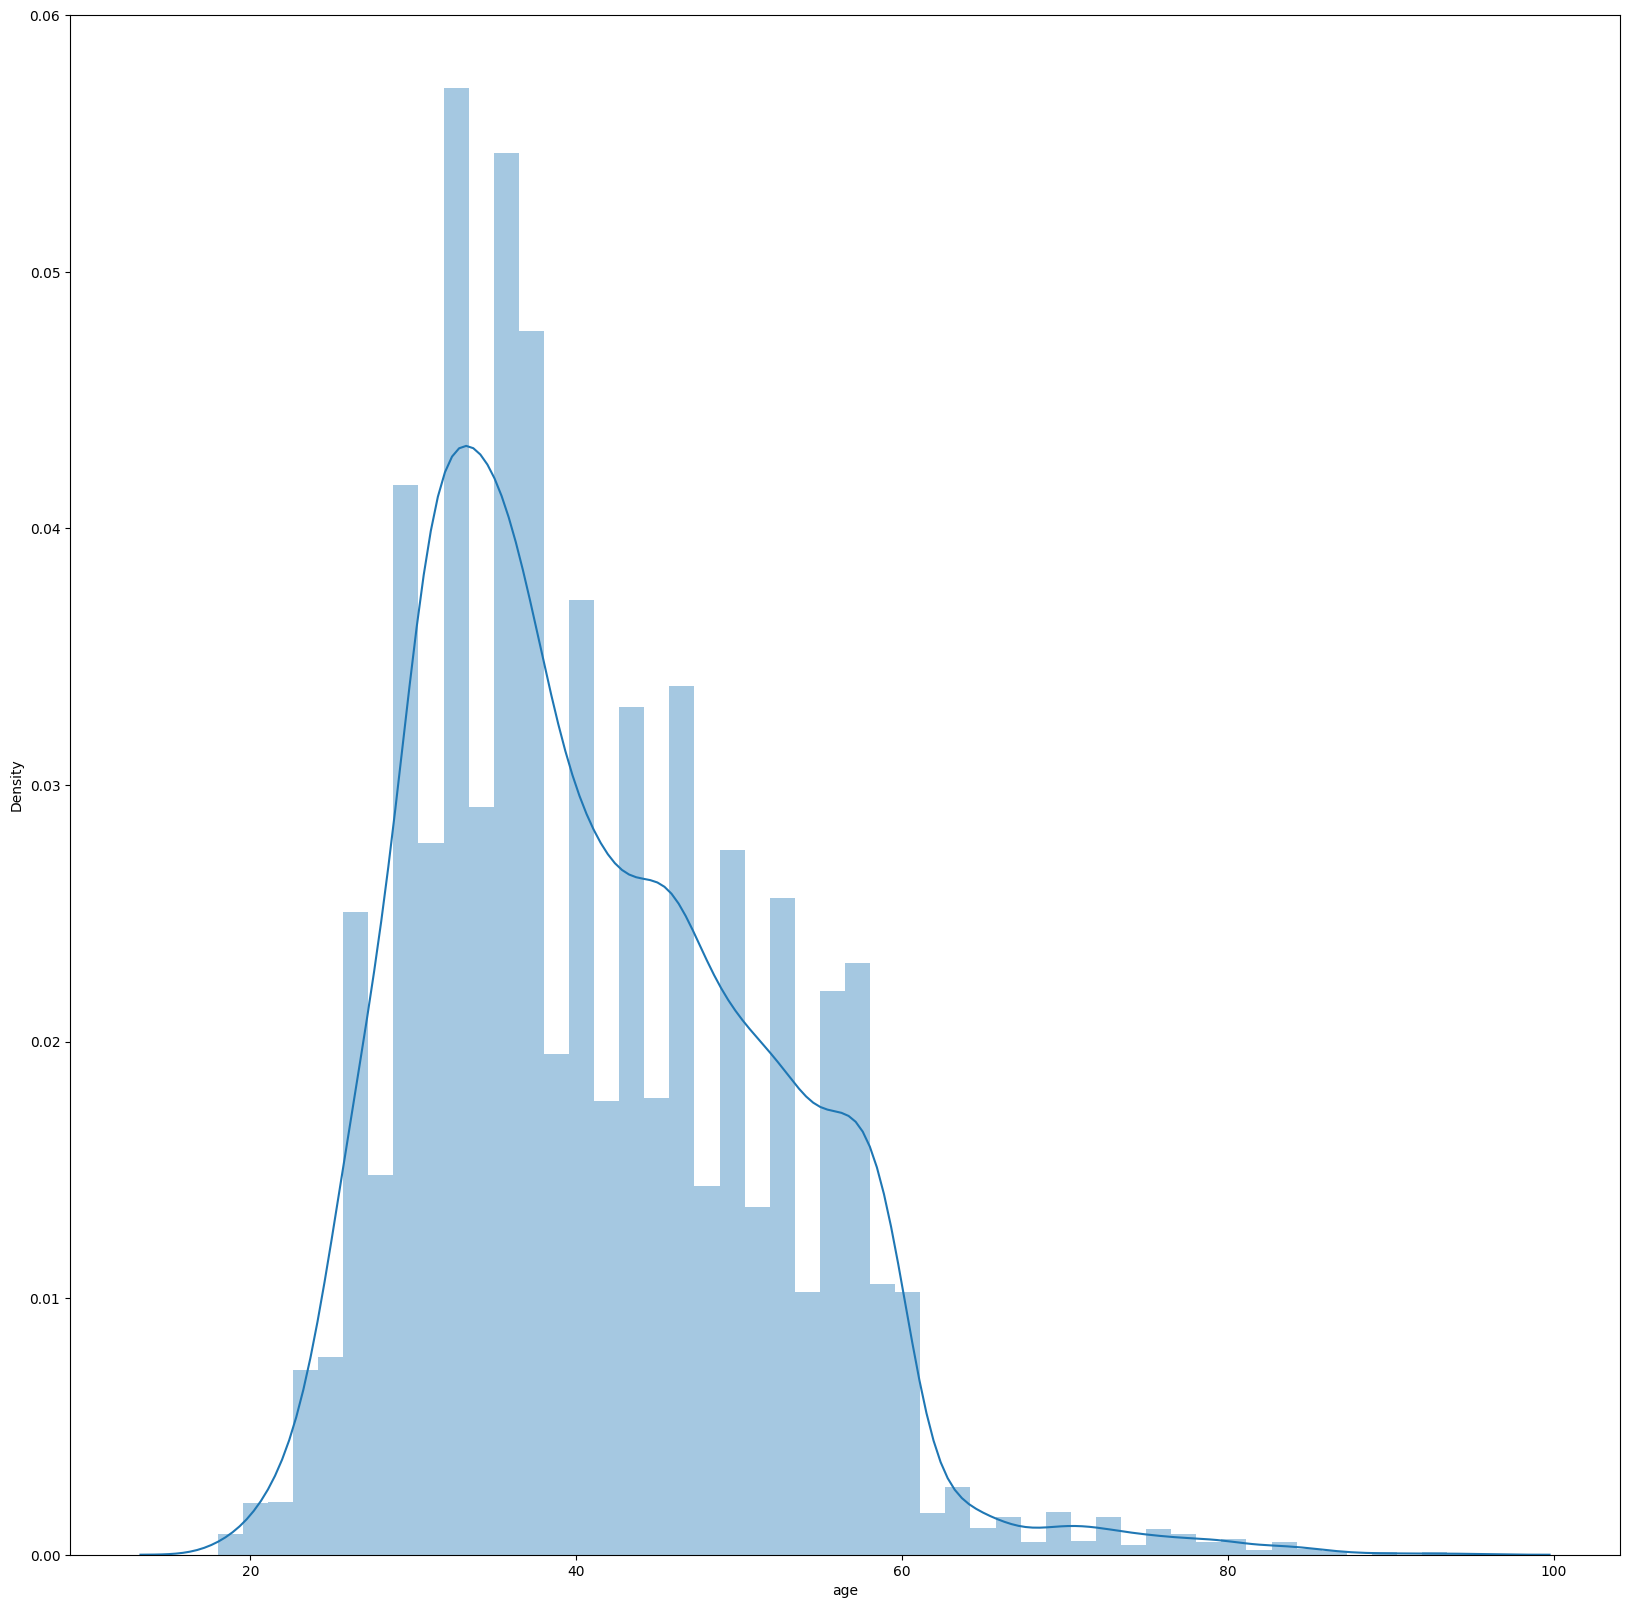

In [111]:
ax,fig=plt.subplots(figsize=(20,20))
sns.distplot(dftst['age'])


<Axes: xlabel='balance', ylabel='Density'>

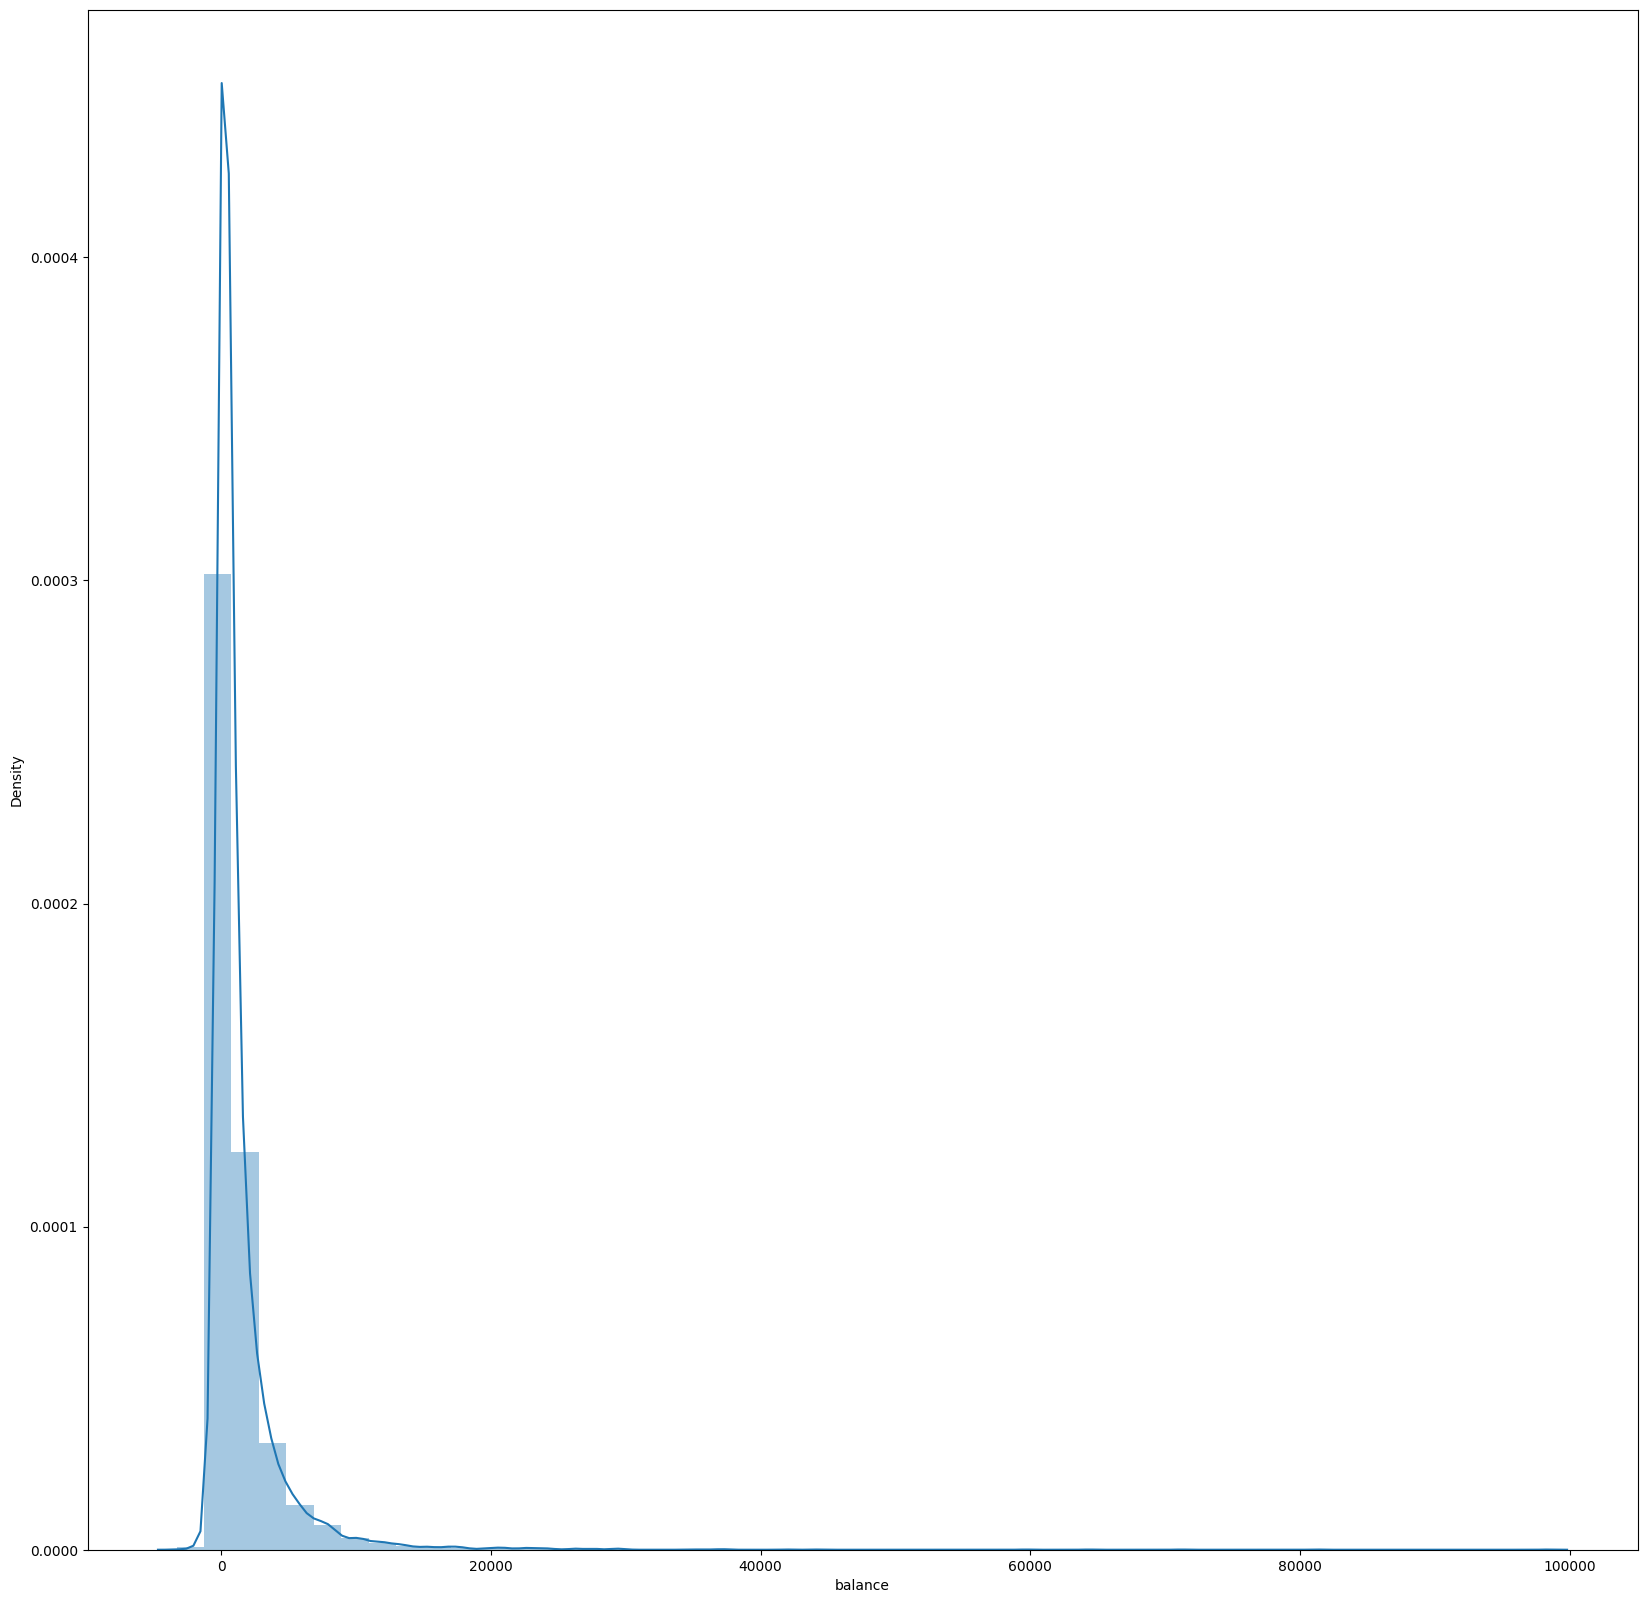

In [112]:
ax,fig=plt.subplots(figsize=(20,20))
sns.distplot(dftst['balance'])


<Axes: xlabel='duration', ylabel='Density'>

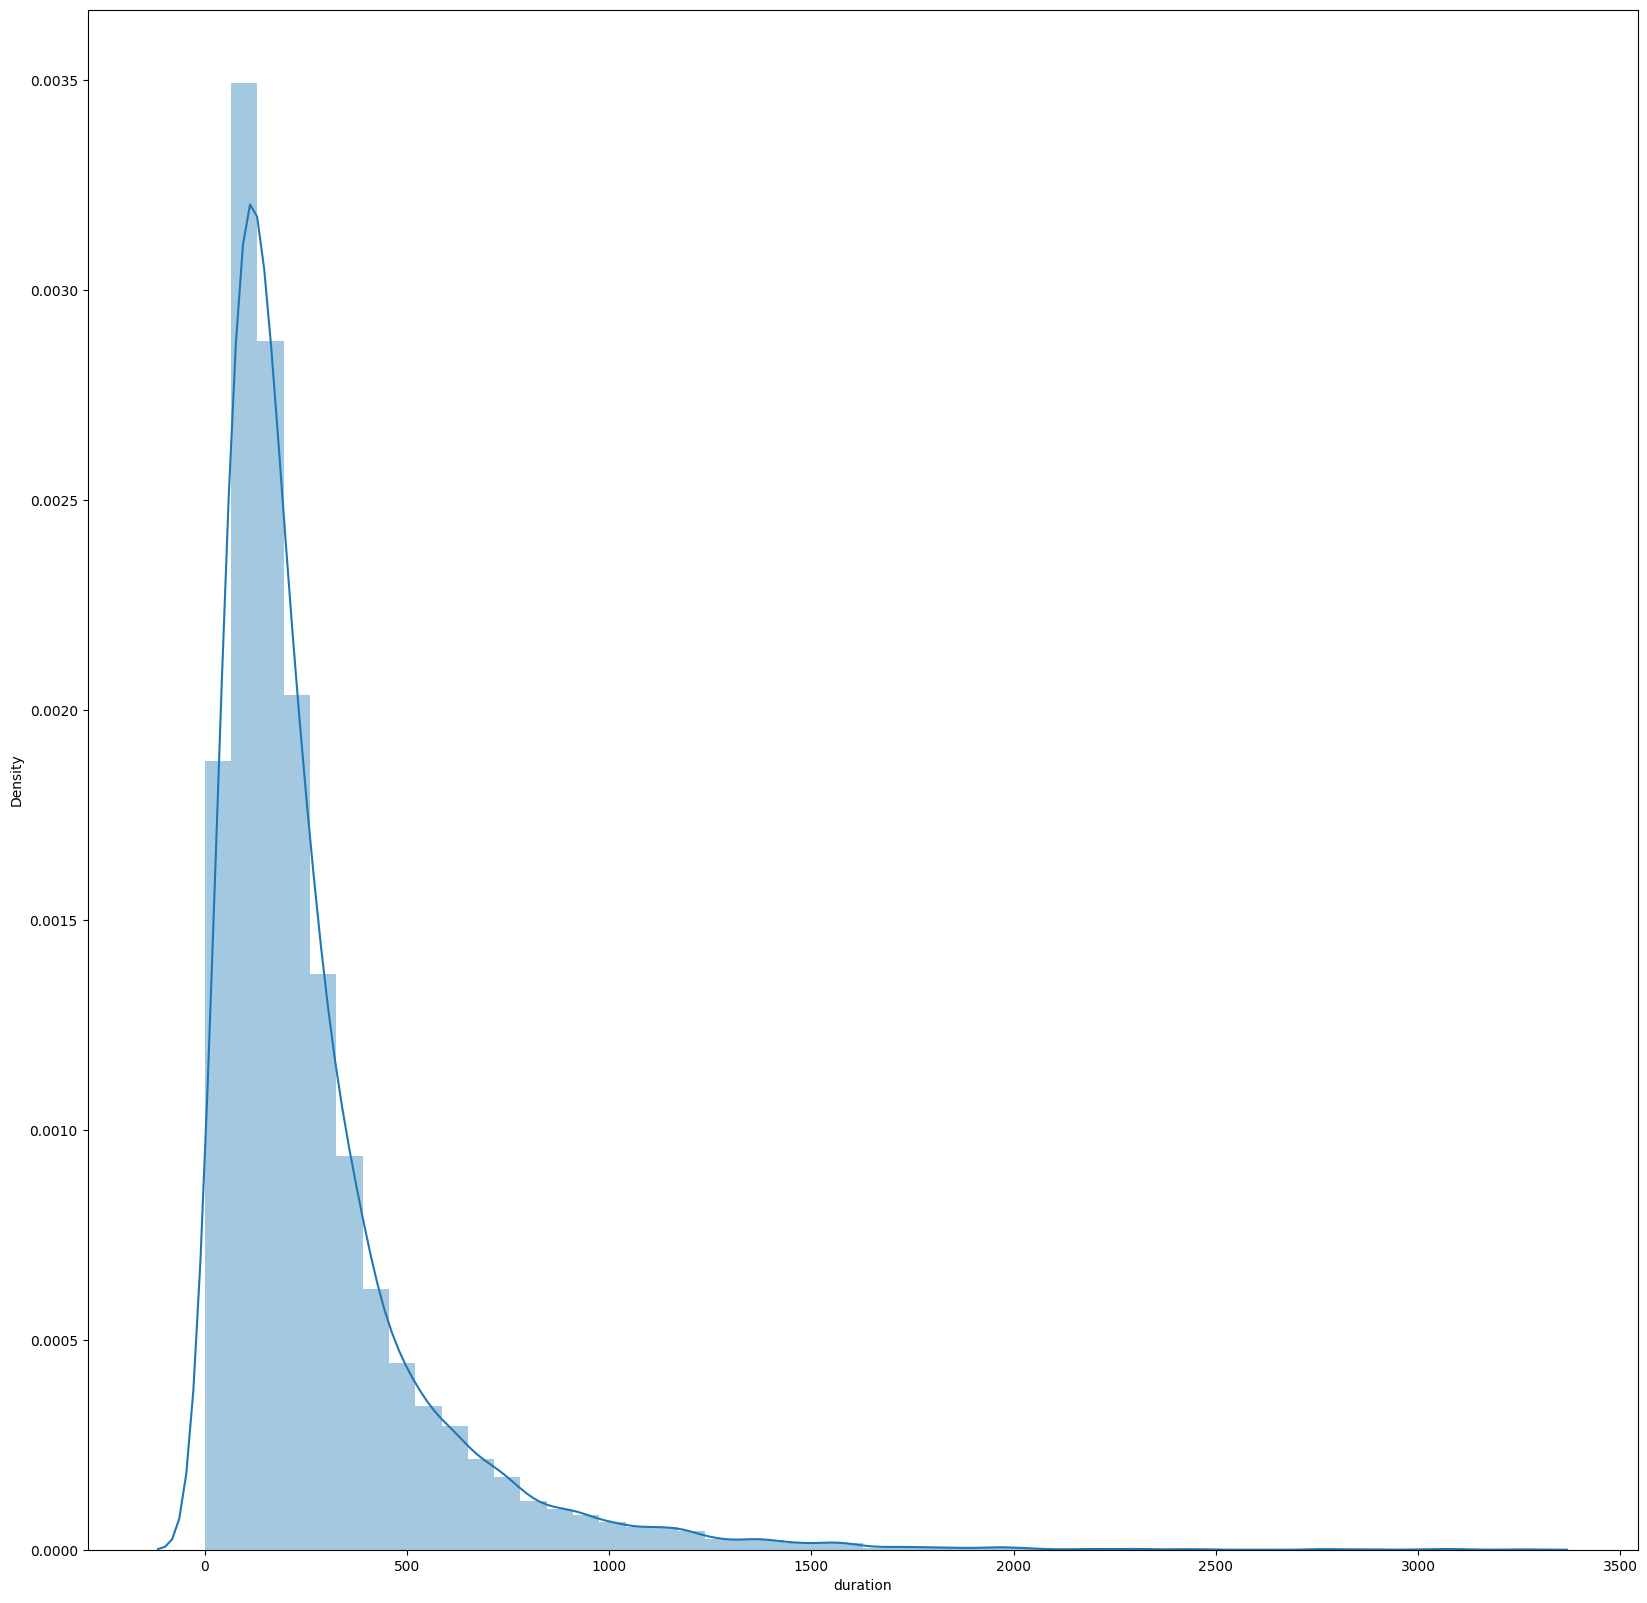

In [113]:
ax,fig=plt.subplots(figsize=(20,20))
sns.distplot(dftst['duration'])


In [114]:
from sklearn.preprocessing import LabelEncoder
dftst=dftst.apply(LabelEncoder().fit_transform)



In [115]:
dftst

,ID,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,Date
0,11570,14,7,1,1,0,682,1,0,0,19,5,0,0,3,56
1,12143,60,5,0,0,0,2809,0,0,1,371,0,0,0,3,103
2,1104,13,6,2,2,0,708,1,0,2,673,0,0,0,3,67
3,11242,39,7,2,0,0,3226,1,0,1,64,1,0,0,3,35
4,3686,27,1,0,1,0,94,0,1,2,110,0,0,0,3,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,6989,21,4,1,2,0,609,0,0,0,147,3,0,0,3,184
13560,3456,36,1,1,0,0,2535,1,0,2,157,0,0,0,3,110
13561,8450,17,5,1,0,0,849,1,0,0,135,0,0,0,3,195
13562,13551,11,0,2,1,0,1028,0,0,0,207,1,1,3,2,294


In [117]:
from sklearn.preprocessing import LabelEncoder
dftrn=dftst.apply(LabelEncoder().fit_transform)



<Axes: >

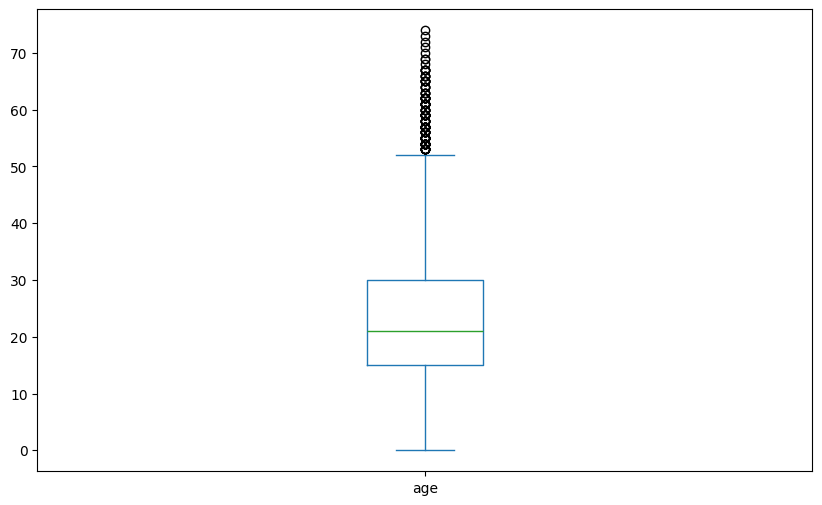

In [118]:
plt.figure(figsize=(10,6) )
dftrn['age'].plot(kind='box')


<Axes: >

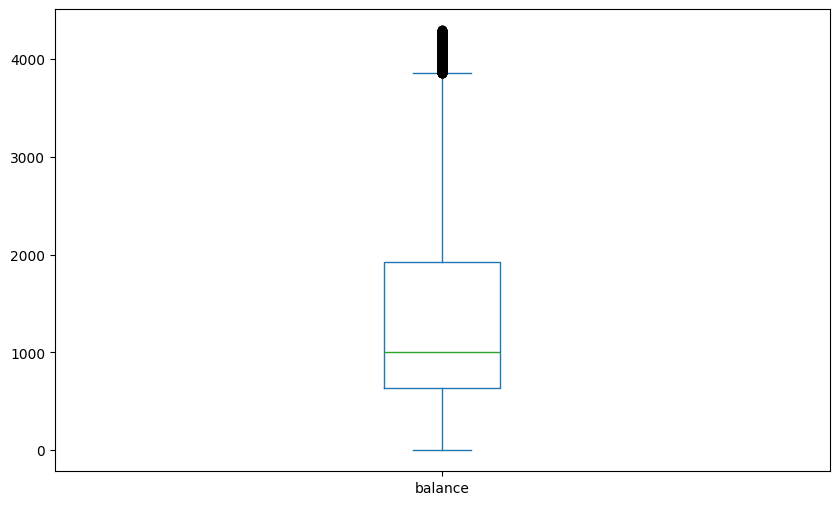

In [120]:
plt.figure(figsize=(10,6) )
dftst['balance'].plot(kind='box')


<Axes: >

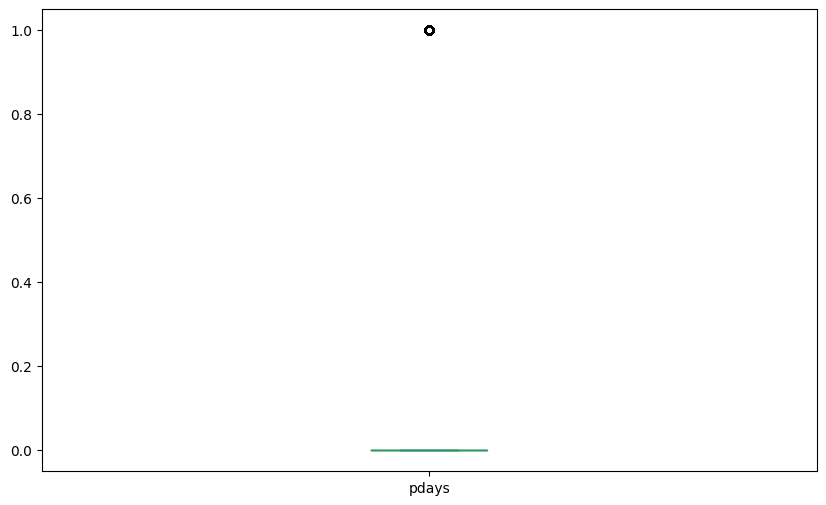

In [122]:
plt.figure(figsize=(10,6) )
dftst['pdays'].plot(kind='box')


In [124]:
dftst.skew()

ID           0.000000
age          0.688909
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance      1.151163
housing     -0.226771
loan         1.898587
contact      0.794849
duration     1.820073
campaign     4.407027
pdays        1.607206
previous     6.437082
poutcome    -1.921847
Date         0.077498
dtype: float64

In [125]:
for i in dftst.columns:
    dftst[i]=np.cbrt(dftst[i])


In [126]:
dftst.skew()

ID          -0.861908
age         -0.168534
job         -1.013144
marital     -1.927393
education   -1.530446
default      7.483552
balance      0.348019
housing     -0.226771
loan         1.898587
contact      0.674128
duration     0.379411
campaign     0.201252
pdays        1.607206
previous     1.984283
poutcome    -2.282264
Date        -0.717727
dtype: float64

In [127]:
dftrn['default']=np.cbrt(dftrn['default'])


In [128]:
dftst.skew()

ID          -0.861908
age         -0.168534
job         -1.013144
marital     -1.927393
education   -1.530446
default      7.483552
balance      0.348019
housing     -0.226771
loan         1.898587
contact      0.674128
duration     0.379411
campaign     0.201252
pdays        1.607206
previous     1.984283
poutcome    -2.282264
Date        -0.717727
dtype: float64

In [129]:
correlation=dftst.corr()

<Axes: >

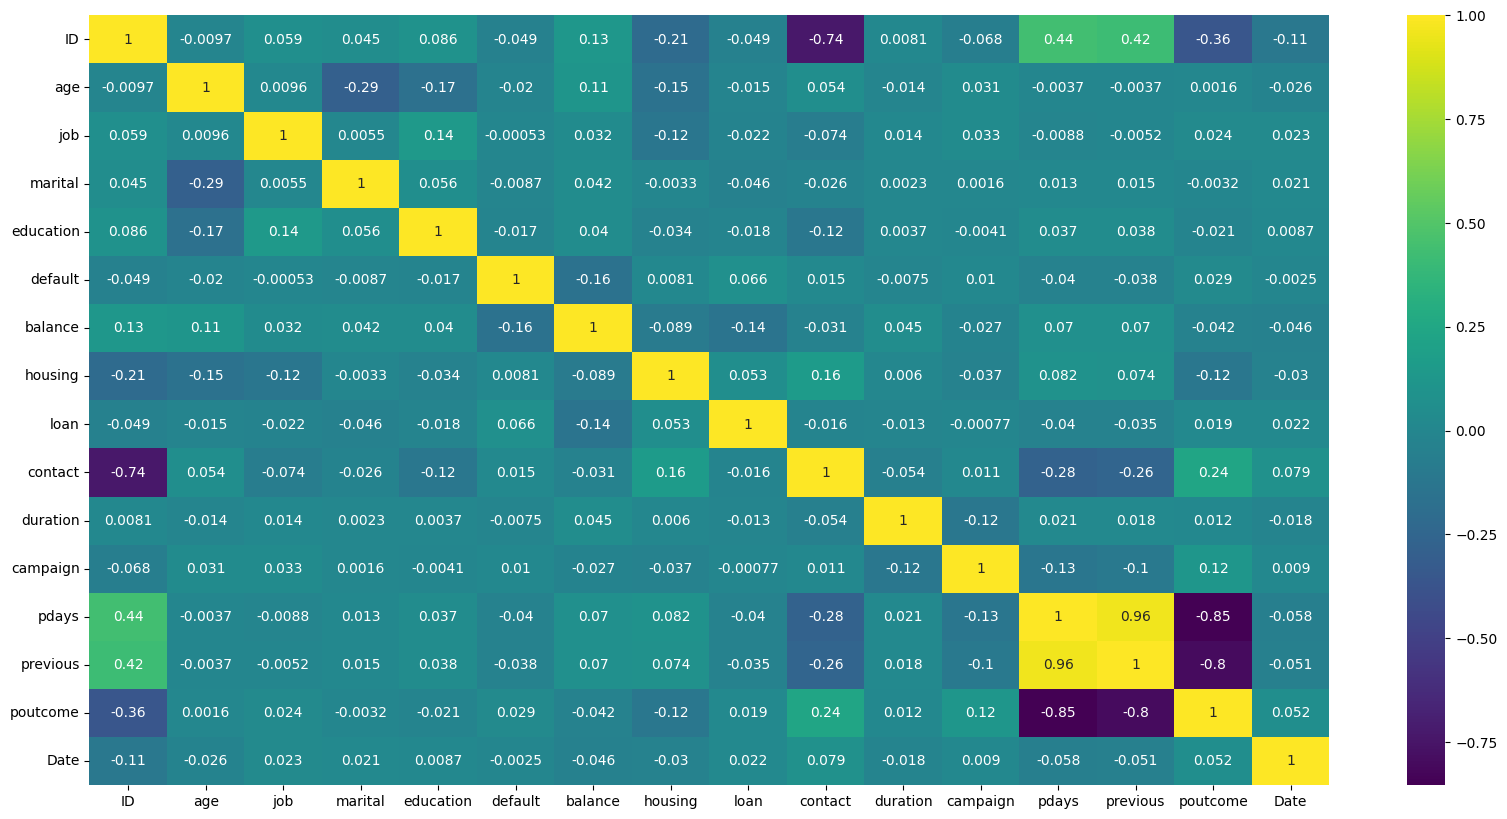

In [130]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation,cmap='viridis',annot=True)


In [132]:
dftst.drop('ID',axis=1,inplace=True)

In [133]:
dftst

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,Date
0,2.410142,1.912931,1.000000,1.000000,0.0,8.802272,1.0,0.0,0.000000,2.668402,1.709976,0.0,0.00000,1.442250,3.825862
1,3.914868,1.709976,0.000000,0.000000,0.0,14.109683,0.0,0.0,1.000000,7.185516,0.000000,0.0,0.00000,1.442250,4.687548
2,2.351335,1.817121,1.259921,1.259921,0.0,8.912737,1.0,0.0,1.259921,8.763381,0.000000,0.0,0.00000,1.442250,4.061548
3,3.391211,1.912931,1.259921,0.000000,0.0,14.775929,1.0,0.0,1.000000,4.000000,1.000000,0.0,0.00000,1.442250,3.271066
4,3.000000,1.000000,0.000000,1.000000,0.0,4.546836,0.0,1.0,1.259921,4.791420,0.000000,0.0,0.00000,1.442250,6.135792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,2.758924,1.587401,1.000000,1.259921,0.0,8.476289,0.0,0.0,0.000000,5.277632,1.442250,0.0,0.00000,1.442250,5.687734
13560,3.301927,1.000000,1.000000,0.000000,0.0,13.635131,1.0,0.0,1.259921,5.394691,0.000000,0.0,0.00000,1.442250,4.791420
13561,2.571282,1.709976,1.000000,0.000000,0.0,9.468966,1.0,0.0,0.000000,5.129928,0.000000,0.0,0.00000,1.442250,5.798890
13562,2.223980,0.000000,1.259921,1.000000,0.0,10.092476,0.0,0.0,0.000000,5.915482,1.000000,1.0,1.44225,1.259921,6.649400


In [134]:
from sklearn.preprocessing import StandardScaler
scale_data_x=StandardScaler()
dftst=pd.DataFrame(scale_data_x.fit_transform(dftst),columns=dftst.columns)
dftst




,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,Date
0,-0.796522,0.768226,0.115232,0.134419,-0.131336,-0.702479,0.893033,-0.429564,-0.724614,-1.831131,1.300113,-0.479309,-0.458793,0.409494,-0.953385
1,2.547678,0.449724,-2.619080,-2.254630,-0.131336,1.353687,-1.119779,-0.429564,0.999448,0.800139,-1.135345,-0.479309,-0.458793,0.409494,-0.264686
2,-0.927220,0.617868,0.825937,0.755383,-0.131336,-0.659683,0.893033,-0.429564,1.447568,1.719263,-1.135345,-0.479309,-0.458793,0.409494,-0.765014
3,1.383870,0.768226,0.825937,-2.254630,-0.131336,1.611800,0.893033,-0.429564,0.999448,-1.055460,0.288920,-0.479309,-0.458793,0.409494,-1.396803
4,0.514416,-0.664454,-2.619080,0.134419,-0.131336,-2.351094,-1.119779,2.327941,1.447568,-0.594449,-1.135345,-0.479309,-0.458793,0.409494,0.892816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-0.021366,0.257365,0.115232,0.755383,-0.131336,-0.828769,-1.119779,-0.429564,-0.724614,-0.311225,0.918800,-0.479309,-0.458793,0.409494,0.534707
13560,1.185439,-0.664454,0.115232,-2.254630,-0.131336,1.169839,0.893033,-0.429564,1.447568,-0.243037,-1.135345,-0.479309,-0.458793,0.409494,-0.181667
13561,-0.438395,0.449724,0.115232,-2.254630,-0.131336,-0.444192,0.893033,-0.429564,-0.724614,-0.397264,-1.135345,-0.479309,-0.458793,0.409494,0.623548
13562,-1.210261,-2.233773,0.825937,0.134419,-0.131336,-0.202636,-1.119779,-0.429564,-0.724614,0.060330,0.288920,2.086337,2.145192,0.011492,1.303314


In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(dftst.values,i) for i in range(len(dftst.columns))]
vif['features']=dftst.columns
vif


,vif values,features
0,1.181214,age
1,1.039191,job
2,1.103807,marital
3,1.067587,education
4,1.028234,default
5,1.077960,balance
6,1.111254,housing
7,1.030537,loan
8,1.156558,contact
9,1.023142,duration


In [136]:
dftst=dftst.drop('pdays',axis=1)

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(dftst.values,i) for i in range(len(dftst.columns))]
vif['features']=dftst.columns
vif


,vif values,features
0,1.181201,age
1,1.039190,job
2,1.103807,marital
3,1.067587,education
4,1.028146,default
5,1.077797,balance
6,1.111254,housing
7,1.029433,loan
8,1.148581,contact
9,1.022667,duration


In [138]:
dftst.shape

(13564, 14)

In [139]:
model=joblib.load('Bank_Marketing.pkl')

In [140]:
prediction=model.predict(dftst)
prediction

array([0., 1., 0., ..., 0., 1., 0.])

In [141]:
prediction.shape

(13564,)

In [142]:
dummy_test=np.array()

In [144]:
df=pd.DataFrame()
df['predicted']=prediction
df

,predicted
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
13559,0.0
13560,0.0
13561,0.0
13562,1.0
